In [2]:
import pandas as pd
import numpy as np
import scipy as sp

from numpy.testing import rundocs
import matplotlib.pyplot as plt
#import talib
import random
import sklearn
from sklearn import preprocessing
import tensorflow
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import seaborn as sns
import csv
#from datetime import strptime

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
#df = pd.read_excel(open('Cost.xls', 'rb'), sheet_name='Sheet1')
#df.head(76)
df = pd.read_excel(open('Cost_Sch-data.xlsx', 'rb'), sheet_name='Cost')
df.head(10)

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Bohai Ming Zhu,8,5,2,2,1,4350,3,259,0.400000,...,40000.000000,1,2,4,30,1,1.000000,1,0.471042,0.250000
1,Petrojarl Varg,5,1,1,1,1,2240,3,816,0.460000,...,65833.333333,2,2,4,84,1,0.865823,2,0.286765,0.240000
2,Stybarrow Venture MV16,4,3,3,1,3,5922,3,702,0.598425,...,87500.000000,2,3,4,825,2,0.914286,4,-0.143875,0.270000
3,Alima FPU,1,2,3,2,1,5720,3,994,1.133000,...,100000.000000,3,1,2,600,3,0.900000,4,-0.022133,0.350000
4,Jangkrik,2,4,1,2,1,8824,3,1052,2.676500,...,79400.000000,2,2,2,120,2,0.055416,3,0.114068,0.170000
5,Prelude,4,3,3,2,1,7814,3,2229,11.160000,...,148333.333333,6,5,5,250,1,0.235955,5,0.243158,0.344086
6,CLOV FPSO,1,3,3,2,1,7534,3,1383,1.800000,...,198333.333333,4,2,4,1290,4,0.806723,5,0.007954,0.055556
7,Dalia,1,4,3,2,1,4872,3,1306,3.400000,...,287000.000000,6,3,4,1360,5,0.836237,2,0.010720,0.176471
8,Girassol,1,4,3,2,1,3103,3,823,2.500000,...,246666.666667,5,3,4,1350,1,0.810811,1,0.521264,0.120000
9,Kizomba B,1,3,3,2,1,4756,3,1071,0.760000,...,316666.666667,6,1,4,1250,5,0.789474,2,-0.140056,0.133333


In [5]:
print('mean', df['Cost_Overrun'].mean())
print('median',df['Cost_Overrun'].median())
print('max',df['Cost_Overrun'].max())
print('min',df['Cost_Overrun'].min())
print('std',df['Cost_Overrun'].std())
Std3_9 =  3.9*df['Cost_Overrun'].std()
Std3 =  3*df['Cost_Overrun'].std()
Std2 =  2*df['Cost_Overrun'].std()
print('2_std',Std2)
print('3_std',Std3)
print('3.9_std',Std3_9)
print(df.shape)

mean 0.3310880443561905
median 0.24
max 2.6800000000000006
min -0.1290322580645161
std 0.43922293864974554
2_std 0.8784458772994911
3_std 1.3176688159492367
3.9_std 1.7129694607340076
(103, 21)


In [6]:
#df[df["Cost_Overrun"]==2.6800000000000006]
df[df["Cost_Overrun"]>Std3]


,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
17,Akpo,1,4,3,2,1,5606,4,1303,2.345000,...,273333.333333,6,2,4,1325,1,0.676829,3,0.072141,1.55
28,Frade,7,3,3,2,1,6014,3,909,2.000000,...,117666.666667,3,2,4,1080,1,0.849858,5,0.209021,1.35
32,Espirito Santo,7,5,3,1,3,6153,3,787,1.508621,...,105000.000000,3,5,4,1780,1,0.952381,3,0.247776,1.32
63,Atlantis,6,2,3,2,1,4533,3,1492,2.500000,...,230000.000000,5,2,7,2145,4,0.869565,1,0.603887,1.35
67,Thunder Horse,6,2,3,2,1,4624,3,1098,5.000000,...,283333.333333,6,5,7,1830,1,0.882353,5,0.926230,2.68
77,Tahiti Spar,6,2,3,2,1,5597,3,1159,3.500000,...,136666.666667,3,3,3,1280,2,0.914634,2,0.267472,1.80


In [7]:
#df.drop([0,1])
#df.head(10)
print(df.shape)
df = df[df.Cost_Overrun < Std3]
print(df.shape)

(103, 21)
(97, 21)


In [8]:
#df.drop([df["Cost_Overrun"]==2.6800000000000006], axis =0)
#df.drop([67,67])
print('mean', df['Cost_Overrun'].mean())
print('median',df['Cost_Overrun'].median())
print('max',df['Cost_Overrun'].max())
print('min',df['Cost_Overrun'].min())

mean 0.24795946978028466
median 0.1924686192468619
max 1.1666666666666667
min -0.1290322580645161


In [9]:
df[df["Cost_Overrun"]==1.7999999999999996]
df = df[df.Cost_Overrun != 1.7999999999999996]
print(df.shape)
print('mean', df['Cost_Overrun'].mean())
print('median',df['Cost_Overrun'].median())
print('max',df['Cost_Overrun'].max())
print('min',df['Cost_Overrun'].min())

(97, 21)
mean 0.24795946978028466
median 0.1924686192468619
max 1.1666666666666667
min -0.1290322580645161


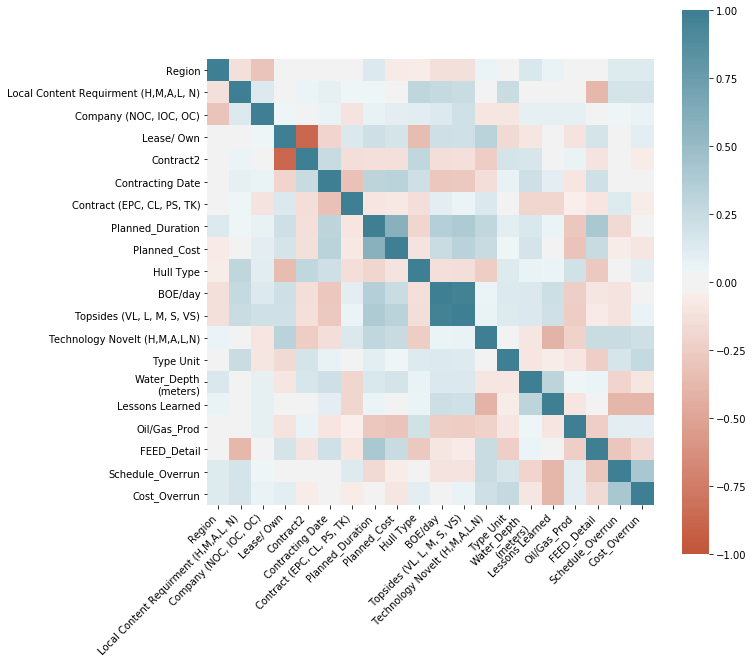

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
df.corr(method ='pearson')

,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
Region,1.000000,-0.124098,-0.301201,0.035255,-0.019342,-0.000979,0.030240,0.133184,-0.064526,-0.051114,-0.118533,-0.132346,0.053274,0.010295,0.150158,0.062554,-0.023456,-0.038552,0.118853,0.127382
"Local Content Requirment (H,M,A,L, N)",-0.124098,1.000000,0.133459,-0.024294,0.051796,0.084790,0.042622,0.042920,-0.024106,0.295327,0.263679,0.248031,-0.010078,0.245675,0.025072,-0.034286,0.000882,-0.385238,0.185526,0.185145
"Company (NOC, IOC, OC)",-0.301201,0.133459,1.000000,0.045010,-0.006683,0.069945,-0.109476,0.070898,0.090857,0.111762,0.133300,0.201512,-0.102659,-0.093536,0.079383,0.084738,0.079700,0.036020,0.045592,0.065588
Lease/ Own,0.035255,-0.024294,0.045010,1.000000,-0.872398,-0.207521,0.140770,0.213662,0.185920,-0.352999,0.215052,0.210429,0.322300,-0.168524,-0.098430,0.003034,-0.110574,0.186515,-0.017624,0.102719
Contract2,-0.019342,0.051796,-0.006683,-0.872398,1.000000,0.251273,-0.142069,-0.135321,-0.129824,0.286946,-0.145338,-0.139010,-0.251910,0.180770,0.171452,0.026059,0.067678,-0.115035,0.030339,-0.059025
Contracting Date,-0.000979,0.084790,0.069945,-0.207521,0.251273,1.000000,-0.327627,0.298205,0.326967,0.213897,-0.282532,-0.265642,-0.140801,0.076534,0.217791,0.097490,-0.106539,0.205703,0.021389,-0.033675
"Contract (EPC, CL, PS, TK)",0.030240,0.042622,-0.109476,0.140770,-0.142069,-0.327627,1.000000,-0.104303,-0.080337,-0.144792,0.089224,0.057153,0.142429,0.005079,-0.192821,-0.191401,-0.041548,-0.107738,0.132634,-0.062163
Planned_Duration,0.133184,0.042920,0.070898,0.213662,-0.135321,0.298205,-0.104303,1.000000,0.590753,-0.192154,0.352306,0.390285,0.283507,0.106942,0.152623,0.048746,-0.288334,0.405788,-0.158373,-0.015958
Planned_Cost,-0.064526,-0.024106,0.090857,0.185920,-0.129824,0.326967,-0.080337,0.590753,1.000000,-0.113907,0.246985,0.322745,0.253957,0.046596,0.182663,-0.012680,-0.307503,0.255581,-0.051778,-0.093121
Hull Type,-0.051114,0.295327,0.111762,-0.352999,0.286946,0.213897,-0.144792,-0.192154,-0.113907,1.000000,-0.136605,-0.140962,-0.255789,0.122795,0.063754,0.053548,0.187692,-0.278487,0.010269,0.096322


In [12]:
dataset = df.values


In [13]:
dataset

array([['Bohai Ming Zhu', 8, 5, ..., 1, 0.47104247104247104,
        0.24999999999999994],
       ['Petrojarl Varg', 5, 1, ..., 2, 0.2867647058823529, 0.24],
       ['Stybarrow Venture MV16', 4, 3, ..., 4, -0.14387464387464388,
        0.2699999999999999],
       ...,
       ['Big Foot', 6, 4, ..., 5, 0.9489862655330281, 0.2749999999999999],
       ['Heidrun TLP', 5, 1, ..., 5, 0.03940568475452196,
        0.076923076923077],
       ['Malikai TLP', 2, 5, ..., 5, 0.3679611650485437,
        0.07797270955165699]], dtype=object)

In [14]:
X = dataset[:,1:19]

In [15]:
X

array([[8, 5, 2, ..., 1, 1.0, 1],
       [5, 1, 1, ..., 1, 0.8658227848101266, 2],
       [4, 3, 3, ..., 2, 0.9142857142857143, 4],
       ...,
       [6, 4, 3, ..., 1, 0.9473684210526315, 5],
       [5, 1, 1, ..., 2, 0.8823529411764707, 5],
       [2, 5, 3, ..., 3, 0.878048780487805, 5]], dtype=object)

In [16]:
Y = dataset[:,20]

In [17]:
Y

array([0.24999999999999994, 0.24, 0.2699999999999999, 0.35000000000000014,
       0.16999999999999996, 0.3440860215053763, 0.05555555555555548,
       0.17647058823529416, 0.11999999999999993, 0.13333333333333341, 0.0,
       0.0, 0.85, 0.4, 0.0, 0.0, 0.3, 0.5000000000000001, -0.09375,
       0.5700000000000003, 0.13333333333333322, 0.32352941176470584,
       0.012027952212040005, 0.3333333333333333, 0.4112903225806451,
       0.3846153846153846, 0.3846153846153846, 0.004184100418409952,
       0.59441052, 0.2538461538461537, 0.971383147853736,
       0.00554235946159946, 0.3076923076923076, 0.19999999999999996,
       0.31099999999999994, 0.3600000000000001, 0.62, 0.52,
       0.36974789915966394, 0.6000000000000001, 0.7, 0.1924686192468619,
       0.24999999999999994, 0.0781671159029651, 0.20000000000000004,
       0.04086956521739138, 0.044000000000000004, 0.38888888888888884,
       0.98, 0.3999999999999999, 0.08333333333333341, 0.08333333333333341,
       0.8500000000000002, 0.0,

In [18]:
from sklearn import preprocessing

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [20]:
X_scale

array([[1.        , 1.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.57142857, 0.        , 0.        , ..., 0.        , 0.85795105,
        0.25      ],
       [0.42857143, 0.5       , 1.        , ..., 0.25      , 0.90925714,
        0.75      ],
       ...,
       [0.71428571, 0.75      , 1.        , ..., 0.        , 0.9442807 ,
        1.        ],
       [0.57142857, 0.        , 0.        , ..., 0.25      , 0.87545098,
        1.        ],
       [0.14285714, 1.        , 1.        , ..., 0.5       , 0.87089431,
        1.        ]])

In [21]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [22]:
#Y_scale

In [23]:
from sklearn.feature_extraction import DictVectorizer

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [26]:
print(X.shape)
print(Y.shape)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

(97, 18)
(97,)


In [27]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(67, 18) (15, 18) (15, 18) (67,) (15,) (15,)


In [28]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [29]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [31]:
for train, test in kfold.split(X_scale, Y):
# create model
	model2 = Sequential()
	model2.add(Dense(28, input_dim=18, activation='relu'))
	model2.add(Dense(8, activation='relu'))
	model2.add(Dense(1, activation='sigmoid'))
	# Compile model
	model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model2.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model2.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 16.09%
accuracy: 17.24%
accuracy: 18.39%
accuracy: 18.39%
accuracy: 16.09%
accuracy: 14.94%
accuracy: 14.94%
accuracy: 15.91%
accuracy: 18.18%
accuracy: 14.77%
16.50% (+/- 1.38%)


In [32]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model3 = Sequential([
        Dense(28, activation='sigmoid', input_shape=(18,)),
        Dense(3, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model3.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model3.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model3.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))    


Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 6ms/step - loss: 0.1766 - accuracy: 0.0000e+00 - val_loss: 0.1697 - val_accuracy: 0.0000e+00
Epoch 2/400
67/67 [==============================] - 0s 253us/step - loss: 0.1733 - accuracy: 0.0000e+00 - val_loss: 0.1656 - val_accuracy: 0.0000e+00
Epoch 3/400
67/67 [==============================] - 0s 266us/step - loss: 0.1702 - accuracy: 0.0000e+00 - val_loss: 0.1617 - val_accuracy: 0.0000e+00
Epoch 4/400
67/67 [==============================] - 0s 291us/step - loss: 0.1672 - accuracy: 0.0000e+00 - val_loss: 0.1580 - val_accuracy: 0.0000e+00
Epoch 5/400
67/67 [==============================] - 0s 285us/step - loss: 0.1644 - accuracy: 0.0000e+00 - val_loss: 0.1542 - val_accuracy: 0.0000e+00
Epoch 6/400
67/67 [==============================] - 0s 249us/step - loss: 0.1615 - accuracy: 0.0000e+00 - val_loss: 0.1506 - val_accuracy: 0.0000e+00
Epoch 7/400
67/67 [==============================] -

Epoch 57/400
67/67 [==============================] - 0s 322us/step - loss: 0.1002 - accuracy: 0.1642 - val_loss: 0.0653 - val_accuracy: 0.2667
Epoch 58/400
67/67 [==============================] - 0s 313us/step - loss: 0.0998 - accuracy: 0.1642 - val_loss: 0.0646 - val_accuracy: 0.2667
Epoch 59/400
67/67 [==============================] - 0s 296us/step - loss: 0.0993 - accuracy: 0.1642 - val_loss: 0.0639 - val_accuracy: 0.2667
Epoch 60/400
67/67 [==============================] - 0s 324us/step - loss: 0.0990 - accuracy: 0.1642 - val_loss: 0.0632 - val_accuracy: 0.2667
Epoch 61/400
67/67 [==============================] - 0s 311us/step - loss: 0.0986 - accuracy: 0.1642 - val_loss: 0.0627 - val_accuracy: 0.2667
Epoch 62/400
67/67 [==============================] - 0s 311us/step - loss: 0.0983 - accuracy: 0.1642 - val_loss: 0.0621 - val_accuracy: 0.2667
Epoch 63/400
67/67 [==============================] - 0s 301us/step - loss: 0.0979 - accuracy: 0.1642 - val_loss: 0.0616 - val_accuracy:

Epoch 114/400
67/67 [==============================] - 0s 255us/step - loss: 0.0890 - accuracy: 0.1642 - val_loss: 0.0439 - val_accuracy: 0.2667
Epoch 115/400
67/67 [==============================] - 0s 322us/step - loss: 0.0889 - accuracy: 0.1642 - val_loss: 0.0437 - val_accuracy: 0.2667
Epoch 116/400
67/67 [==============================] - 0s 253us/step - loss: 0.0888 - accuracy: 0.1642 - val_loss: 0.0435 - val_accuracy: 0.2667
Epoch 117/400
67/67 [==============================] - 0s 255us/step - loss: 0.0887 - accuracy: 0.1642 - val_loss: 0.0433 - val_accuracy: 0.2667
Epoch 118/400
67/67 [==============================] - 0s 259us/step - loss: 0.0887 - accuracy: 0.1642 - val_loss: 0.0431 - val_accuracy: 0.2667
Epoch 119/400
67/67 [==============================] - 0s 258us/step - loss: 0.0886 - accuracy: 0.1642 - val_loss: 0.0430 - val_accuracy: 0.2667
Epoch 120/400
67/67 [==============================] - 0s 260us/step - loss: 0.0885 - accuracy: 0.1642 - val_loss: 0.0428 - val_ac

67/67 [==============================] - 0s 278us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0371 - val_accuracy: 0.2667
Epoch 171/400
67/67 [==============================] - 0s 279us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0370 - val_accuracy: 0.2667
Epoch 172/400
67/67 [==============================] - 0s 268us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0369 - val_accuracy: 0.2667
Epoch 173/400
67/67 [==============================] - 0s 264us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0368 - val_accuracy: 0.2667
Epoch 174/400
67/67 [==============================] - 0s 269us/step - loss: 0.0865 - accuracy: 0.1642 - val_loss: 0.0367 - val_accuracy: 0.2667
Epoch 175/400
67/67 [==============================] - 0s 273us/step - loss: 0.0865 - accuracy: 0.1642 - val_loss: 0.0367 - val_accuracy: 0.2667
Epoch 176/400
67/67 [==============================] - 0s 265us/step - loss: 0.0865 - accuracy: 0.1642 - val_loss: 0.0366 - val_accuracy: 0.2667

67/67 [==============================] - 0s 289us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0344 - val_accuracy: 0.2667
Epoch 227/400
67/67 [==============================] - 0s 293us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0344 - val_accuracy: 0.2667
Epoch 228/400
67/67 [==============================] - 0s 298us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0344 - val_accuracy: 0.2667
Epoch 229/400
67/67 [==============================] - 0s 282us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0343 - val_accuracy: 0.2667
Epoch 230/400
67/67 [==============================] - 0s 281us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0343 - val_accuracy: 0.2667
Epoch 231/400
67/67 [==============================] - 0s 274us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0342 - val_accuracy: 0.2667
Epoch 232/400
67/67 [==============================] - 0s 286us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0342 - val_accuracy: 0.2667

67/67 [==============================] - 0s 349us/step - loss: 0.0859 - accuracy: 0.1642 - val_loss: 0.0333 - val_accuracy: 0.2667
Epoch 283/400
67/67 [==============================] - 0s 295us/step - loss: 0.0859 - accuracy: 0.1642 - val_loss: 0.0333 - val_accuracy: 0.2667
Epoch 284/400
67/67 [==============================] - 0s 302us/step - loss: 0.0859 - accuracy: 0.1642 - val_loss: 0.0333 - val_accuracy: 0.2667
Epoch 285/400
67/67 [==============================] - 0s 273us/step - loss: 0.0859 - accuracy: 0.1642 - val_loss: 0.0332 - val_accuracy: 0.2667
Epoch 286/400
67/67 [==============================] - 0s 284us/step - loss: 0.0859 - accuracy: 0.1642 - val_loss: 0.0332 - val_accuracy: 0.2667
Epoch 287/400
67/67 [==============================] - 0s 275us/step - loss: 0.0859 - accuracy: 0.1642 - val_loss: 0.0332 - val_accuracy: 0.2667
Epoch 288/400
67/67 [==============================] - 0s 292us/step - loss: 0.0859 - accuracy: 0.1642 - val_loss: 0.0332 - val_accuracy: 0.2667

67/67 [==============================] - 0s 438us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0324 - val_accuracy: 0.2667
Epoch 339/400
67/67 [==============================] - 0s 457us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0324 - val_accuracy: 0.2667
Epoch 340/400
67/67 [==============================] - 0s 847us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
Epoch 341/400
67/67 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0324 - val_accuracy: 0.2667
Epoch 342/400
67/67 [==============================] - 0s 439us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
Epoch 343/400
67/67 [==============================] - 0s 394us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
Epoch 344/400
67/67 [==============================] - 0s 388us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
E

/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101032). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Epoch 349/400
67/67 [==============================] - 0s 516us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0322 - val_accuracy: 0.2667
Epoch 350/400
67/67 [==============================] - 0s 481us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0322 - val_accuracy: 0.2667
Epoch 351/400
67/67 [==============================] - 0s 525us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0322 - val_accuracy: 0.2667
Epoch 352/400
67/67 [==============================] - 0s 431us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0322 - val_accuracy: 0.2667
Epoch 353/400
67/67 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0322 - val_accuracy: 0.2667
Epoch 354/400
67/67 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0322 - val_accuracy: 0.2667
Epoch 355/400
67/67 [==============================] - 0s 479us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0322 - val_accura

/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.156836). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Epoch 383/400
67/67 [==============================] - 0s 398us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0321 - val_accuracy: 0.2667
Epoch 384/400
67/67 [==============================] - 0s 420us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 385/400
67/67 [==============================] - 0s 329us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 386/400
67/67 [==============================] - 0s 364us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 387/400
67/67 [==============================] - 0s 449us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 388/400
67/67 [==============================] - 0s 475us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 389/400
67/67 [==============================] - 0s 458us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0320 - val_ac

67/67 [==============================] - 0s 272us/step - loss: 0.0921 - accuracy: 0.1642 - val_loss: 0.0507 - val_accuracy: 0.2667
Epoch 40/400
67/67 [==============================] - 0s 257us/step - loss: 0.0918 - accuracy: 0.1642 - val_loss: 0.0500 - val_accuracy: 0.2667
Epoch 41/400
67/67 [==============================] - 0s 254us/step - loss: 0.0914 - accuracy: 0.1642 - val_loss: 0.0495 - val_accuracy: 0.2667
Epoch 42/400
67/67 [==============================] - 0s 263us/step - loss: 0.0911 - accuracy: 0.1642 - val_loss: 0.0490 - val_accuracy: 0.2667
Epoch 43/400
67/67 [==============================] - 0s 355us/step - loss: 0.0909 - accuracy: 0.1642 - val_loss: 0.0485 - val_accuracy: 0.2667
Epoch 44/400
67/67 [==============================] - 0s 253us/step - loss: 0.0907 - accuracy: 0.1642 - val_loss: 0.0480 - val_accuracy: 0.2667
Epoch 45/400
67/67 [==============================] - 0s 286us/step - loss: 0.0904 - accuracy: 0.1642 - val_loss: 0.0475 - val_accuracy: 0.2667
Epoch

Epoch 96/400
67/67 [==============================] - 0s 269us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0352 - val_accuracy: 0.2667
Epoch 97/400
67/67 [==============================] - 0s 259us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0351 - val_accuracy: 0.2667
Epoch 98/400
67/67 [==============================] - 0s 266us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0350 - val_accuracy: 0.2667
Epoch 99/400
67/67 [==============================] - 0s 258us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0349 - val_accuracy: 0.2667
Epoch 100/400
67/67 [==============================] - 0s 266us/step - loss: 0.0855 - accuracy: 0.1642 - val_loss: 0.0348 - val_accuracy: 0.2667
Epoch 101/400
67/67 [==============================] - 0s 283us/step - loss: 0.0855 - accuracy: 0.1642 - val_loss: 0.0347 - val_accuracy: 0.2667
Epoch 102/400
67/67 [==============================] - 0s 335us/step - loss: 0.0855 - accuracy: 0.1642 - val_loss: 0.0346 - val_accura

67/67 [==============================] - 0s 283us/step - loss: 0.0851 - accuracy: 0.1642 - val_loss: 0.0321 - val_accuracy: 0.2667
Epoch 153/400
67/67 [==============================] - 0s 246us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 154/400
67/67 [==============================] - 0s 244us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 155/400
67/67 [==============================] - 0s 255us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 156/400
67/67 [==============================] - 0s 243us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0319 - val_accuracy: 0.2667
Epoch 157/400
67/67 [==============================] - 0s 242us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 158/400
67/67 [==============================] - 0s 256us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667

67/67 [==============================] - 0s 294us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 209/400
67/67 [==============================] - 0s 233us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 210/400
67/67 [==============================] - 0s 237us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 211/400
67/67 [==============================] - 0s 249us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 212/400
67/67 [==============================] - 0s 242us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 213/400
67/67 [==============================] - 0s 234us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 214/400
67/67 [==============================] - 0s 261us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667

67/67 [==============================] - 0s 278us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 265/400
67/67 [==============================] - 0s 252us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 266/400
67/67 [==============================] - 0s 239us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 267/400
67/67 [==============================] - 0s 225us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 268/400
67/67 [==============================] - 0s 224us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 269/400
67/67 [==============================] - 0s 253us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 270/400
67/67 [==============================] - 0s 259us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667

67/67 [==============================] - 0s 316us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 321/400
67/67 [==============================] - 0s 297us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 322/400
67/67 [==============================] - 0s 314us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 323/400
67/67 [==============================] - 0s 267us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 324/400
67/67 [==============================] - 0s 258us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 325/400
67/67 [==============================] - 0s 284us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 326/400
67/67 [==============================] - 0s 250us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667

67/67 [==============================] - 0s 244us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 377/400
67/67 [==============================] - 0s 278us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 378/400
67/67 [==============================] - 0s 237us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 379/400
67/67 [==============================] - 0s 243us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 380/400
67/67 [==============================] - 0s 260us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 381/400
67/67 [==============================] - 0s 246us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 382/400
67/67 [==============================] - 0s 284us/step - loss: 0.0849 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667

67/67 [==============================] - 0s 292us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0292 - val_accuracy: 0.2667
Epoch 33/400
67/67 [==============================] - 0s 247us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0292 - val_accuracy: 0.2667
Epoch 34/400
67/67 [==============================] - 0s 260us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0292 - val_accuracy: 0.2667
Epoch 35/400
67/67 [==============================] - 0s 273us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0292 - val_accuracy: 0.2667
Epoch 36/400
67/67 [==============================] - 0s 256us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0293 - val_accuracy: 0.2667
Epoch 37/400
67/67 [==============================] - 0s 247us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0293 - val_accuracy: 0.2667
Epoch 38/400
67/67 [==============================] - 0s 238us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0293 - val_accuracy: 0.2667
Epoch

Epoch 89/400
67/67 [==============================] - 0s 380us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0298 - val_accuracy: 0.2667
Epoch 90/400
67/67 [==============================] - 0s 334us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0298 - val_accuracy: 0.2667
Epoch 91/400
67/67 [==============================] - 0s 397us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0298 - val_accuracy: 0.2667
Epoch 92/400
67/67 [==============================] - 0s 370us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0298 - val_accuracy: 0.2667
Epoch 93/400
67/67 [==============================] - 0s 312us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0298 - val_accuracy: 0.2667
Epoch 94/400
67/67 [==============================] - 0s 270us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0299 - val_accuracy: 0.2667
Epoch 95/400
67/67 [==============================] - 0s 349us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0299 - val_accuracy:

67/67 [==============================] - 0s 286us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 146/400
67/67 [==============================] - 0s 355us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0301 - val_accuracy: 0.2667
Epoch 147/400
67/67 [==============================] - 0s 302us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0301 - val_accuracy: 0.2667
Epoch 148/400
67/67 [==============================] - 0s 308us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 149/400
67/67 [==============================] - 0s 255us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 150/400
67/67 [==============================] - 0s 245us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 151/400
67/67 [==============================] - 0s 378us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0301 - val_accuracy: 0.2667

67/67 [==============================] - 0s 262us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 202/400
67/67 [==============================] - 0s 367us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 203/400
67/67 [==============================] - 0s 323us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 204/400
67/67 [==============================] - 0s 312us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 205/400
67/67 [==============================] - 0s 264us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 206/400
67/67 [==============================] - 0s 248us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 207/400
67/67 [==============================] - 0s 283us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667

67/67 [==============================] - 0s 303us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0303 - val_accuracy: 0.2667
Epoch 258/400
67/67 [==============================] - 0s 331us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 259/400
67/67 [==============================] - 0s 274us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 260/400
67/67 [==============================] - 0s 372us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 261/400
67/67 [==============================] - 0s 297us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 262/400
67/67 [==============================] - 0s 315us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 263/400
67/67 [==============================] - 0s 302us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667

67/67 [==============================] - 0s 331us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 314/400
67/67 [==============================] - 0s 347us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 315/400
67/67 [==============================] - 0s 404us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 316/400
67/67 [==============================] - 0s 367us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 317/400
67/67 [==============================] - 0s 307us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 318/400
67/67 [==============================] - 0s 397us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 319/400
67/67 [==============================] - 0s 328us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667

67/67 [==============================] - 0s 261us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0303 - val_accuracy: 0.2667
Epoch 370/400
67/67 [==============================] - 0s 281us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 371/400
67/67 [==============================] - 0s 259us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 372/400
67/67 [==============================] - 0s 249us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 373/400
67/67 [==============================] - 0s 276us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0303 - val_accuracy: 0.2667
Epoch 374/400
67/67 [==============================] - 0s 256us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0303 - val_accuracy: 0.2667
Epoch 375/400
67/67 [==============================] - 0s 281us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667

67/67 [==============================] - 0s 294us/step - loss: 0.1322 - accuracy: 0.1642 - val_loss: 0.1111 - val_accuracy: 0.2667
Epoch 25/400
67/67 [==============================] - 0s 314us/step - loss: 0.1296 - accuracy: 0.1642 - val_loss: 0.1076 - val_accuracy: 0.2667
Epoch 26/400
67/67 [==============================] - 0s 278us/step - loss: 0.1271 - accuracy: 0.1642 - val_loss: 0.1044 - val_accuracy: 0.2667
Epoch 27/400
67/67 [==============================] - 0s 276us/step - loss: 0.1249 - accuracy: 0.1642 - val_loss: 0.1015 - val_accuracy: 0.2667
Epoch 28/400
67/67 [==============================] - 0s 285us/step - loss: 0.1228 - accuracy: 0.1642 - val_loss: 0.0984 - val_accuracy: 0.2667
Epoch 29/400
67/67 [==============================] - 0s 276us/step - loss: 0.1208 - accuracy: 0.1642 - val_loss: 0.0955 - val_accuracy: 0.2667
Epoch 30/400
67/67 [==============================] - 0s 304us/step - loss: 0.1188 - accuracy: 0.1642 - val_loss: 0.0928 - val_accuracy: 0.2667
Epoch

Epoch 81/400
67/67 [==============================] - 0s 254us/step - loss: 0.0882 - accuracy: 0.1642 - val_loss: 0.0436 - val_accuracy: 0.2667
Epoch 82/400
67/67 [==============================] - 0s 256us/step - loss: 0.0881 - accuracy: 0.1642 - val_loss: 0.0433 - val_accuracy: 0.2667
Epoch 83/400
67/67 [==============================] - 0s 260us/step - loss: 0.0880 - accuracy: 0.1642 - val_loss: 0.0430 - val_accuracy: 0.2667
Epoch 84/400
67/67 [==============================] - 0s 246us/step - loss: 0.0879 - accuracy: 0.1642 - val_loss: 0.0427 - val_accuracy: 0.2667
Epoch 85/400
67/67 [==============================] - 0s 257us/step - loss: 0.0877 - accuracy: 0.1642 - val_loss: 0.0424 - val_accuracy: 0.2667
Epoch 86/400
67/67 [==============================] - 0s 287us/step - loss: 0.0876 - accuracy: 0.1642 - val_loss: 0.0421 - val_accuracy: 0.2667
Epoch 87/400
67/67 [==============================] - 0s 243us/step - loss: 0.0875 - accuracy: 0.1642 - val_loss: 0.0418 - val_accuracy:

67/67 [==============================] - 0s 333us/step - loss: 0.0852 - accuracy: 0.1642 - val_loss: 0.0347 - val_accuracy: 0.2667
Epoch 138/400
67/67 [==============================] - 0s 320us/step - loss: 0.0852 - accuracy: 0.1642 - val_loss: 0.0346 - val_accuracy: 0.2667
Epoch 139/400
67/67 [==============================] - 0s 304us/step - loss: 0.0851 - accuracy: 0.1642 - val_loss: 0.0346 - val_accuracy: 0.2667
Epoch 140/400
67/67 [==============================] - 0s 330us/step - loss: 0.0851 - accuracy: 0.1642 - val_loss: 0.0346 - val_accuracy: 0.2667
Epoch 141/400
67/67 [==============================] - 0s 308us/step - loss: 0.0851 - accuracy: 0.1642 - val_loss: 0.0345 - val_accuracy: 0.2667
Epoch 142/400
67/67 [==============================] - 0s 330us/step - loss: 0.0851 - accuracy: 0.1642 - val_loss: 0.0345 - val_accuracy: 0.2667
Epoch 143/400
67/67 [==============================] - 0s 315us/step - loss: 0.0851 - accuracy: 0.1642 - val_loss: 0.0345 - val_accuracy: 0.2667

67/67 [==============================] - 0s 308us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
Epoch 194/400
67/67 [==============================] - 0s 256us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
Epoch 195/400
67/67 [==============================] - 0s 278us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
Epoch 196/400
67/67 [==============================] - 0s 299us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
Epoch 197/400
67/67 [==============================] - 0s 296us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0323 - val_accuracy: 0.2667
Epoch 198/400
67/67 [==============================] - 0s 279us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0322 - val_accuracy: 0.2667
Epoch 199/400
67/67 [==============================] - 0s 266us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0322 - val_accuracy: 0.2667

67/67 [==============================] - 0s 248us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 250/400
67/67 [==============================] - 0s 354us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 251/400
67/67 [==============================] - 0s 263us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0315 - val_accuracy: 0.2667
Epoch 252/400
67/67 [==============================] - 0s 242us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0315 - val_accuracy: 0.2667
Epoch 253/400
67/67 [==============================] - 0s 261us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0315 - val_accuracy: 0.2667
Epoch 254/400
67/67 [==============================] - 0s 249us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0314 - val_accuracy: 0.2667
Epoch 255/400
67/67 [==============================] - 0s 246us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0315 - val_accuracy: 0.2667

67/67 [==============================] - 0s 254us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 306/400
67/67 [==============================] - 0s 292us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 307/400
67/67 [==============================] - 0s 272us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 308/400
67/67 [==============================] - 0s 277us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 309/400
67/67 [==============================] - 0s 266us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 310/400
67/67 [==============================] - 0s 277us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 311/400
67/67 [==============================] - 0s 294us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667

67/67 [==============================] - 0s 257us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 362/400
67/67 [==============================] - 0s 256us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 363/400
67/67 [==============================] - 0s 255us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 364/400
67/67 [==============================] - 0s 243us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 365/400
67/67 [==============================] - 0s 287us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 366/400
67/67 [==============================] - 0s 248us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 367/400
67/67 [==============================] - 0s 244us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667

Epoch 17/400
67/67 [==============================] - 0s 266us/step - loss: 0.1266 - accuracy: 0.1493 - val_loss: 0.1002 - val_accuracy: 0.2667
Epoch 18/400
67/67 [==============================] - 0s 267us/step - loss: 0.1242 - accuracy: 0.1493 - val_loss: 0.0968 - val_accuracy: 0.2667
Epoch 19/400
67/67 [==============================] - 0s 248us/step - loss: 0.1218 - accuracy: 0.1493 - val_loss: 0.0935 - val_accuracy: 0.2667
Epoch 20/400
67/67 [==============================] - 0s 245us/step - loss: 0.1195 - accuracy: 0.1642 - val_loss: 0.0905 - val_accuracy: 0.2667
Epoch 21/400
67/67 [==============================] - 0s 266us/step - loss: 0.1174 - accuracy: 0.1642 - val_loss: 0.0877 - val_accuracy: 0.2667
Epoch 22/400
67/67 [==============================] - 0s 255us/step - loss: 0.1155 - accuracy: 0.1642 - val_loss: 0.0849 - val_accuracy: 0.2667
Epoch 23/400
67/67 [==============================] - 0s 257us/step - loss: 0.1136 - accuracy: 0.1642 - val_loss: 0.0824 - val_accuracy:

Epoch 74/400
67/67 [==============================] - 0s 285us/step - loss: 0.0863 - accuracy: 0.1642 - val_loss: 0.0383 - val_accuracy: 0.2667
Epoch 75/400
67/67 [==============================] - 0s 242us/step - loss: 0.0862 - accuracy: 0.1642 - val_loss: 0.0381 - val_accuracy: 0.2667
Epoch 76/400
67/67 [==============================] - 0s 265us/step - loss: 0.0861 - accuracy: 0.1642 - val_loss: 0.0378 - val_accuracy: 0.2667
Epoch 77/400
67/67 [==============================] - 0s 258us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0377 - val_accuracy: 0.2667
Epoch 78/400
67/67 [==============================] - 0s 247us/step - loss: 0.0860 - accuracy: 0.1642 - val_loss: 0.0375 - val_accuracy: 0.2667
Epoch 79/400
67/67 [==============================] - 0s 265us/step - loss: 0.0859 - accuracy: 0.1642 - val_loss: 0.0372 - val_accuracy: 0.2667
Epoch 80/400
67/67 [==============================] - 0s 260us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0370 - val_accuracy:

67/67 [==============================] - 0s 294us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 131/400
67/67 [==============================] - 0s 272us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 132/400
67/67 [==============================] - 0s 279us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0315 - val_accuracy: 0.2667
Epoch 133/400
67/67 [==============================] - 0s 275us/step - loss: 0.0841 - accuracy: 0.1642 - val_loss: 0.0314 - val_accuracy: 0.2667
Epoch 134/400
67/67 [==============================] - 0s 274us/step - loss: 0.0841 - accuracy: 0.1642 - val_loss: 0.0314 - val_accuracy: 0.2667
Epoch 135/400
67/67 [==============================] - 0s 259us/step - loss: 0.0841 - accuracy: 0.1642 - val_loss: 0.0313 - val_accuracy: 0.2667
Epoch 136/400
67/67 [==============================] - 0s 295us/step - loss: 0.0841 - accuracy: 0.1642 - val_loss: 0.0314 - val_accuracy: 0.2667

67/67 [==============================] - 0s 260us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0299 - val_accuracy: 0.2667
Epoch 187/400
67/67 [==============================] - 0s 254us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0298 - val_accuracy: 0.2667
Epoch 188/400
67/67 [==============================] - 0s 261us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0298 - val_accuracy: 0.2667
Epoch 189/400
67/67 [==============================] - 0s 282us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0298 - val_accuracy: 0.2667
Epoch 190/400
67/67 [==============================] - 0s 283us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0299 - val_accuracy: 0.2667
Epoch 191/400
67/67 [==============================] - 0s 304us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0299 - val_accuracy: 0.2667
Epoch 192/400
67/67 [==============================] - 0s 312us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0299 - val_accuracy: 0.2667

67/67 [==============================] - 0s 321us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0293 - val_accuracy: 0.2667
Epoch 243/400
67/67 [==============================] - 0s 266us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0293 - val_accuracy: 0.2667
Epoch 244/400
67/67 [==============================] - 0s 262us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0293 - val_accuracy: 0.2667
Epoch 245/400
67/67 [==============================] - 0s 258us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0292 - val_accuracy: 0.2667
Epoch 246/400
67/67 [==============================] - 0s 298us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0292 - val_accuracy: 0.2667
Epoch 247/400
67/67 [==============================] - 0s 306us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0292 - val_accuracy: 0.2667
Epoch 248/400
67/67 [==============================] - 0s 305us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0292 - val_accuracy: 0.2667

67/67 [==============================] - 0s 405us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 299/400
67/67 [==============================] - 0s 375us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0290 - val_accuracy: 0.2667
Epoch 300/400
67/67 [==============================] - 0s 333us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 301/400
67/67 [==============================] - 0s 280us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 302/400
67/67 [==============================] - 0s 307us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 303/400
67/67 [==============================] - 0s 373us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 304/400
67/67 [==============================] - 0s 323us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667

67/67 [==============================] - 0s 317us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 355/400
67/67 [==============================] - 0s 263us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 356/400
67/67 [==============================] - 0s 278us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 357/400
67/67 [==============================] - 0s 293us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 358/400
67/67 [==============================] - 0s 304us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0289 - val_accuracy: 0.2667
Epoch 359/400
67/67 [==============================] - 0s 309us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0290 - val_accuracy: 0.2667
Epoch 360/400
67/67 [==============================] - 0s 331us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0290 - val_accuracy: 0.2667

Epoch 10/400
67/67 [==============================] - 0s 251us/step - loss: 0.2168 - accuracy: 0.0000e+00 - val_loss: 0.2181 - val_accuracy: 0.0000e+00
Epoch 11/400
67/67 [==============================] - 0s 258us/step - loss: 0.2102 - accuracy: 0.0000e+00 - val_loss: 0.2099 - val_accuracy: 0.0000e+00
Epoch 12/400
67/67 [==============================] - 0s 267us/step - loss: 0.2038 - accuracy: 0.0000e+00 - val_loss: 0.2023 - val_accuracy: 0.0000e+00
Epoch 13/400
67/67 [==============================] - 0s 253us/step - loss: 0.1978 - accuracy: 0.0000e+00 - val_loss: 0.1947 - val_accuracy: 0.0000e+00
Epoch 14/400
67/67 [==============================] - 0s 258us/step - loss: 0.1920 - accuracy: 0.0000e+00 - val_loss: 0.1876 - val_accuracy: 0.0000e+00
Epoch 15/400
67/67 [==============================] - 0s 250us/step - loss: 0.1866 - accuracy: 0.0000e+00 - val_loss: 0.1812 - val_accuracy: 0.0000e+00
Epoch 16/400
67/67 [==============================] - 0s 285us/step - loss: 0.1817 - acc

Epoch 66/400
67/67 [==============================] - 0s 263us/step - loss: 0.1002 - accuracy: 0.1642 - val_loss: 0.0650 - val_accuracy: 0.2667
Epoch 67/400
67/67 [==============================] - 0s 258us/step - loss: 0.0997 - accuracy: 0.1642 - val_loss: 0.0644 - val_accuracy: 0.2667
Epoch 68/400
67/67 [==============================] - 0s 256us/step - loss: 0.0993 - accuracy: 0.1642 - val_loss: 0.0636 - val_accuracy: 0.2667
Epoch 69/400
67/67 [==============================] - 0s 243us/step - loss: 0.0989 - accuracy: 0.1642 - val_loss: 0.0630 - val_accuracy: 0.2667
Epoch 70/400
67/67 [==============================] - 0s 256us/step - loss: 0.0985 - accuracy: 0.1642 - val_loss: 0.0625 - val_accuracy: 0.2667
Epoch 71/400
67/67 [==============================] - 0s 256us/step - loss: 0.0982 - accuracy: 0.1642 - val_loss: 0.0618 - val_accuracy: 0.2667
Epoch 72/400
67/67 [==============================] - 0s 250us/step - loss: 0.0978 - accuracy: 0.1642 - val_loss: 0.0611 - val_accuracy:

Epoch 123/400
67/67 [==============================] - 0s 245us/step - loss: 0.0886 - accuracy: 0.1642 - val_loss: 0.0432 - val_accuracy: 0.2667
Epoch 124/400
67/67 [==============================] - 0s 248us/step - loss: 0.0885 - accuracy: 0.1642 - val_loss: 0.0430 - val_accuracy: 0.2667
Epoch 125/400
67/67 [==============================] - 0s 242us/step - loss: 0.0884 - accuracy: 0.1642 - val_loss: 0.0429 - val_accuracy: 0.2667
Epoch 126/400
67/67 [==============================] - 0s 246us/step - loss: 0.0884 - accuracy: 0.1642 - val_loss: 0.0427 - val_accuracy: 0.2667
Epoch 127/400
67/67 [==============================] - 0s 280us/step - loss: 0.0883 - accuracy: 0.1642 - val_loss: 0.0425 - val_accuracy: 0.2667
Epoch 128/400
67/67 [==============================] - 0s 243us/step - loss: 0.0882 - accuracy: 0.1642 - val_loss: 0.0424 - val_accuracy: 0.2667
Epoch 129/400
67/67 [==============================] - 0s 247us/step - loss: 0.0882 - accuracy: 0.1642 - val_loss: 0.0423 - val_ac

67/67 [==============================] - 0s 275us/step - loss: 0.0862 - accuracy: 0.1642 - val_loss: 0.0364 - val_accuracy: 0.2667
Epoch 180/400
67/67 [==============================] - 0s 378us/step - loss: 0.0862 - accuracy: 0.1642 - val_loss: 0.0364 - val_accuracy: 0.2667
Epoch 181/400
67/67 [==============================] - 0s 288us/step - loss: 0.0862 - accuracy: 0.1642 - val_loss: 0.0363 - val_accuracy: 0.2667
Epoch 182/400
67/67 [==============================] - 0s 346us/step - loss: 0.0862 - accuracy: 0.1642 - val_loss: 0.0362 - val_accuracy: 0.2667
Epoch 183/400
67/67 [==============================] - 0s 306us/step - loss: 0.0861 - accuracy: 0.1642 - val_loss: 0.0362 - val_accuracy: 0.2667
Epoch 184/400
67/67 [==============================] - 0s 309us/step - loss: 0.0861 - accuracy: 0.1642 - val_loss: 0.0361 - val_accuracy: 0.2667
Epoch 185/400
67/67 [==============================] - 0s 255us/step - loss: 0.0861 - accuracy: 0.1642 - val_loss: 0.0360 - val_accuracy: 0.2667

67/67 [==============================] - 0s 287us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0339 - val_accuracy: 0.2667
Epoch 236/400
67/67 [==============================] - 0s 337us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0338 - val_accuracy: 0.2667
Epoch 237/400
67/67 [==============================] - 0s 323us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0338 - val_accuracy: 0.2667
Epoch 238/400
67/67 [==============================] - 0s 354us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0338 - val_accuracy: 0.2667
Epoch 239/400
67/67 [==============================] - 0s 285us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0337 - val_accuracy: 0.2667
Epoch 240/400
67/67 [==============================] - 0s 273us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0337 - val_accuracy: 0.2667
Epoch 241/400
67/67 [==============================] - 0s 275us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0336 - val_accuracy: 0.2667

67/67 [==============================] - 0s 252us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 292/400
67/67 [==============================] - 0s 278us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 293/400
67/67 [==============================] - 0s 253us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 294/400
67/67 [==============================] - 0s 272us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 295/400
67/67 [==============================] - 0s 274us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 296/400
67/67 [==============================] - 0s 261us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 297/400
67/67 [==============================] - 0s 281us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667

67/67 [==============================] - 0s 255us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0321 - val_accuracy: 0.2667
Epoch 348/400
67/67 [==============================] - 0s 266us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0321 - val_accuracy: 0.2667
Epoch 349/400
67/67 [==============================] - 0s 275us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0321 - val_accuracy: 0.2667
Epoch 350/400
67/67 [==============================] - 0s 268us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 351/400
67/67 [==============================] - 0s 290us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 352/400
67/67 [==============================] - 0s 262us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667
Epoch 353/400
67/67 [==============================] - 0s 245us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0320 - val_accuracy: 0.2667

67/67 [==============================] - 0s 327us/step - loss: 0.0853 - accuracy: 0.1642 - val_loss: 0.0281 - val_accuracy: 0.2667
Epoch 4/400
67/67 [==============================] - 0s 344us/step - loss: 0.0853 - accuracy: 0.1642 - val_loss: 0.0282 - val_accuracy: 0.2667
Epoch 5/400
67/67 [==============================] - 0s 288us/step - loss: 0.0853 - accuracy: 0.1642 - val_loss: 0.0283 - val_accuracy: 0.2667
Epoch 6/400
67/67 [==============================] - 0s 394us/step - loss: 0.0853 - accuracy: 0.1642 - val_loss: 0.0284 - val_accuracy: 0.2667
Epoch 7/400
67/67 [==============================] - 0s 274us/step - loss: 0.0852 - accuracy: 0.1642 - val_loss: 0.0284 - val_accuracy: 0.2667
Epoch 8/400
67/67 [==============================] - 0s 356us/step - loss: 0.0852 - accuracy: 0.1642 - val_loss: 0.0284 - val_accuracy: 0.2667
Epoch 9/400
67/67 [==============================] - 0s 249us/step - loss: 0.0852 - accuracy: 0.1642 - val_loss: 0.0285 - val_accuracy: 0.2667
Epoch 10/40

67/67 [==============================] - 0s 266us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0301 - val_accuracy: 0.2667
Epoch 61/400
67/67 [==============================] - 0s 257us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0301 - val_accuracy: 0.2667
Epoch 62/400
67/67 [==============================] - 0s 257us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0301 - val_accuracy: 0.2667
Epoch 63/400
67/67 [==============================] - 0s 253us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0301 - val_accuracy: 0.2667
Epoch 64/400
67/67 [==============================] - 0s 252us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 65/400
67/67 [==============================] - 0s 267us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch 66/400
67/67 [==============================] - 0s 249us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0302 - val_accuracy: 0.2667
Epoch

Epoch 117/400
67/67 [==============================] - 0s 264us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 118/400
67/67 [==============================] - 0s 247us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 119/400
67/67 [==============================] - 0s 262us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 120/400
67/67 [==============================] - 0s 246us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 121/400
67/67 [==============================] - 0s 267us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 122/400
67/67 [==============================] - 0s 268us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 123/400
67/67 [==============================] - 0s 261us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0309 - val_ac

67/67 [==============================] - 0s 355us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 174/400
67/67 [==============================] - 0s 302us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 175/400
67/67 [==============================] - 0s 316us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 176/400
67/67 [==============================] - 0s 276us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 177/400
67/67 [==============================] - 0s 303us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 178/400
67/67 [==============================] - 0s 306us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 179/400
67/67 [==============================] - 0s 306us/step - loss: 0.0845 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667

67/67 [==============================] - 0s 287us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 230/400
67/67 [==============================] - 0s 263us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 231/400
67/67 [==============================] - 0s 243us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 232/400
67/67 [==============================] - 0s 259us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 233/400
67/67 [==============================] - 0s 254us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 234/400
67/67 [==============================] - 0s 275us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 235/400
67/67 [==============================] - 0s 260us/step - loss: 0.0844 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667

67/67 [==============================] - 0s 281us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 286/400
67/67 [==============================] - 0s 305us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 287/400
67/67 [==============================] - 0s 269us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 288/400
67/67 [==============================] - 0s 302us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 289/400
67/67 [==============================] - 0s 284us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 290/400
67/67 [==============================] - 0s 280us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 291/400
67/67 [==============================] - 0s 303us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667

67/67 [==============================] - 0s 258us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 342/400
67/67 [==============================] - 0s 269us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 343/400
67/67 [==============================] - 0s 252us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 344/400
67/67 [==============================] - 0s 252us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 345/400
67/67 [==============================] - 0s 242us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 346/400
67/67 [==============================] - 0s 259us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 347/400
67/67 [==============================] - 0s 252us/step - loss: 0.0843 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667

/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107855). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


67/67 [==============================] - 0s 4ms/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 396/400
67/67 [==============================] - 0s 666us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 397/400
67/67 [==============================] - 0s 438us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 398/400
67/67 [==============================] - 0s 466us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 399/400
67/67 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 400/400
67/67 [==============================] - 0s 456us/step - loss: 0.0842 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 1s 15ms/step - loss: 0.1051 - accuracy: 0.1642 - va

Epoch 52/400
67/67 [==============================] - 0s 319us/step - loss: 0.0857 - accuracy: 0.1642 - val_loss: 0.0393 - val_accuracy: 0.2667
Epoch 53/400
67/67 [==============================] - 0s 256us/step - loss: 0.0857 - accuracy: 0.1642 - val_loss: 0.0391 - val_accuracy: 0.2667
Epoch 54/400
67/67 [==============================] - 0s 319us/step - loss: 0.0856 - accuracy: 0.1642 - val_loss: 0.0389 - val_accuracy: 0.2667
Epoch 55/400
67/67 [==============================] - 0s 308us/step - loss: 0.0855 - accuracy: 0.1642 - val_loss: 0.0387 - val_accuracy: 0.2667
Epoch 56/400
67/67 [==============================] - 0s 292us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0384 - val_accuracy: 0.2667
Epoch 57/400
67/67 [==============================] - 0s 321us/step - loss: 0.0853 - accuracy: 0.1642 - val_loss: 0.0382 - val_accuracy: 0.2667
Epoch 58/400
67/67 [==============================] - 0s 256us/step - loss: 0.0853 - accuracy: 0.1642 - val_loss: 0.0380 - val_accuracy:

Epoch 109/400
67/67 [==============================] - 0s 264us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0329 - val_accuracy: 0.2667
Epoch 110/400
67/67 [==============================] - 0s 324us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0328 - val_accuracy: 0.2667
Epoch 111/400
67/67 [==============================] - 0s 307us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0327 - val_accuracy: 0.2667
Epoch 112/400
67/67 [==============================] - 0s 455us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0327 - val_accuracy: 0.2667
Epoch 113/400
67/67 [==============================] - 0s 395us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0326 - val_accuracy: 0.2667
Epoch 114/400
67/67 [==============================] - 0s 341us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 115/400
67/67 [==============================] - 0s 354us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0325 - val_ac

67/67 [==============================] - 0s 456us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 166/400
67/67 [==============================] - 0s 385us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 167/400
67/67 [==============================] - 0s 340us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 168/400
67/67 [==============================] - 0s 397us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 169/400
67/67 [==============================] - 0s 354us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 170/400
67/67 [==============================] - 0s 415us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0311 - val_accuracy: 0.2667
Epoch 171/400
67/67 [==============================] - 0s 347us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667

67/67 [==============================] - 0s 281us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 222/400
67/67 [==============================] - 0s 328us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 223/400
67/67 [==============================] - 0s 313us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 224/400
67/67 [==============================] - 0s 275us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 225/400
67/67 [==============================] - 0s 266us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 226/400
67/67 [==============================] - 0s 261us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 227/400
67/67 [==============================] - 0s 266us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667

67/67 [==============================] - 0s 334us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 278/400
67/67 [==============================] - 0s 312us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 279/400
67/67 [==============================] - 0s 321us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 280/400
67/67 [==============================] - 0s 385us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 281/400
67/67 [==============================] - 0s 375us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 282/400
67/67 [==============================] - 0s 344us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 283/400
67/67 [==============================] - 0s 363us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667

67/67 [==============================] - 0s 583us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 334/400
67/67 [==============================] - 0s 347us/step - loss: 0.0836 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 335/400
67/67 [==============================] - 0s 405us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 336/400
67/67 [==============================] - 0s 317us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 337/400
67/67 [==============================] - 0s 317us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 338/400
67/67 [==============================] - 0s 305us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 339/400
67/67 [==============================] - 0s 346us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667

67/67 [==============================] - 0s 332us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 390/400
67/67 [==============================] - 0s 371us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 391/400
67/67 [==============================] - 0s 336us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 392/400
67/67 [==============================] - 0s 437us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 393/400
67/67 [==============================] - 0s 461us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 394/400
67/67 [==============================] - 0s 443us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667
Epoch 395/400
67/67 [==============================] - 0s 343us/step - loss: 0.0835 - accuracy: 0.1642 - val_loss: 0.0304 - val_accuracy: 0.2667

67/67 [==============================] - 0s 348us/step - loss: 0.1042 - accuracy: 0.1642 - val_loss: 0.0714 - val_accuracy: 0.2667
Epoch 46/400
67/67 [==============================] - 0s 296us/step - loss: 0.1038 - accuracy: 0.1642 - val_loss: 0.0707 - val_accuracy: 0.2667
Epoch 47/400
67/67 [==============================] - 0s 314us/step - loss: 0.1034 - accuracy: 0.1642 - val_loss: 0.0701 - val_accuracy: 0.2667
Epoch 48/400
67/67 [==============================] - 0s 306us/step - loss: 0.1029 - accuracy: 0.1642 - val_loss: 0.0694 - val_accuracy: 0.2667
Epoch 49/400
67/67 [==============================] - 0s 247us/step - loss: 0.1026 - accuracy: 0.1642 - val_loss: 0.0688 - val_accuracy: 0.2667
Epoch 50/400
67/67 [==============================] - 0s 312us/step - loss: 0.1022 - accuracy: 0.1642 - val_loss: 0.0682 - val_accuracy: 0.2667
Epoch 51/400
67/67 [==============================] - 0s 286us/step - loss: 0.1018 - accuracy: 0.1642 - val_loss: 0.0676 - val_accuracy: 0.2667
Epoch

Epoch 102/400
67/67 [==============================] - 0s 255us/step - loss: 0.0914 - accuracy: 0.1642 - val_loss: 0.0483 - val_accuracy: 0.2667
Epoch 103/400
67/67 [==============================] - 0s 249us/step - loss: 0.0913 - accuracy: 0.1642 - val_loss: 0.0481 - val_accuracy: 0.2667
Epoch 104/400
67/67 [==============================] - 0s 286us/step - loss: 0.0912 - accuracy: 0.1642 - val_loss: 0.0479 - val_accuracy: 0.2667
Epoch 105/400
67/67 [==============================] - 0s 307us/step - loss: 0.0911 - accuracy: 0.1642 - val_loss: 0.0477 - val_accuracy: 0.2667
Epoch 106/400
67/67 [==============================] - 0s 308us/step - loss: 0.0910 - accuracy: 0.1642 - val_loss: 0.0475 - val_accuracy: 0.2667
Epoch 107/400
67/67 [==============================] - 0s 252us/step - loss: 0.0909 - accuracy: 0.1642 - val_loss: 0.0472 - val_accuracy: 0.2667
Epoch 108/400
67/67 [==============================] - 0s 250us/step - loss: 0.0908 - accuracy: 0.1642 - val_loss: 0.0470 - val_ac

67/67 [==============================] - 0s 250us/step - loss: 0.0880 - accuracy: 0.1642 - val_loss: 0.0396 - val_accuracy: 0.2667
Epoch 159/400
67/67 [==============================] - 0s 267us/step - loss: 0.0879 - accuracy: 0.1642 - val_loss: 0.0396 - val_accuracy: 0.2667
Epoch 160/400
67/67 [==============================] - 0s 238us/step - loss: 0.0879 - accuracy: 0.1642 - val_loss: 0.0395 - val_accuracy: 0.2667
Epoch 161/400
67/67 [==============================] - 0s 258us/step - loss: 0.0879 - accuracy: 0.1642 - val_loss: 0.0394 - val_accuracy: 0.2667
Epoch 162/400
67/67 [==============================] - 0s 247us/step - loss: 0.0878 - accuracy: 0.1642 - val_loss: 0.0393 - val_accuracy: 0.2667
Epoch 163/400
67/67 [==============================] - 0s 282us/step - loss: 0.0878 - accuracy: 0.1642 - val_loss: 0.0392 - val_accuracy: 0.2667
Epoch 164/400
67/67 [==============================] - 0s 244us/step - loss: 0.0878 - accuracy: 0.1642 - val_loss: 0.0391 - val_accuracy: 0.2667

67/67 [==============================] - 0s 286us/step - loss: 0.0869 - accuracy: 0.1642 - val_loss: 0.0358 - val_accuracy: 0.2667
Epoch 215/400
67/67 [==============================] - 0s 337us/step - loss: 0.0869 - accuracy: 0.1642 - val_loss: 0.0357 - val_accuracy: 0.2667
Epoch 216/400
67/67 [==============================] - 0s 290us/step - loss: 0.0869 - accuracy: 0.1642 - val_loss: 0.0357 - val_accuracy: 0.2667
Epoch 217/400
67/67 [==============================] - 0s 270us/step - loss: 0.0869 - accuracy: 0.1642 - val_loss: 0.0357 - val_accuracy: 0.2667
Epoch 218/400
67/67 [==============================] - 0s 267us/step - loss: 0.0869 - accuracy: 0.1642 - val_loss: 0.0356 - val_accuracy: 0.2667
Epoch 219/400
67/67 [==============================] - 0s 269us/step - loss: 0.0868 - accuracy: 0.1642 - val_loss: 0.0356 - val_accuracy: 0.2667
Epoch 220/400
67/67 [==============================] - 0s 248us/step - loss: 0.0868 - accuracy: 0.1642 - val_loss: 0.0356 - val_accuracy: 0.2667

67/67 [==============================] - 0s 285us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0341 - val_accuracy: 0.2667
Epoch 271/400
67/67 [==============================] - 0s 254us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0341 - val_accuracy: 0.2667
Epoch 272/400
67/67 [==============================] - 0s 259us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0340 - val_accuracy: 0.2667
Epoch 273/400
67/67 [==============================] - 0s 241us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0340 - val_accuracy: 0.2667
Epoch 274/400
67/67 [==============================] - 0s 246us/step - loss: 0.0865 - accuracy: 0.1642 - val_loss: 0.0339 - val_accuracy: 0.2667
Epoch 275/400
67/67 [==============================] - 0s 247us/step - loss: 0.0865 - accuracy: 0.1642 - val_loss: 0.0339 - val_accuracy: 0.2667
Epoch 276/400
67/67 [==============================] - 0s 245us/step - loss: 0.0865 - accuracy: 0.1642 - val_loss: 0.0339 - val_accuracy: 0.2667

67/67 [==============================] - 0s 252us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0329 - val_accuracy: 0.2667
Epoch 327/400
67/67 [==============================] - 0s 250us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0329 - val_accuracy: 0.2667
Epoch 328/400
67/67 [==============================] - 0s 250us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0329 - val_accuracy: 0.2667
Epoch 329/400
67/67 [==============================] - 0s 245us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0328 - val_accuracy: 0.2667
Epoch 330/400
67/67 [==============================] - 0s 258us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0328 - val_accuracy: 0.2667
Epoch 331/400
67/67 [==============================] - 0s 262us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0328 - val_accuracy: 0.2667
Epoch 332/400
67/67 [==============================] - 0s 272us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0328 - val_accuracy: 0.2667

67/67 [==============================] - 0s 278us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 383/400
67/67 [==============================] - 0s 258us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0325 - val_accuracy: 0.2667
Epoch 384/400
67/67 [==============================] - 0s 261us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0324 - val_accuracy: 0.2667
Epoch 385/400
67/67 [==============================] - 0s 295us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0324 - val_accuracy: 0.2667
Epoch 386/400
67/67 [==============================] - 0s 282us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0324 - val_accuracy: 0.2667
Epoch 387/400
67/67 [==============================] - 0s 290us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0324 - val_accuracy: 0.2667
Epoch 388/400
67/67 [==============================] - 0s 279us/step - loss: 0.0864 - accuracy: 0.1642 - val_loss: 0.0324 - val_accuracy: 0.2667

67/67 [==============================] - 0s 264us/step - loss: 0.0884 - accuracy: 0.1642 - val_loss: 0.0454 - val_accuracy: 0.2667
Epoch 39/400
67/67 [==============================] - 0s 312us/step - loss: 0.0881 - accuracy: 0.1642 - val_loss: 0.0448 - val_accuracy: 0.2667
Epoch 40/400
67/67 [==============================] - 0s 312us/step - loss: 0.0879 - accuracy: 0.1642 - val_loss: 0.0442 - val_accuracy: 0.2667
Epoch 41/400
67/67 [==============================] - 0s 295us/step - loss: 0.0876 - accuracy: 0.1642 - val_loss: 0.0438 - val_accuracy: 0.2667
Epoch 42/400
67/67 [==============================] - 0s 287us/step - loss: 0.0874 - accuracy: 0.1642 - val_loss: 0.0434 - val_accuracy: 0.2667
Epoch 43/400
67/67 [==============================] - 0s 284us/step - loss: 0.0873 - accuracy: 0.1642 - val_loss: 0.0430 - val_accuracy: 0.2667
Epoch 44/400
67/67 [==============================] - 0s 289us/step - loss: 0.0871 - accuracy: 0.1642 - val_loss: 0.0426 - val_accuracy: 0.2667
Epoch

Epoch 95/400
67/67 [==============================] - 0s 251us/step - loss: 0.0841 - accuracy: 0.1642 - val_loss: 0.0332 - val_accuracy: 0.2667
Epoch 96/400
67/67 [==============================] - 0s 253us/step - loss: 0.0841 - accuracy: 0.1642 - val_loss: 0.0332 - val_accuracy: 0.2667
Epoch 97/400
67/67 [==============================] - 0s 246us/step - loss: 0.0840 - accuracy: 0.1642 - val_loss: 0.0331 - val_accuracy: 0.2667
Epoch 98/400
67/67 [==============================] - 0s 247us/step - loss: 0.0840 - accuracy: 0.1642 - val_loss: 0.0331 - val_accuracy: 0.2667
Epoch 99/400
67/67 [==============================] - 0s 238us/step - loss: 0.0840 - accuracy: 0.1642 - val_loss: 0.0330 - val_accuracy: 0.2667
Epoch 100/400
67/67 [==============================] - 0s 264us/step - loss: 0.0840 - accuracy: 0.1642 - val_loss: 0.0330 - val_accuracy: 0.2667
Epoch 101/400
67/67 [==============================] - 0s 253us/step - loss: 0.0840 - accuracy: 0.1642 - val_loss: 0.0330 - val_accurac

67/67 [==============================] - 0s 266us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 152/400
67/67 [==============================] - 0s 268us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 153/400
67/67 [==============================] - 0s 267us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 154/400
67/67 [==============================] - 0s 248us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0315 - val_accuracy: 0.2667
Epoch 155/400
67/67 [==============================] - 0s 287us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 156/400
67/67 [==============================] - 0s 279us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667
Epoch 157/400
67/67 [==============================] - 0s 261us/step - loss: 0.0839 - accuracy: 0.1642 - val_loss: 0.0316 - val_accuracy: 0.2667

67/67 [==============================] - 0s 269us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 208/400
67/67 [==============================] - 0s 251us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 209/400
67/67 [==============================] - 0s 280us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 210/400
67/67 [==============================] - 0s 256us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 211/400
67/67 [==============================] - 0s 303us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 212/400
67/67 [==============================] - 0s 290us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 213/400
67/67 [==============================] - 0s 303us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667

67/67 [==============================] - 0s 298us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 264/400
67/67 [==============================] - 0s 302us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 265/400
67/67 [==============================] - 0s 306us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 266/400
67/67 [==============================] - 0s 285us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 267/400
67/67 [==============================] - 0s 258us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0308 - val_accuracy: 0.2667
Epoch 268/400
67/67 [==============================] - 0s 294us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 269/400
67/67 [==============================] - 0s 318us/step - loss: 0.0838 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667

67/67 [==============================] - 0s 275us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 320/400
67/67 [==============================] - 0s 258us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 321/400
67/67 [==============================] - 0s 272us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 322/400
67/67 [==============================] - 0s 251us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 323/400
67/67 [==============================] - 0s 258us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 324/400
67/67 [==============================] - 0s 252us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 325/400
67/67 [==============================] - 0s 252us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667

67/67 [==============================] - 0s 286us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 376/400
67/67 [==============================] - 0s 357us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 377/400
67/67 [==============================] - 0s 317us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 378/400
67/67 [==============================] - 0s 287us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 379/400
67/67 [==============================] - 0s 289us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 380/400
67/67 [==============================] - 0s 331us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667
Epoch 381/400
67/67 [==============================] - 0s 283us/step - loss: 0.0837 - accuracy: 0.1642 - val_loss: 0.0307 - val_accuracy: 0.2667

In [33]:
model3.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 75us/step


0.06666667014360428

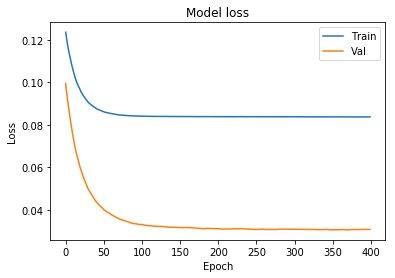

In [34]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [35]:
model = Sequential([
    Dense(28, activation='sigmoid', input_shape=(18,)),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [36]:
epochs=400
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])
#opt = model.optimizers.Adam(learning_rate=0.1)
#model.compile(optimizer='adam',
#model.compile(optimizer=opt,
model.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [37]:
hist = model.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))

Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 7ms/step - loss: 0.1303 - accuracy: 0.1642 - val_loss: 0.1045 - val_accuracy: 0.2667
Epoch 2/400
67/67 [==============================] - 0s 264us/step - loss: 0.1245 - accuracy: 0.1642 - val_loss: 0.1009 - val_accuracy: 0.2667
Epoch 3/400
67/67 [==============================] - 0s 306us/step - loss: 0.1221 - accuracy: 0.1642 - val_loss: 0.0975 - val_accuracy: 0.2667
Epoch 4/400
67/67 [==============================] - 0s 313us/step - loss: 0.1197 - accuracy: 0.1642 - val_loss: 0.0943 - val_accuracy: 0.2667
Epoch 5/400
67/67 [==============================] - 0s 288us/step - loss: 0.1176 - accuracy: 0.1642 - val_loss: 0.0913 - val_accuracy: 0.2667
Epoch 6/400
67/67 [==============================] - 0s 293us/step - loss: 0.1156 - accuracy: 0.1642 - val_loss: 0.0889 - val_accuracy: 0.2667
Epoch 7/400
67/67 [==============================] - 0s 291us/step - loss: 0.1140 - accuracy: 0.1642

Epoch 58/400
67/67 [==============================] - 0s 250us/step - loss: 0.0871 - accuracy: 0.1642 - val_loss: 0.0406 - val_accuracy: 0.2667
Epoch 59/400
67/67 [==============================] - 0s 268us/step - loss: 0.0870 - accuracy: 0.1642 - val_loss: 0.0403 - val_accuracy: 0.2667
Epoch 60/400
67/67 [==============================] - 0s 277us/step - loss: 0.0869 - accuracy: 0.1642 - val_loss: 0.0400 - val_accuracy: 0.2667
Epoch 61/400
67/67 [==============================] - 0s 354us/step - loss: 0.0868 - accuracy: 0.1642 - val_loss: 0.0397 - val_accuracy: 0.2667
Epoch 62/400
67/67 [==============================] - 0s 326us/step - loss: 0.0867 - accuracy: 0.1642 - val_loss: 0.0394 - val_accuracy: 0.2667
Epoch 63/400
67/67 [==============================] - 0s 380us/step - loss: 0.0866 - accuracy: 0.1642 - val_loss: 0.0392 - val_accuracy: 0.2667
Epoch 64/400
67/67 [==============================] - 0s 334us/step - loss: 0.0865 - accuracy: 0.1642 - val_loss: 0.0390 - val_accuracy:

Epoch 115/400
67/67 [==============================] - 0s 425us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0333 - val_accuracy: 0.2667
Epoch 116/400
67/67 [==============================] - 0s 437us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0332 - val_accuracy: 0.2667
Epoch 117/400
67/67 [==============================] - 0s 397us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0331 - val_accuracy: 0.2667
Epoch 118/400
67/67 [==============================] - 0s 385us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0331 - val_accuracy: 0.2667
Epoch 119/400
67/67 [==============================] - 0s 366us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0330 - val_accuracy: 0.2667
Epoch 120/400
67/67 [==============================] - 0s 344us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0329 - val_accuracy: 0.2667
Epoch 121/400
67/67 [==============================] - 0s 400us/step - loss: 0.0850 - accuracy: 0.1642 - val_loss: 0.0329 - val_ac

67/67 [==============================] - 0s 324us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 172/400
67/67 [==============================] - 0s 336us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 173/400
67/67 [==============================] - 0s 322us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 174/400
67/67 [==============================] - 0s 333us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 175/400
67/67 [==============================] - 0s 302us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 176/400
67/67 [==============================] - 0s 265us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667
Epoch 177/400
67/67 [==============================] - 0s 271us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0312 - val_accuracy: 0.2667

67/67 [==============================] - 0s 265us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 228/400
67/67 [==============================] - 0s 267us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 229/400
67/67 [==============================] - 0s 339us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 230/400
67/67 [==============================] - 0s 288us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0310 - val_accuracy: 0.2667
Epoch 231/400
67/67 [==============================] - 0s 323us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 232/400
67/67 [==============================] - 0s 270us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667
Epoch 233/400
67/67 [==============================] - 0s 313us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0309 - val_accuracy: 0.2667

67/67 [==============================] - 0s 304us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 284/400
67/67 [==============================] - 0s 338us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 285/400
67/67 [==============================] - 0s 293us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 286/400
67/67 [==============================] - 0s 310us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 287/400
67/67 [==============================] - 0s 308us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 288/400
67/67 [==============================] - 0s 291us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 289/400
67/67 [==============================] - 0s 318us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667

67/67 [==============================] - 0s 356us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 340/400
67/67 [==============================] - 0s 316us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 341/400
67/67 [==============================] - 0s 304us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 342/400
67/67 [==============================] - 0s 323us/step - loss: 0.0847 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 343/400
67/67 [==============================] - 0s 309us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 344/400
67/67 [==============================] - 0s 341us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 345/400
67/67 [==============================] - 0s 306us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667

67/67 [==============================] - 0s 319us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 396/400
67/67 [==============================] - 0s 317us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0306 - val_accuracy: 0.2667
Epoch 397/400
67/67 [==============================] - 0s 298us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 398/400
67/67 [==============================] - 0s 336us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 399/400
67/67 [==============================] - 0s 334us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667
Epoch 400/400
67/67 [==============================] - 0s 331us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0305 - val_accuracy: 0.2667


In [38]:
model.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 89us/step


0.06666667014360428

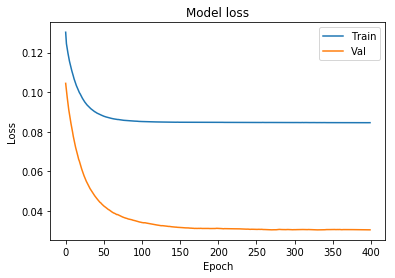

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [40]:
from keras.models import Sequential

In [41]:
#model = Sequential()
weights = model.get_weights()

In [42]:
print(weights)

[array([[ 0.07118103, -0.08513176, -0.323378  , -0.00333861, -0.08770858,
        -0.2894129 ,  0.29450575, -0.16100432,  0.0217675 ,  0.1014756 ,
        -0.17447054,  0.28961608, -0.11539371, -0.00964764,  0.15191445,
        -0.26978356,  0.18175241, -0.186609  ,  0.13461995, -0.0385341 ,
         0.21894291, -0.0301016 ,  0.05375975, -0.10716346, -0.30081642,
        -0.22869803, -0.32787105, -0.0505031 ],
       [-0.34082028, -0.17517568,  0.21960601, -0.16659722,  0.17463027,
        -0.35758638,  0.35156175, -0.31480023, -0.22669846,  0.34460065,
         0.3396354 , -0.13017787,  0.22013101,  0.3400171 , -0.11963911,
        -0.17018613, -0.31589636, -0.35715973, -0.30337507, -0.07416162,
         0.23063275, -0.11109698,  0.2889832 ,  0.0917967 , -0.29750288,
         0.20059827, -0.15602306,  0.06139594],
       [ 0.17382321,  0.33871618, -0.11459309,  0.14409408,  0.15517905,
        -0.16523828, -0.3582582 ,  0.27418998, -0.09373891,  0.27757922,
         0.28855821,  0.330

In [43]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 28)                532       
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 87        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 4         
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


In [44]:
Xnew = [[2002, 1.9, 1], [2012, 2, 1], [2015, 2, 4]]
Xnew = [2002, 1.9, 1]
Xnew

[2002, 1.9, 1]

In [45]:
df_t = pd.read_excel(open('Cost_Sch-data.xlsx', 'rb'), sheet_name='Cost_T1')
df_t.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Bohai Ming Zhu,8,5,2,2,1,4350,3,259,0.40,...,40000,1,2,1,30,1,1.0000,1,0.471042,0.25
1,Petrojarl Varg,5,1,1,1,1,2240,3,816,0.46,...,65833,2,2,1,84,1,0.8658,2,0.286765,0.24
2,Stybarrow Venture MV16,4,3,3,1,3,5922,3,702,0.60,...,87500,2,3,1,825,2,0.9143,4,-0.143875,0.27
3,Alima FPU,1,2,3,2,1,5720,3,994,1.13,...,100000,3,1,2,600,3,0.9000,4,-0.022133,0.35
4,Jangkrik,2,4,1,2,1,8824,3,1052,2.68,...,79400,2,2,2,120,2,0.0554,3,0.114068,0.17


In [46]:
dataset_t = df_t.values
Xnew = dataset_t[:,1:19]
Xnew


array([[8, 5, 2, ..., 1, 1.0, 1],
       [5, 1, 1, ..., 1, 0.8658, 2],
       [4, 3, 3, ..., 2, 0.9143, 4],
       ...,
       [6, 4, 3, ..., 1, 0.9474, 5],
       [5, 1, 1, ..., 2, 0.8824, 5],
       [2, 5, 3, ..., 3, 0.878, 5]], dtype=object)

In [47]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale = min_max_scaler.fit_transform(Xnew)

In [48]:
ynew1 = model.predict(Xnew_scale)

In [49]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew1[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [8 5 2 2 1 4350 3 259 0.4 1 40000 1 2 1 30 1 1.0 1], ynew[0] = [0.34495127] 
Xnew[1] = [5 1 1 1 1 2240 3 816 0.46 1 65833 2 2 1 84 1 0.8658 2], ynew[1] = [0.3355922] 
Xnew[2] = [4 3 3 1 3 5922 3 702 0.6 1 87500 2 3 1 825 2 0.9143 4], ynew[2] = [0.34459317] 
Xnew[3] = [1 2 3 2 1 5720 3 994 1.13 1 100000 3 1 2 600 3 0.9 4], ynew[3] = [0.34365213] 
Xnew[4] = [2 4 1 2 1 8824 3 1052 2.68 1 79400 2 2 2 120 2 0.0554 3], ynew[4] = [0.34250897] 
Xnew[5] = [4 3 3 2 1 7814 3 2229 11.16 1 148333 6 5 6 250 1 0.236 5], ynew[5] = [0.34382933] 
Xnew[6] = [1 3 3 2 1 7534 3 1383 1.8 1 198333 4 2 1 1290 4 0.8067 5], ynew[6] = [0.34309334] 
Xnew[7] = [1 4 3 2 1 4872 3 1306 3.4 1 287000 6 3 1 1360 5 0.8362 2], ynew[7] = [0.3457509] 
Xnew[8] = [1 4 3 2 1 3103 3 823 2.5 1 246667 5 3 1 1350 1 0.8108 1], ynew[8] = [0.3500886] 
Xnew[9] = [1 3 3 2 1 4756 3 1071 0.76 1 316667 6 1 1 1250 5 0.7895 2], ynew[9] = [0.3445935] 
Xnew[10] = [1 4 3 1 1 5866 3 797 0.75 2 

In [50]:
ynew1
# create excel writer
# write dataframe to excel sheet named 'marks'
writer = pd.ExcelWriter('predict_cost.xlsx')
ynew1_df = pd.DataFrame (ynew1)
ynew1_df.to_excel(writer, '18')
# save the excel file
writer.save()

In [51]:
ynew3 = model3.predict(Xnew_scale)

In [52]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew3[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [8 5 2 2 1 4350 3 259 0.4 1 40000 1 2 1 30 1 1.0 1], ynew[0] = [0.3051316] 
Xnew[1] = [5 1 1 1 1 2240 3 816 0.46 1 65833 2 2 1 84 1 0.8658 2], ynew[1] = [0.30207878] 
Xnew[2] = [4 3 3 1 3 5922 3 702 0.6 1 87500 2 3 1 825 2 0.9143 4], ynew[2] = [0.30151463] 
Xnew[3] = [1 2 3 2 1 5720 3 994 1.13 1 100000 3 1 2 600 3 0.9 4], ynew[3] = [0.30418923] 
Xnew[4] = [2 4 1 2 1 8824 3 1052 2.68 1 79400 2 2 2 120 2 0.0554 3], ynew[4] = [0.31277305] 
Xnew[5] = [4 3 3 2 1 7814 3 2229 11.16 1 148333 6 5 6 250 1 0.236 5], ynew[5] = [0.31201884] 
Xnew[6] = [1 3 3 2 1 7534 3 1383 1.8 1 198333 4 2 1 1290 4 0.8067 5], ynew[6] = [0.3054123] 
Xnew[7] = [1 4 3 2 1 4872 3 1306 3.4 1 287000 6 3 1 1360 5 0.8362 2], ynew[7] = [0.30582264] 
Xnew[8] = [1 4 3 2 1 3103 3 823 2.5 1 246667 5 3 1 1350 1 0.8108 1], ynew[8] = [0.30603606] 
Xnew[9] = [1 3 3 2 1 4756 3 1071 0.76 1 316667 6 1 1 1250 5 0.7895 2], ynew[9] = [0.30306405] 
Xnew[10] = [1 4 3 1 1 5866 3 797 0.75 

In [53]:
ynew3

array([[0.3051316 ],
       [0.30207878],
       [0.30151463],
       [0.30418923],
       [0.31277305],
       [0.31201884],
       [0.3054123 ],
       [0.30582264],
       [0.30603606],
       [0.30306405],
       [0.30591688],
       [0.30508217],
       [0.30484718],
       [0.31344473],
       [0.30573928],
       [0.30520397],
       [0.30444565],
       [0.30687535],
       [0.30627394],
       [0.30679882],
       [0.30590433],
       [0.30458456],
       [0.31081408],
       [0.3094288 ],
       [0.30771828],
       [0.30544853],
       [0.30630952],
       [0.306992  ],
       [0.30480415],
       [0.3048977 ],
       [0.3046475 ],
       [0.30872005],
       [0.30679947],
       [0.3075481 ],
       [0.30818474],
       [0.31019393],
       [0.31100172],
       [0.3099057 ],
       [0.30590916],
       [0.3067512 ],
       [0.31122655],
       [0.3039341 ],
       [0.30414674],
       [0.30662993],
       [0.30657828],
       [0.30987406],
       [0.30808306],
       [0.307

In [54]:
dataset

array([['Bohai Ming Zhu', 8, 5, ..., 1, 0.47104247104247104,
        0.24999999999999994],
       ['Petrojarl Varg', 5, 1, ..., 2, 0.2867647058823529, 0.24],
       ['Stybarrow Venture MV16', 4, 3, ..., 4, -0.14387464387464388,
        0.2699999999999999],
       ...,
       ['Big Foot', 6, 4, ..., 5, 0.9489862655330281, 0.2749999999999999],
       ['Heidrun TLP', 5, 1, ..., 5, 0.03940568475452196,
        0.076923076923077],
       ['Malikai TLP', 2, 5, ..., 5, 0.3679611650485437,
        0.07797270955165699]], dtype=object)

11 Features:
Region
Local Content
Lease/ Own
Planned_Cost
Hull Type
Technology Novelty
Type Unit
Water_Depth 
Lessons Learned
Oil/Gas
FEED Detail

Use only Region, Water Depth, Technology Novelty, and Lessons Learned

In [55]:
#Reduce features as per pearson correlation
X = dataset[:,[1, 2, 4, 9, 10, 13, 14, 15, 16, 17, 18]]
print(X.shape)

(97, 11)


In [56]:
X

array([[8, 5, 2, ..., 1, 1.0, 1],
       [5, 1, 1, ..., 1, 0.8658227848101266, 2],
       [4, 3, 1, ..., 2, 0.9142857142857143, 4],
       ...,
       [6, 4, 2, ..., 1, 0.9473684210526315, 5],
       [5, 1, 2, ..., 2, 0.8823529411764707, 5],
       [2, 5, 2, ..., 3, 0.878048780487805, 5]], dtype=object)

In [57]:
Y = dataset[:,20]

In [58]:
Y

array([0.24999999999999994, 0.24, 0.2699999999999999, 0.35000000000000014,
       0.16999999999999996, 0.3440860215053763, 0.05555555555555548,
       0.17647058823529416, 0.11999999999999993, 0.13333333333333341, 0.0,
       0.0, 0.85, 0.4, 0.0, 0.0, 0.3, 0.5000000000000001, -0.09375,
       0.5700000000000003, 0.13333333333333322, 0.32352941176470584,
       0.012027952212040005, 0.3333333333333333, 0.4112903225806451,
       0.3846153846153846, 0.3846153846153846, 0.004184100418409952,
       0.59441052, 0.2538461538461537, 0.971383147853736,
       0.00554235946159946, 0.3076923076923076, 0.19999999999999996,
       0.31099999999999994, 0.3600000000000001, 0.62, 0.52,
       0.36974789915966394, 0.6000000000000001, 0.7, 0.1924686192468619,
       0.24999999999999994, 0.0781671159029651, 0.20000000000000004,
       0.04086956521739138, 0.044000000000000004, 0.38888888888888884,
       0.98, 0.3999999999999999, 0.08333333333333341, 0.08333333333333341,
       0.8500000000000002, 0.0,

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [60]:
X_scale

array([[1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.57142857, 0.        , 0.        , ..., 0.        , 0.85795105,
        0.25      ],
       [0.42857143, 0.5       , 0.        , ..., 0.25      , 0.90925714,
        0.75      ],
       ...,
       [0.71428571, 0.75      , 1.        , ..., 0.        , 0.9442807 ,
        1.        ],
       [0.57142857, 0.        , 1.        , ..., 0.25      , 0.87545098,
        1.        ],
       [0.14285714, 1.        , 1.        , ..., 0.5       , 0.87089431,
        1.        ]])

In [61]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [62]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [63]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [64]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(67, 11) (15, 11) (15, 11) (67,) (15,) (15,)


In [65]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [66]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [67]:
for train, test in kfold.split(X_scale, Y):
# create model
	model4 = Sequential()
	model4.add(Dense(12, input_dim=11, activation='relu'))
	model4.add(Dense(8, activation='relu'))
	model4.add(Dense(1, activation='sigmoid'))
	# Compile model
	model4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model4.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model4.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 16.09%
accuracy: 17.24%
accuracy: 18.39%
accuracy: 18.39%
accuracy: 16.09%
accuracy: 14.94%
accuracy: 14.94%
accuracy: 15.91%
accuracy: 18.18%
accuracy: 14.77%
16.50% (+/- 1.38%)


In [68]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model5 = Sequential([
        Dense(22, activation='sigmoid', input_shape=(11,)),
        Dense(11, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model5.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model5.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model5.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 5ms/step - loss: 0.1613 - accuracy: 0.0000e+00 - val_loss: 0.1621 - val_accuracy: 0.0000e+00
Epoch 2/400
67/67 [==============================] - 0s 228us/step - loss: 0.1425 - accuracy: 0.0000e+00 - val_loss: 0.1546 - val_accuracy: 0.0000e+00
Epoch 3/400
67/67 [==============================] - 0s 281us/step - loss: 0.1360 - accuracy: 0.0896 - val_loss: 0.1468 - val_accuracy: 0.2000
Epoch 4/400
67/67 [==============================] - 0s 240us/step - loss: 0.1297 - accuracy: 0.1343 - val_loss: 0.1399 - val_accuracy: 0.2000
Epoch 5/400
67/67 [==============================] - 0s 252us/step - loss: 0.1240 - accuracy: 0.1343 - val_loss: 0.1336 - val_accuracy: 0.2000
Epoch 6/400
67/67 [==============================] - 0s 238us/step - loss: 0.1190 - accuracy: 0.1343 - val_loss: 0.1283 - val_accuracy: 0.2000
Epoch 7/400
67/67 [==============================] - 0s 253us/step - loss: 0.1147 - 

67/67 [==============================] - 0s 224us/step - loss: 0.0722 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 58/400
67/67 [==============================] - 0s 229us/step - loss: 0.0721 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 59/400
67/67 [==============================] - 0s 232us/step - loss: 0.0721 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000
Epoch 60/400
67/67 [==============================] - 0s 241us/step - loss: 0.0719 - accuracy: 0.1343 - val_loss: 0.0697 - val_accuracy: 0.2000
Epoch 61/400
67/67 [==============================] - 0s 239us/step - loss: 0.0718 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 62/400
67/67 [==============================] - 0s 236us/step - loss: 0.0722 - accuracy: 0.1343 - val_loss: 0.0708 - val_accuracy: 0.2000
Epoch 63/400
67/67 [==============================] - 0s 241us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0690 - val_accuracy: 0.2000
Epoch

Epoch 114/400
67/67 [==============================] - 0s 252us/step - loss: 0.0764 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 115/400
67/67 [==============================] - 0s 246us/step - loss: 0.0709 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 116/400
67/67 [==============================] - 0s 239us/step - loss: 0.0709 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 117/400
67/67 [==============================] - 0s 232us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 118/400
67/67 [==============================] - 0s 264us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 119/400
67/67 [==============================] - 0s 228us/step - loss: 0.0709 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 120/400
67/67 [==============================] - 0s 233us/step - loss: 0.0707 - accuracy: 0.1343 - val_loss: 0.0683 - val_ac

67/67 [==============================] - 0s 255us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0678 - val_accuracy: 0.2000
Epoch 171/400
67/67 [==============================] - 0s 226us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 172/400
67/67 [==============================] - 0s 240us/step - loss: 0.0723 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 173/400
67/67 [==============================] - 0s 240us/step - loss: 0.0723 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 174/400
67/67 [==============================] - 0s 287us/step - loss: 0.0723 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 175/400
67/67 [==============================] - 0s 309us/step - loss: 0.0723 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 176/400
67/67 [==============================] - 0s 311us/step - loss: 0.0723 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000

67/67 [==============================] - 0s 312us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 227/400
67/67 [==============================] - 0s 300us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 228/400
67/67 [==============================] - 0s 305us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 229/400
67/67 [==============================] - 0s 267us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 230/400
67/67 [==============================] - 0s 258us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 231/400
67/67 [==============================] - 0s 251us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 232/400
67/67 [==============================] - 0s 260us/step - loss: 0.0709 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000

67/67 [==============================] - 0s 241us/step - loss: 0.0677 - accuracy: 0.1343 - val_loss: 0.0755 - val_accuracy: 0.2000
Epoch 283/400
67/67 [==============================] - 0s 233us/step - loss: 0.0669 - accuracy: 0.1343 - val_loss: 0.0792 - val_accuracy: 0.2000
Epoch 284/400
67/67 [==============================] - 0s 216us/step - loss: 0.0664 - accuracy: 0.1343 - val_loss: 0.0778 - val_accuracy: 0.2000
Epoch 285/400
67/67 [==============================] - 0s 219us/step - loss: 0.0664 - accuracy: 0.1343 - val_loss: 0.0828 - val_accuracy: 0.2000
Epoch 286/400
67/67 [==============================] - 0s 231us/step - loss: 0.0668 - accuracy: 0.1343 - val_loss: 0.0761 - val_accuracy: 0.2000
Epoch 287/400
67/67 [==============================] - 0s 249us/step - loss: 0.0663 - accuracy: 0.1343 - val_loss: 0.0820 - val_accuracy: 0.2000
Epoch 288/400
67/67 [==============================] - 0s 232us/step - loss: 0.0668 - accuracy: 0.1343 - val_loss: 0.0848 - val_accuracy: 0.2000

67/67 [==============================] - 0s 227us/step - loss: 0.0716 - accuracy: 0.1343 - val_loss: 0.0673 - val_accuracy: 0.2000
Epoch 339/400
67/67 [==============================] - 0s 229us/step - loss: 0.0716 - accuracy: 0.1343 - val_loss: 0.0673 - val_accuracy: 0.2000
Epoch 340/400
67/67 [==============================] - 0s 251us/step - loss: 0.0715 - accuracy: 0.1343 - val_loss: 0.0674 - val_accuracy: 0.2000
Epoch 341/400
67/67 [==============================] - 0s 247us/step - loss: 0.0715 - accuracy: 0.1343 - val_loss: 0.0674 - val_accuracy: 0.2000
Epoch 342/400
67/67 [==============================] - 0s 229us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0674 - val_accuracy: 0.2000
Epoch 343/400
67/67 [==============================] - 0s 240us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0675 - val_accuracy: 0.2000
Epoch 344/400
67/67 [==============================] - 0s 220us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0675 - val_accuracy: 0.2000

67/67 [==============================] - 0s 259us/step - loss: 0.0676 - accuracy: 0.1343 - val_loss: 0.0794 - val_accuracy: 0.2000
Epoch 395/400
67/67 [==============================] - 0s 338us/step - loss: 0.0678 - accuracy: 0.1343 - val_loss: 0.0771 - val_accuracy: 0.2000
Epoch 396/400
67/67 [==============================] - 0s 270us/step - loss: 0.0677 - accuracy: 0.1343 - val_loss: 0.0816 - val_accuracy: 0.2000
Epoch 397/400
67/67 [==============================] - 0s 278us/step - loss: 0.0704 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 398/400
67/67 [==============================] - 0s 286us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 399/400
67/67 [==============================] - 0s 264us/step - loss: 0.0709 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 400/400
67/67 [==============================] - 0s 243us/step - loss: 0.0708 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

Epoch 50/400
67/67 [==============================] - 0s 243us/step - loss: 0.0741 - accuracy: 0.1343 - val_loss: 0.0793 - val_accuracy: 0.2000
Epoch 51/400
67/67 [==============================] - 0s 240us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0789 - val_accuracy: 0.2000
Epoch 52/400
67/67 [==============================] - 0s 248us/step - loss: 0.0735 - accuracy: 0.1343 - val_loss: 0.0785 - val_accuracy: 0.2000
Epoch 53/400
67/67 [==============================] - 0s 235us/step - loss: 0.0733 - accuracy: 0.1343 - val_loss: 0.0780 - val_accuracy: 0.2000
Epoch 54/400
67/67 [==============================] - 0s 245us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0776 - val_accuracy: 0.2000
Epoch 55/400
67/67 [==============================] - 0s 232us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0773 - val_accuracy: 0.2000
Epoch 56/400
67/67 [==============================] - 0s 231us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0769 - val_accuracy:

Epoch 107/400
67/67 [==============================] - 0s 246us/step - loss: 0.0689 - accuracy: 0.1343 - val_loss: 0.0705 - val_accuracy: 0.2000
Epoch 108/400
67/67 [==============================] - 0s 227us/step - loss: 0.0689 - accuracy: 0.1343 - val_loss: 0.0705 - val_accuracy: 0.2000
Epoch 109/400
67/67 [==============================] - 0s 226us/step - loss: 0.0688 - accuracy: 0.1343 - val_loss: 0.0704 - val_accuracy: 0.2000
Epoch 110/400
67/67 [==============================] - 0s 221us/step - loss: 0.0689 - accuracy: 0.1343 - val_loss: 0.0704 - val_accuracy: 0.2000
Epoch 111/400
67/67 [==============================] - 0s 228us/step - loss: 0.0688 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000
Epoch 112/400
67/67 [==============================] - 0s 253us/step - loss: 0.0688 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000
Epoch 113/400
67/67 [==============================] - 0s 254us/step - loss: 0.0688 - accuracy: 0.1343 - val_loss: 0.0703 - val_ac

67/67 [==============================] - 0s 258us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 164/400
67/67 [==============================] - 0s 249us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 165/400
67/67 [==============================] - 0s 262us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 166/400
67/67 [==============================] - 0s 278us/step - loss: 0.0686 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 167/400
67/67 [==============================] - 0s 326us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 168/400
67/67 [==============================] - 0s 266us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 169/400
67/67 [==============================] - 0s 264us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000

/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.108599). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105158). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101717). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


67/67 [==============================] - 0s 347us/step - loss: 0.0684 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 196/400
67/67 [==============================] - 0s 375us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 197/400
67/67 [==============================] - 0s 562us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 198/400
67/67 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 199/400
67/67 [==============================] - 0s 581us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 200/400
67/67 [==============================] - 0s 489us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 201/400
67/67 [==============================] - 0s 495us/step - loss: 0.0685 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
E

67/67 [==============================] - 0s 566us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 252/400
67/67 [==============================] - 0s 232us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 253/400
67/67 [==============================] - 0s 241us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 254/400
67/67 [==============================] - 0s 236us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 255/400
67/67 [==============================] - 0s 211us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 256/400
67/67 [==============================] - 0s 274us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 257/400
67/67 [==============================] - 0s 235us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000

67/67 [==============================] - 0s 247us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 308/400
67/67 [==============================] - 0s 348us/step - loss: 0.0682 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 309/400
67/67 [==============================] - 0s 280us/step - loss: 0.0682 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000
Epoch 310/400
67/67 [==============================] - 0s 340us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000
Epoch 311/400
67/67 [==============================] - 0s 284us/step - loss: 0.0682 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000
Epoch 312/400
67/67 [==============================] - 0s 318us/step - loss: 0.0682 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 313/400
67/67 [==============================] - 0s 253us/step - loss: 0.0683 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000

67/67 [==============================] - 0s 400us/step - loss: 0.0682 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 364/400
67/67 [==============================] - 0s 395us/step - loss: 0.0682 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 365/400
67/67 [==============================] - 0s 336us/step - loss: 0.0681 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 366/400
67/67 [==============================] - 0s 252us/step - loss: 0.0681 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 367/400
67/67 [==============================] - 0s 303us/step - loss: 0.0681 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 368/400
67/67 [==============================] - 0s 253us/step - loss: 0.0681 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 369/400
67/67 [==============================] - 0s 275us/step - loss: 0.0681 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000

67/67 [==============================] - 0s 367us/step - loss: 0.0770 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 20/400
67/67 [==============================] - 0s 512us/step - loss: 0.0770 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 21/400
67/67 [==============================] - 0s 440us/step - loss: 0.0770 - accuracy: 0.1343 - val_loss: 0.0678 - val_accuracy: 0.2000
Epoch 22/400
67/67 [==============================] - 0s 373us/step - loss: 0.0769 - accuracy: 0.1343 - val_loss: 0.0676 - val_accuracy: 0.2000
Epoch 23/400
67/67 [==============================] - 0s 388us/step - loss: 0.0769 - accuracy: 0.1343 - val_loss: 0.0676 - val_accuracy: 0.2000
Epoch 24/400
67/67 [==============================] - 0s 351us/step - loss: 0.0768 - accuracy: 0.1343 - val_loss: 0.0675 - val_accuracy: 0.2000
Epoch 25/400
67/67 [==============================] - 0s 328us/step - loss: 0.0768 - accuracy: 0.1343 - val_loss: 0.0674 - val_accuracy: 0.2000
Epoch

Epoch 76/400
67/67 [==============================] - 0s 247us/step - loss: 0.0748 - accuracy: 0.1343 - val_loss: 0.0665 - val_accuracy: 0.2000
Epoch 77/400
67/67 [==============================] - 0s 221us/step - loss: 0.0748 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 78/400
67/67 [==============================] - 0s 238us/step - loss: 0.0748 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 79/400
67/67 [==============================] - 0s 237us/step - loss: 0.0747 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 80/400
67/67 [==============================] - 0s 244us/step - loss: 0.0747 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 81/400
67/67 [==============================] - 0s 278us/step - loss: 0.0747 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 82/400
67/67 [==============================] - 0s 242us/step - loss: 0.0747 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy:

67/67 [==============================] - 0s 294us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0663 - val_accuracy: 0.2000
Epoch 133/400
67/67 [==============================] - 0s 252us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0663 - val_accuracy: 0.2000
Epoch 134/400
67/67 [==============================] - 0s 276us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0663 - val_accuracy: 0.2000
Epoch 135/400
67/67 [==============================] - 0s 271us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0663 - val_accuracy: 0.2000
Epoch 136/400
67/67 [==============================] - 0s 264us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 137/400
67/67 [==============================] - 0s 359us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0663 - val_accuracy: 0.2000
Epoch 138/400
67/67 [==============================] - 0s 281us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0663 - val_accuracy: 0.2000

67/67 [==============================] - 0s 226us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 189/400
67/67 [==============================] - 0s 222us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 190/400
67/67 [==============================] - 0s 270us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 191/400
67/67 [==============================] - 0s 326us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 192/400
67/67 [==============================] - 0s 267us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 193/400
67/67 [==============================] - 0s 282us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000
Epoch 194/400
67/67 [==============================] - 0s 271us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0664 - val_accuracy: 0.2000

67/67 [==============================] - 0s 332us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0668 - val_accuracy: 0.2000
Epoch 245/400
67/67 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0668 - val_accuracy: 0.2000
Epoch 246/400
67/67 [==============================] - 0s 386us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0668 - val_accuracy: 0.2000
Epoch 247/400
67/67 [==============================] - 0s 327us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0668 - val_accuracy: 0.2000
Epoch 248/400
67/67 [==============================] - 0s 375us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0668 - val_accuracy: 0.2000
Epoch 249/400
67/67 [==============================] - 0s 299us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0668 - val_accuracy: 0.2000
Epoch 250/400
67/67 [==============================] - 0s 287us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0668 - val_accuracy: 0.2000

67/67 [==============================] - 0s 245us/step - loss: 0.0721 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 301/400
67/67 [==============================] - 0s 240us/step - loss: 0.0721 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 302/400
67/67 [==============================] - 0s 242us/step - loss: 0.0721 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 303/400
67/67 [==============================] - 0s 234us/step - loss: 0.0721 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 304/400
67/67 [==============================] - 0s 223us/step - loss: 0.0720 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 305/400
67/67 [==============================] - 0s 248us/step - loss: 0.0721 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 306/400
67/67 [==============================] - 0s 270us/step - loss: 0.0721 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 270us/step - loss: 0.0717 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 357/400
67/67 [==============================] - 0s 260us/step - loss: 0.0717 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 358/400
67/67 [==============================] - 0s 273us/step - loss: 0.0717 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 359/400
67/67 [==============================] - 0s 280us/step - loss: 0.0716 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 360/400
67/67 [==============================] - 0s 275us/step - loss: 0.0716 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 361/400
67/67 [==============================] - 0s 312us/step - loss: 0.0716 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 362/400
67/67 [==============================] - 0s 310us/step - loss: 0.0716 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 291us/step - loss: 0.0960 - accuracy: 0.1343 - val_loss: 0.1036 - val_accuracy: 0.2000
Epoch 13/400
67/67 [==============================] - 0s 346us/step - loss: 0.0947 - accuracy: 0.1343 - val_loss: 0.1021 - val_accuracy: 0.2000
Epoch 14/400
67/67 [==============================] - 0s 292us/step - loss: 0.0936 - accuracy: 0.1343 - val_loss: 0.1005 - val_accuracy: 0.2000
Epoch 15/400
67/67 [==============================] - 0s 283us/step - loss: 0.0924 - accuracy: 0.1343 - val_loss: 0.0992 - val_accuracy: 0.2000
Epoch 16/400
67/67 [==============================] - 0s 277us/step - loss: 0.0914 - accuracy: 0.1343 - val_loss: 0.0978 - val_accuracy: 0.2000
Epoch 17/400
67/67 [==============================] - 0s 276us/step - loss: 0.0904 - accuracy: 0.1343 - val_loss: 0.0966 - val_accuracy: 0.2000
Epoch 18/400
67/67 [==============================] - 0s 255us/step - loss: 0.0895 - accuracy: 0.1343 - val_loss: 0.0954 - val_accuracy: 0.2000
Epoch

Epoch 69/400
67/67 [==============================] - 0s 264us/step - loss: 0.0746 - accuracy: 0.1343 - val_loss: 0.0735 - val_accuracy: 0.2000
Epoch 70/400
67/67 [==============================] - 0s 236us/step - loss: 0.0745 - accuracy: 0.1343 - val_loss: 0.0733 - val_accuracy: 0.2000
Epoch 71/400
67/67 [==============================] - 0s 238us/step - loss: 0.0744 - accuracy: 0.1343 - val_loss: 0.0732 - val_accuracy: 0.2000
Epoch 72/400
67/67 [==============================] - 0s 238us/step - loss: 0.0744 - accuracy: 0.1343 - val_loss: 0.0731 - val_accuracy: 0.2000
Epoch 73/400
67/67 [==============================] - 0s 255us/step - loss: 0.0743 - accuracy: 0.1343 - val_loss: 0.0730 - val_accuracy: 0.2000
Epoch 74/400
67/67 [==============================] - 0s 248us/step - loss: 0.0743 - accuracy: 0.1343 - val_loss: 0.0729 - val_accuracy: 0.2000
Epoch 75/400
67/67 [==============================] - 0s 251us/step - loss: 0.0742 - accuracy: 0.1343 - val_loss: 0.0728 - val_accuracy:

Epoch 126/400
67/67 [==============================] - 0s 242us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 127/400
67/67 [==============================] - 0s 238us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 128/400
67/67 [==============================] - 0s 233us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 129/400
67/67 [==============================] - 0s 231us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 130/400
67/67 [==============================] - 0s 233us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 131/400
67/67 [==============================] - 0s 234us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 132/400
67/67 [==============================] - 0s 229us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0695 - val_ac

67/67 [==============================] - 0s 283us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 183/400
67/67 [==============================] - 0s 330us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 184/400
67/67 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 185/400
67/67 [==============================] - 0s 279us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 186/400
67/67 [==============================] - 0s 294us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 187/400
67/67 [==============================] - 0s 305us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 188/400
67/67 [==============================] - 0s 302us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000

67/67 [==============================] - 0s 362us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 239/400
67/67 [==============================] - 0s 303us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 240/400
67/67 [==============================] - 0s 242us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 241/400
67/67 [==============================] - 0s 312us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 242/400
67/67 [==============================] - 0s 289us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 243/400
67/67 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 244/400
67/67 [==============================] - 0s 262us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 295/400
67/67 [==============================] - 0s 256us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 296/400
67/67 [==============================] - 0s 267us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 297/400
67/67 [==============================] - 0s 312us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 298/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 299/400
67/67 [==============================] - 0s 258us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 300/400
67/67 [==============================] - 0s 252us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 345us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 351/400
67/67 [==============================] - 0s 267us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 352/400
67/67 [==============================] - 0s 246us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 353/400
67/67 [==============================] - 0s 244us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 354/400
67/67 [==============================] - 0s 259us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 355/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 356/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 264us/step - loss: 0.0983 - accuracy: 0.1343 - val_loss: 0.1060 - val_accuracy: 0.2000
Epoch 7/400
67/67 [==============================] - 0s 273us/step - loss: 0.0962 - accuracy: 0.1343 - val_loss: 0.1032 - val_accuracy: 0.2000
Epoch 8/400
67/67 [==============================] - 0s 230us/step - loss: 0.0941 - accuracy: 0.1343 - val_loss: 0.1009 - val_accuracy: 0.2000
Epoch 9/400
67/67 [==============================] - 0s 240us/step - loss: 0.0924 - accuracy: 0.1343 - val_loss: 0.0985 - val_accuracy: 0.2000
Epoch 10/400
67/67 [==============================] - 0s 236us/step - loss: 0.0907 - accuracy: 0.1343 - val_loss: 0.0965 - val_accuracy: 0.2000
Epoch 11/400
67/67 [==============================] - 0s 237us/step - loss: 0.0893 - accuracy: 0.1343 - val_loss: 0.0945 - val_accuracy: 0.2000
Epoch 12/400
67/67 [==============================] - 0s 264us/step - loss: 0.0878 - accuracy: 0.1343 - val_loss: 0.0928 - val_accuracy: 0.2000
Epoch 13

67/67 [==============================] - 0s 271us/step - loss: 0.0732 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000
Epoch 64/400
67/67 [==============================] - 0s 225us/step - loss: 0.0732 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000
Epoch 65/400
67/67 [==============================] - 0s 224us/step - loss: 0.0732 - accuracy: 0.1343 - val_loss: 0.0702 - val_accuracy: 0.2000
Epoch 66/400
67/67 [==============================] - 0s 236us/step - loss: 0.0732 - accuracy: 0.1343 - val_loss: 0.0702 - val_accuracy: 0.2000
Epoch 67/400
67/67 [==============================] - 0s 244us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0701 - val_accuracy: 0.2000
Epoch 68/400
67/67 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch 69/400
67/67 [==============================] - 0s 236us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch

Epoch 120/400
67/67 [==============================] - 0s 226us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 121/400
67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 122/400
67/67 [==============================] - 0s 223us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 123/400
67/67 [==============================] - 0s 249us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 124/400
67/67 [==============================] - 0s 225us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 125/400
67/67 [==============================] - 0s 229us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 126/400
67/67 [==============================] - 0s 232us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0687 - val_ac

67/67 [==============================] - 0s 231us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 177/400
67/67 [==============================] - 0s 228us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 178/400
67/67 [==============================] - 0s 245us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 179/400
67/67 [==============================] - 0s 220us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 180/400
67/67 [==============================] - 0s 241us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 181/400
67/67 [==============================] - 0s 231us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 182/400
67/67 [==============================] - 0s 225us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000

67/67 [==============================] - 0s 236us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 233/400
67/67 [==============================] - 0s 246us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 234/400
67/67 [==============================] - 0s 221us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 235/400
67/67 [==============================] - 0s 222us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 236/400
67/67 [==============================] - 0s 223us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 237/400
67/67 [==============================] - 0s 238us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 238/400
67/67 [==============================] - 0s 233us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 231us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 289/400
67/67 [==============================] - 0s 256us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 290/400
67/67 [==============================] - 0s 237us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 291/400
67/67 [==============================] - 0s 256us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 292/400
67/67 [==============================] - 0s 246us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 293/400
67/67 [==============================] - 0s 248us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 294/400
67/67 [==============================] - 0s 276us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 250us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 345/400
67/67 [==============================] - 0s 261us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 346/400
67/67 [==============================] - 0s 330us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 347/400
67/67 [==============================] - 0s 254us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 348/400
67/67 [==============================] - 0s 287us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 349/400
67/67 [==============================] - 0s 252us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 350/400
67/67 [==============================] - 0s 269us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 245us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 5ms/step - loss: 0.1095 - accuracy: 0.1343 - val_loss: 0.1142 - val_accuracy: 0.2000
Epoch 2/400
67/67 [==============================] - 0s 244us/step - loss: 0.1005 - accuracy: 0.1343 - val_loss: 0.1099 - val_accuracy: 0.2000
Epoch 3/400
67/67 [==============================] - 0s 242us/step - loss: 0.0980 - accuracy: 0.1343 - val_loss: 0.1074 - val_accuracy: 0.2000
Epoch 4/400
67/67 [==============================] - 0s 253us/step - loss: 0.0961 - accuracy: 0.1343 - val_loss: 0.1051 - val_accuracy: 0.2000
Epoch 5/400
67/67 [==============================] - 0s 264us/step - loss: 0.0946 - accuracy: 0.1343 - val_loss: 0.1034 - val_accuracy: 0.2000
Epoch 6/400
67/67 [==============================] - 0s 268us/step - loss: 0.0933 - accuracy: 0.1343 - val_loss:

Epoch 57/400
67/67 [==============================] - 0s 260us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0741 - val_accuracy: 0.2000
Epoch 58/400
67/67 [==============================] - 0s 237us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0739 - val_accuracy: 0.2000
Epoch 59/400
67/67 [==============================] - 0s 222us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0738 - val_accuracy: 0.2000
Epoch 60/400
67/67 [==============================] - 0s 246us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0737 - val_accuracy: 0.2000
Epoch 61/400
67/67 [==============================] - 0s 244us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0735 - val_accuracy: 0.2000
Epoch 62/400
67/67 [==============================] - 0s 249us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0734 - val_accuracy: 0.2000
Epoch 63/400
67/67 [==============================] - 0s 230us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0733 - val_accuracy:

Epoch 114/400
67/67 [==============================] - 0s 224us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0708 - val_accuracy: 0.2000
Epoch 115/400
67/67 [==============================] - 0s 225us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0707 - val_accuracy: 0.2000
Epoch 116/400
67/67 [==============================] - 0s 221us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0706 - val_accuracy: 0.2000
Epoch 117/400
67/67 [==============================] - 0s 221us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0705 - val_accuracy: 0.2000
Epoch 118/400
67/67 [==============================] - 0s 221us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0705 - val_accuracy: 0.2000
Epoch 119/400
67/67 [==============================] - 0s 222us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0705 - val_accuracy: 0.2000
Epoch 120/400
67/67 [==============================] - 0s 243us/step - loss: 0.0709 - accuracy: 0.1343 - val_loss: 0.0704 - val_ac

67/67 [==============================] - 0s 284us/step - loss: 0.0705 - accuracy: 0.1343 - val_loss: 0.0697 - val_accuracy: 0.2000
Epoch 171/400
67/67 [==============================] - 0s 294us/step - loss: 0.0705 - accuracy: 0.1343 - val_loss: 0.0697 - val_accuracy: 0.2000
Epoch 172/400
67/67 [==============================] - 0s 338us/step - loss: 0.0705 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 173/400
67/67 [==============================] - 0s 286us/step - loss: 0.0705 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 174/400
67/67 [==============================] - 0s 229us/step - loss: 0.0704 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 175/400
67/67 [==============================] - 0s 284us/step - loss: 0.0704 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 176/400
67/67 [==============================] - 0s 239us/step - loss: 0.0704 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000

67/67 [==============================] - 0s 254us/step - loss: 0.0702 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 227/400
67/67 [==============================] - 0s 238us/step - loss: 0.0702 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 228/400
67/67 [==============================] - 0s 228us/step - loss: 0.0702 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 229/400
67/67 [==============================] - 0s 259us/step - loss: 0.0701 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 230/400
67/67 [==============================] - 0s 234us/step - loss: 0.0702 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 231/400
67/67 [==============================] - 0s 238us/step - loss: 0.0701 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 232/400
67/67 [==============================] - 0s 217us/step - loss: 0.0702 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000

67/67 [==============================] - 0s 266us/step - loss: 0.0700 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 283/400
67/67 [==============================] - 0s 263us/step - loss: 0.0700 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 284/400
67/67 [==============================] - 0s 260us/step - loss: 0.0700 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 285/400
67/67 [==============================] - 0s 239us/step - loss: 0.0700 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 286/400
67/67 [==============================] - 0s 259us/step - loss: 0.0699 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 287/400
67/67 [==============================] - 0s 236us/step - loss: 0.0699 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 288/400
67/67 [==============================] - 0s 298us/step - loss: 0.0699 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000

67/67 [==============================] - 0s 306us/step - loss: 0.0697 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 339/400
67/67 [==============================] - 0s 324us/step - loss: 0.0697 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 340/400
67/67 [==============================] - 0s 311us/step - loss: 0.0697 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 341/400
67/67 [==============================] - 0s 281us/step - loss: 0.0697 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 342/400
67/67 [==============================] - 0s 311us/step - loss: 0.0697 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 343/400
67/67 [==============================] - 0s 267us/step - loss: 0.0697 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 344/400
67/67 [==============================] - 0s 309us/step - loss: 0.0697 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000

67/67 [==============================] - 0s 248us/step - loss: 0.0695 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 395/400
67/67 [==============================] - 0s 271us/step - loss: 0.0695 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 396/400
67/67 [==============================] - 0s 253us/step - loss: 0.0695 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 397/400
67/67 [==============================] - 0s 247us/step - loss: 0.0695 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 398/400
67/67 [==============================] - 0s 261us/step - loss: 0.0695 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 399/400
67/67 [==============================] - 0s 228us/step - loss: 0.0695 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 400/400
67/67 [==============================] - 0s 220us/step - loss: 0.0695 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000

Epoch 50/400
67/67 [==============================] - 0s 235us/step - loss: 0.0778 - accuracy: 0.1343 - val_loss: 0.0798 - val_accuracy: 0.2000
Epoch 51/400
67/67 [==============================] - 0s 251us/step - loss: 0.0775 - accuracy: 0.1343 - val_loss: 0.0793 - val_accuracy: 0.2000
Epoch 52/400
67/67 [==============================] - 0s 235us/step - loss: 0.0771 - accuracy: 0.1343 - val_loss: 0.0788 - val_accuracy: 0.2000
Epoch 53/400
67/67 [==============================] - 0s 240us/step - loss: 0.0768 - accuracy: 0.1343 - val_loss: 0.0784 - val_accuracy: 0.2000
Epoch 54/400
67/67 [==============================] - 0s 257us/step - loss: 0.0766 - accuracy: 0.1343 - val_loss: 0.0780 - val_accuracy: 0.2000
Epoch 55/400
67/67 [==============================] - 0s 243us/step - loss: 0.0763 - accuracy: 0.1343 - val_loss: 0.0775 - val_accuracy: 0.2000
Epoch 56/400
67/67 [==============================] - 0s 243us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0772 - val_accuracy:

Epoch 107/400
67/67 [==============================] - 0s 235us/step - loss: 0.0718 - accuracy: 0.1343 - val_loss: 0.0723 - val_accuracy: 0.2000
Epoch 108/400
67/67 [==============================] - 0s 249us/step - loss: 0.0718 - accuracy: 0.1343 - val_loss: 0.0723 - val_accuracy: 0.2000
Epoch 109/400
67/67 [==============================] - 0s 248us/step - loss: 0.0718 - accuracy: 0.1343 - val_loss: 0.0722 - val_accuracy: 0.2000
Epoch 110/400
67/67 [==============================] - 0s 244us/step - loss: 0.0718 - accuracy: 0.1343 - val_loss: 0.0724 - val_accuracy: 0.2000
Epoch 111/400
67/67 [==============================] - 0s 248us/step - loss: 0.0717 - accuracy: 0.1343 - val_loss: 0.0724 - val_accuracy: 0.2000
Epoch 112/400
67/67 [==============================] - 0s 234us/step - loss: 0.0718 - accuracy: 0.1343 - val_loss: 0.0725 - val_accuracy: 0.2000
Epoch 113/400
67/67 [==============================] - 0s 253us/step - loss: 0.0717 - accuracy: 0.1343 - val_loss: 0.0725 - val_ac

67/67 [==============================] - 0s 243us/step - loss: 0.0715 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 164/400
67/67 [==============================] - 0s 239us/step - loss: 0.0714 - accuracy: 0.1343 - val_loss: 0.0702 - val_accuracy: 0.2000
Epoch 165/400
67/67 [==============================] - 0s 237us/step - loss: 0.0714 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000
Epoch 166/400
67/67 [==============================] - 0s 235us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0704 - val_accuracy: 0.2000
Epoch 167/400
67/67 [==============================] - 0s 236us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0704 - val_accuracy: 0.2000
Epoch 168/400
67/67 [==============================] - 0s 251us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000
Epoch 169/400
67/67 [==============================] - 0s 229us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000

67/67 [==============================] - 0s 312us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0678 - val_accuracy: 0.2000
Epoch 220/400
67/67 [==============================] - 0s 292us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0678 - val_accuracy: 0.2000
Epoch 221/400
67/67 [==============================] - 0s 340us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0678 - val_accuracy: 0.2000
Epoch 222/400
67/67 [==============================] - 0s 361us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0678 - val_accuracy: 0.2000
Epoch 223/400
67/67 [==============================] - 0s 282us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0678 - val_accuracy: 0.2000
Epoch 224/400
67/67 [==============================] - 0s 281us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000
Epoch 225/400
67/67 [==============================] - 0s 288us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0679 - val_accuracy: 0.2000

67/67 [==============================] - 0s 302us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 276/400
67/67 [==============================] - 0s 290us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 277/400
67/67 [==============================] - 0s 276us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0690 - val_accuracy: 0.2000
Epoch 278/400
67/67 [==============================] - 0s 280us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 279/400
67/67 [==============================] - 0s 277us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 280/400
67/67 [==============================] - 0s 245us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 281/400
67/67 [==============================] - 0s 305us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0699 - val_accuracy: 0.2000

67/67 [==============================] - 0s 248us/step - loss: 0.0689 - accuracy: 0.1343 - val_loss: 0.0811 - val_accuracy: 0.2000
Epoch 332/400
67/67 [==============================] - 0s 335us/step - loss: 0.0694 - accuracy: 0.1343 - val_loss: 0.0781 - val_accuracy: 0.2000
Epoch 333/400
67/67 [==============================] - 0s 266us/step - loss: 0.0688 - accuracy: 0.1343 - val_loss: 0.0820 - val_accuracy: 0.2000
Epoch 334/400
67/67 [==============================] - 0s 347us/step - loss: 0.0686 - accuracy: 0.1343 - val_loss: 0.0841 - val_accuracy: 0.2000
Epoch 335/400
67/67 [==============================] - 0s 334us/step - loss: 0.0697 - accuracy: 0.1343 - val_loss: 0.0735 - val_accuracy: 0.2000
Epoch 336/400
67/67 [==============================] - 0s 321us/step - loss: 0.0708 - accuracy: 0.1343 - val_loss: 0.0739 - val_accuracy: 0.2000
Epoch 337/400
67/67 [==============================] - 0s 325us/step - loss: 0.0707 - accuracy: 0.1343 - val_loss: 0.0741 - val_accuracy: 0.2000

67/67 [==============================] - 0s 235us/step - loss: 0.0708 - accuracy: 0.1343 - val_loss: 0.0729 - val_accuracy: 0.2000
Epoch 388/400
67/67 [==============================] - 0s 277us/step - loss: 0.0707 - accuracy: 0.1343 - val_loss: 0.0730 - val_accuracy: 0.2000
Epoch 389/400
67/67 [==============================] - 0s 258us/step - loss: 0.0707 - accuracy: 0.1343 - val_loss: 0.0732 - val_accuracy: 0.2000
Epoch 390/400
67/67 [==============================] - 0s 247us/step - loss: 0.0707 - accuracy: 0.1343 - val_loss: 0.0730 - val_accuracy: 0.2000
Epoch 391/400
67/67 [==============================] - 0s 235us/step - loss: 0.0707 - accuracy: 0.1343 - val_loss: 0.0740 - val_accuracy: 0.2000
Epoch 392/400
67/67 [==============================] - 0s 244us/step - loss: 0.0706 - accuracy: 0.1343 - val_loss: 0.0743 - val_accuracy: 0.2000
Epoch 393/400
67/67 [==============================] - 0s 240us/step - loss: 0.0707 - accuracy: 0.1343 - val_loss: 0.0748 - val_accuracy: 0.2000

Epoch 44/400
67/67 [==============================] - 0s 241us/step - loss: 0.0747 - accuracy: 0.1343 - val_loss: 0.0749 - val_accuracy: 0.2000
Epoch 45/400
67/67 [==============================] - 0s 331us/step - loss: 0.0746 - accuracy: 0.1343 - val_loss: 0.0748 - val_accuracy: 0.2000
Epoch 46/400
67/67 [==============================] - 0s 268us/step - loss: 0.0745 - accuracy: 0.1343 - val_loss: 0.0747 - val_accuracy: 0.2000
Epoch 47/400
67/67 [==============================] - 0s 245us/step - loss: 0.0745 - accuracy: 0.1343 - val_loss: 0.0745 - val_accuracy: 0.2000
Epoch 48/400
67/67 [==============================] - 0s 244us/step - loss: 0.0744 - accuracy: 0.1343 - val_loss: 0.0744 - val_accuracy: 0.2000
Epoch 49/400
67/67 [==============================] - 0s 254us/step - loss: 0.0743 - accuracy: 0.1343 - val_loss: 0.0743 - val_accuracy: 0.2000
Epoch 50/400
67/67 [==============================] - 0s 249us/step - loss: 0.0742 - accuracy: 0.1343 - val_loss: 0.0742 - val_accuracy:

Epoch 101/400
67/67 [==============================] - 0s 244us/step - loss: 0.0720 - accuracy: 0.1343 - val_loss: 0.0713 - val_accuracy: 0.2000
Epoch 102/400
67/67 [==============================] - 0s 256us/step - loss: 0.0720 - accuracy: 0.1343 - val_loss: 0.0712 - val_accuracy: 0.2000
Epoch 103/400
67/67 [==============================] - 0s 255us/step - loss: 0.0720 - accuracy: 0.1343 - val_loss: 0.0712 - val_accuracy: 0.2000
Epoch 104/400
67/67 [==============================] - 0s 275us/step - loss: 0.0720 - accuracy: 0.1343 - val_loss: 0.0711 - val_accuracy: 0.2000
Epoch 105/400
67/67 [==============================] - 0s 270us/step - loss: 0.0720 - accuracy: 0.1343 - val_loss: 0.0711 - val_accuracy: 0.2000
Epoch 106/400
67/67 [==============================] - 0s 233us/step - loss: 0.0719 - accuracy: 0.1343 - val_loss: 0.0710 - val_accuracy: 0.2000
Epoch 107/400
67/67 [==============================] - 0s 266us/step - loss: 0.0719 - accuracy: 0.1343 - val_loss: 0.0710 - val_ac

67/67 [==============================] - 0s 243us/step - loss: 0.0714 - accuracy: 0.1343 - val_loss: 0.0701 - val_accuracy: 0.2000
Epoch 158/400
67/67 [==============================] - 0s 241us/step - loss: 0.0715 - accuracy: 0.1343 - val_loss: 0.0701 - val_accuracy: 0.2000
Epoch 159/400
67/67 [==============================] - 0s 242us/step - loss: 0.0715 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch 160/400
67/67 [==============================] - 0s 289us/step - loss: 0.0714 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch 161/400
67/67 [==============================] - 0s 241us/step - loss: 0.0714 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch 162/400
67/67 [==============================] - 0s 240us/step - loss: 0.0714 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch 163/400
67/67 [==============================] - 0s 238us/step - loss: 0.0714 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000

67/67 [==============================] - 0s 245us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 214/400
67/67 [==============================] - 0s 261us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 215/400
67/67 [==============================] - 0s 269us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 216/400
67/67 [==============================] - 0s 294us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 217/400
67/67 [==============================] - 0s 252us/step - loss: 0.0713 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000
Epoch 218/400
67/67 [==============================] - 0s 241us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000
Epoch 219/400
67/67 [==============================] - 0s 244us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000

67/67 [==============================] - 0s 249us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 270/400
67/67 [==============================] - 0s 250us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 271/400
67/67 [==============================] - 0s 249us/step - loss: 0.0712 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 272/400
67/67 [==============================] - 0s 256us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 273/400
67/67 [==============================] - 0s 314us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 274/400
67/67 [==============================] - 0s 230us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 275/400
67/67 [==============================] - 0s 236us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000

67/67 [==============================] - 0s 250us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 326/400
67/67 [==============================] - 0s 241us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 327/400
67/67 [==============================] - 0s 248us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 328/400
67/67 [==============================] - 0s 237us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 329/400
67/67 [==============================] - 0s 278us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 330/400
67/67 [==============================] - 0s 232us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 331/400
67/67 [==============================] - 0s 236us/step - loss: 0.0711 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000

67/67 [==============================] - 0s 236us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 382/400
67/67 [==============================] - 0s 235us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 383/400
67/67 [==============================] - 0s 238us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 384/400
67/67 [==============================] - 0s 244us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 385/400
67/67 [==============================] - 0s 239us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 386/400
67/67 [==============================] - 0s 243us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 387/400
67/67 [==============================] - 0s 277us/step - loss: 0.0710 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000

67/67 [==============================] - 0s 244us/step - loss: 0.0748 - accuracy: 0.1343 - val_loss: 0.0738 - val_accuracy: 0.2000
Epoch 38/400
67/67 [==============================] - 0s 306us/step - loss: 0.0747 - accuracy: 0.1343 - val_loss: 0.0737 - val_accuracy: 0.2000
Epoch 39/400
67/67 [==============================] - 0s 302us/step - loss: 0.0746 - accuracy: 0.1343 - val_loss: 0.0735 - val_accuracy: 0.2000
Epoch 40/400
67/67 [==============================] - 0s 290us/step - loss: 0.0745 - accuracy: 0.1343 - val_loss: 0.0734 - val_accuracy: 0.2000
Epoch 41/400
67/67 [==============================] - 0s 254us/step - loss: 0.0744 - accuracy: 0.1343 - val_loss: 0.0732 - val_accuracy: 0.2000
Epoch 42/400
67/67 [==============================] - 0s 263us/step - loss: 0.0744 - accuracy: 0.1343 - val_loss: 0.0731 - val_accuracy: 0.2000
Epoch 43/400
67/67 [==============================] - 0s 232us/step - loss: 0.0743 - accuracy: 0.1343 - val_loss: 0.0729 - val_accuracy: 0.2000
Epoch

Epoch 94/400
67/67 [==============================] - 0s 257us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0698 - val_accuracy: 0.2000
Epoch 95/400
67/67 [==============================] - 0s 239us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0698 - val_accuracy: 0.2000
Epoch 96/400
67/67 [==============================] - 0s 233us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0697 - val_accuracy: 0.2000
Epoch 97/400
67/67 [==============================] - 0s 234us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0697 - val_accuracy: 0.2000
Epoch 98/400
67/67 [==============================] - 0s 237us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0697 - val_accuracy: 0.2000
Epoch 99/400
67/67 [==============================] - 0s 236us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0697 - val_accuracy: 0.2000
Epoch 100/400
67/67 [==============================] - 0s 255us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy

67/67 [==============================] - 0s 244us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 151/400
67/67 [==============================] - 0s 261us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 152/400
67/67 [==============================] - 0s 255us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 153/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 154/400
67/67 [==============================] - 0s 246us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 155/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 156/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000

67/67 [==============================] - 0s 255us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 207/400
67/67 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 208/400
67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 209/400
67/67 [==============================] - 0s 213us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 210/400
67/67 [==============================] - 0s 214us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 211/400
67/67 [==============================] - 0s 220us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 212/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000

67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 263/400
67/67 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 264/400
67/67 [==============================] - 0s 288us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 265/400
67/67 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 266/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 267/400
67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 268/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 242us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 319/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 320/400
67/67 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 321/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 322/400
67/67 [==============================] - 0s 248us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 323/400
67/67 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 324/400
67/67 [==============================] - 0s 225us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 375/400
67/67 [==============================] - 0s 251us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 376/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 377/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 378/400
67/67 [==============================] - 0s 254us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 379/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 380/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 233us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch 31/400
67/67 [==============================] - 0s 226us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0654 - val_accuracy: 0.2000
Epoch 32/400
67/67 [==============================] - 0s 233us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0654 - val_accuracy: 0.2000
Epoch 33/400
67/67 [==============================] - 0s 226us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch 34/400
67/67 [==============================] - 0s 226us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch 35/400
67/67 [==============================] - 0s 245us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch 36/400
67/67 [==============================] - 0s 253us/step - loss: 0.0761 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch

Epoch 87/400
67/67 [==============================] - 0s 252us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0649 - val_accuracy: 0.2000
Epoch 88/400
67/67 [==============================] - 0s 234us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0648 - val_accuracy: 0.2000
Epoch 89/400
67/67 [==============================] - 0s 225us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0649 - val_accuracy: 0.2000
Epoch 90/400
67/67 [==============================] - 0s 225us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0649 - val_accuracy: 0.2000
Epoch 91/400
67/67 [==============================] - 0s 229us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0649 - val_accuracy: 0.2000
Epoch 92/400
67/67 [==============================] - 0s 232us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0649 - val_accuracy: 0.2000
Epoch 93/400
67/67 [==============================] - 0s 275us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0649 - val_accuracy:

67/67 [==============================] - 0s 310us/step - loss: 0.1023 - accuracy: 0.1343 - val_loss: 0.0963 - val_accuracy: 0.2000
Epoch 144/400
67/67 [==============================] - 0s 252us/step - loss: 0.1014 - accuracy: 0.1343 - val_loss: 0.0952 - val_accuracy: 0.2000
Epoch 145/400
67/67 [==============================] - 0s 251us/step - loss: 0.1005 - accuracy: 0.1343 - val_loss: 0.0946 - val_accuracy: 0.2000
Epoch 146/400
67/67 [==============================] - 0s 259us/step - loss: 0.0996 - accuracy: 0.1343 - val_loss: 0.0937 - val_accuracy: 0.2000
Epoch 147/400
67/67 [==============================] - 0s 258us/step - loss: 0.0990 - accuracy: 0.1343 - val_loss: 0.0928 - val_accuracy: 0.2000
Epoch 148/400
67/67 [==============================] - 0s 275us/step - loss: 0.0980 - accuracy: 0.1343 - val_loss: 0.0921 - val_accuracy: 0.2000
Epoch 149/400
67/67 [==============================] - 0s 255us/step - loss: 0.0975 - accuracy: 0.1343 - val_loss: 0.0920 - val_accuracy: 0.2000

67/67 [==============================] - 0s 242us/step - loss: 0.0811 - accuracy: 0.1343 - val_loss: 0.0732 - val_accuracy: 0.2000
Epoch 200/400
67/67 [==============================] - 0s 241us/step - loss: 0.0810 - accuracy: 0.1343 - val_loss: 0.0730 - val_accuracy: 0.2000
Epoch 201/400
67/67 [==============================] - 0s 242us/step - loss: 0.0808 - accuracy: 0.1343 - val_loss: 0.0727 - val_accuracy: 0.2000
Epoch 202/400
67/67 [==============================] - 0s 252us/step - loss: 0.0807 - accuracy: 0.1343 - val_loss: 0.0725 - val_accuracy: 0.2000
Epoch 203/400
67/67 [==============================] - 0s 279us/step - loss: 0.0805 - accuracy: 0.1343 - val_loss: 0.0724 - val_accuracy: 0.2000
Epoch 204/400
67/67 [==============================] - 0s 237us/step - loss: 0.0804 - accuracy: 0.1343 - val_loss: 0.0723 - val_accuracy: 0.2000
Epoch 205/400
67/67 [==============================] - 0s 231us/step - loss: 0.0803 - accuracy: 0.1343 - val_loss: 0.0721 - val_accuracy: 0.2000

67/67 [==============================] - 0s 243us/step - loss: 0.0773 - accuracy: 0.1343 - val_loss: 0.0678 - val_accuracy: 0.2000
Epoch 256/400
67/67 [==============================] - 0s 263us/step - loss: 0.0773 - accuracy: 0.1343 - val_loss: 0.0676 - val_accuracy: 0.2000
Epoch 257/400
67/67 [==============================] - 0s 272us/step - loss: 0.0772 - accuracy: 0.1343 - val_loss: 0.0676 - val_accuracy: 0.2000
Epoch 258/400
67/67 [==============================] - 0s 249us/step - loss: 0.0772 - accuracy: 0.1343 - val_loss: 0.0676 - val_accuracy: 0.2000
Epoch 259/400
67/67 [==============================] - 0s 247us/step - loss: 0.0771 - accuracy: 0.1343 - val_loss: 0.0675 - val_accuracy: 0.2000
Epoch 260/400
67/67 [==============================] - 0s 245us/step - loss: 0.0771 - accuracy: 0.1343 - val_loss: 0.0675 - val_accuracy: 0.2000
Epoch 261/400
67/67 [==============================] - 0s 244us/step - loss: 0.0771 - accuracy: 0.1343 - val_loss: 0.0674 - val_accuracy: 0.2000

67/67 [==============================] - 0s 272us/step - loss: 0.0763 - accuracy: 0.1343 - val_loss: 0.0660 - val_accuracy: 0.2000
Epoch 312/400
67/67 [==============================] - 0s 271us/step - loss: 0.0763 - accuracy: 0.1343 - val_loss: 0.0659 - val_accuracy: 0.2000
Epoch 313/400
67/67 [==============================] - 0s 268us/step - loss: 0.0763 - accuracy: 0.1343 - val_loss: 0.0659 - val_accuracy: 0.2000
Epoch 314/400
67/67 [==============================] - 0s 250us/step - loss: 0.0763 - accuracy: 0.1343 - val_loss: 0.0659 - val_accuracy: 0.2000
Epoch 315/400
67/67 [==============================] - 0s 251us/step - loss: 0.0763 - accuracy: 0.1343 - val_loss: 0.0659 - val_accuracy: 0.2000
Epoch 316/400
67/67 [==============================] - 0s 270us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0659 - val_accuracy: 0.2000
Epoch 317/400
67/67 [==============================] - 0s 248us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0658 - val_accuracy: 0.2000

67/67 [==============================] - 0s 260us/step - loss: 0.0760 - accuracy: 0.1343 - val_loss: 0.0652 - val_accuracy: 0.2000
Epoch 368/400
67/67 [==============================] - 0s 228us/step - loss: 0.0759 - accuracy: 0.1343 - val_loss: 0.0652 - val_accuracy: 0.2000
Epoch 369/400
67/67 [==============================] - 0s 248us/step - loss: 0.0759 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch 370/400
67/67 [==============================] - 0s 250us/step - loss: 0.0759 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch 371/400
67/67 [==============================] - 0s 234us/step - loss: 0.0759 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch 372/400
67/67 [==============================] - 0s 258us/step - loss: 0.0759 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000
Epoch 373/400
67/67 [==============================] - 0s 268us/step - loss: 0.0759 - accuracy: 0.1343 - val_loss: 0.0653 - val_accuracy: 0.2000

In [69]:
model4.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 104us/step


0.2666666805744171

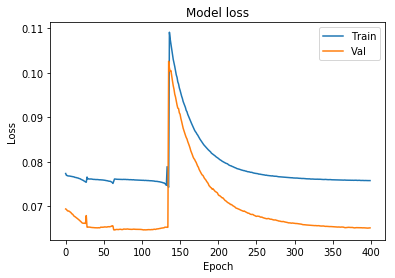

In [70]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [71]:
df_t2 = pd.read_excel(open('Cost_Sch-data.xlsx', 'rb'), sheet_name='Cost_T1')
df_t2.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Bohai Ming Zhu,8,5,2,2,1,4350,3,259,0.40,...,40000,1,2,1,30,1,1.0000,1,0.471042,0.25
1,Petrojarl Varg,5,1,1,1,1,2240,3,816,0.46,...,65833,2,2,1,84,1,0.8658,2,0.286765,0.24
2,Stybarrow Venture MV16,4,3,3,1,3,5922,3,702,0.60,...,87500,2,3,1,825,2,0.9143,4,-0.143875,0.27
3,Alima FPU,1,2,3,2,1,5720,3,994,1.13,...,100000,3,1,2,600,3,0.9000,4,-0.022133,0.35
4,Jangkrik,2,4,1,2,1,8824,3,1052,2.68,...,79400,2,2,2,120,2,0.0554,3,0.114068,0.17


In [72]:
dataset_t2 = df_t2.values
Xnew2 = dataset_t2[:,[1, 2, 4, 9, 10, 13, 14, 15, 16, 17, 18]]
print(Xnew2.shape)
print(Xnew2)

(103, 11)
[[8 5 2 ... 1 1.0 1]
 [5 1 1 ... 1 0.8658 2]
 [4 3 1 ... 2 0.9143 4]
 ...
 [6 4 2 ... 1 0.9474 5]
 [5 1 2 ... 2 0.8824 5]
 [2 5 2 ... 3 0.878 5]]


In [73]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew2)

In [74]:
ynew4 = model4.predict(Xnew_scale2)

In [75]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew4[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [8 5 2 2 1 4350 3 259 0.4 1 40000 1 2 1 30 1 1.0 1], ynew[0] = [0.25226635] 
Xnew[1] = [5 1 1 1 1 2240 3 816 0.46 1 65833 2 2 1 84 1 0.8658 2], ynew[1] = [0.2720744] 
Xnew[2] = [4 3 3 1 3 5922 3 702 0.6 1 87500 2 3 1 825 2 0.9143 4], ynew[2] = [0.3566062] 
Xnew[3] = [1 2 3 2 1 5720 3 994 1.13 1 100000 3 1 2 600 3 0.9 4], ynew[3] = [0.09340233] 
Xnew[4] = [2 4 1 2 1 8824 3 1052 2.68 1 79400 2 2 2 120 2 0.0554 3], ynew[4] = [0.24848878] 
Xnew[5] = [4 3 3 2 1 7814 3 2229 11.16 1 148333 6 5 6 250 1 0.236 5], ynew[5] = [0.3099137] 
Xnew[6] = [1 3 3 2 1 7534 3 1383 1.8 1 198333 4 2 1 1290 4 0.8067 5], ynew[6] = [0.09582549] 
Xnew[7] = [1 4 3 2 1 4872 3 1306 3.4 1 287000 6 3 1 1360 5 0.8362 2], ynew[7] = [0.14613965] 
Xnew[8] = [1 4 3 2 1 3103 3 823 2.5 1 246667 5 3 1 1350 1 0.8108 1], ynew[8] = [0.32962167] 
Xnew[9] = [1 3 3 2 1 4756 3 1071 0.76 1 316667 6 1 1 1250 5 0.7895 2], ynew[9] = [0.08788624] 
Xnew[10] = [1 4 3 1 1 5866 3 797 0.75 2

In [76]:
print(ynew4)
# create excel writer
# write dataframe to excel sheet named 'marks'
writer = pd.ExcelWriter('predict_cost.xlsx')
ynew4_df = pd.DataFrame (ynew4)
ynew4_df.to_excel(writer, '11')
# save the excel file
writer.save()

[[0.25226635]
 [0.2720744 ]
 [0.3566062 ]
 [0.09340233]
 [0.24848878]
 [0.3099137 ]
 [0.09582549]
 [0.14613965]
 [0.32962167]
 [0.08788624]
 [0.13536403]
 [0.13476074]
 [0.27922004]
 [0.373092  ]
 [0.0893828 ]
 [0.11965269]
 [0.21382922]
 [0.35679725]
 [0.3728534 ]
 [0.08596203]
 [0.30548579]
 [0.22445437]
 [0.29146776]
 [0.12542725]
 [0.27507612]
 [0.31299934]
 [0.32995722]
 [0.37158984]
 [0.3439435 ]
 [0.23924705]
 [0.29887742]
 [0.40530485]
 [0.3846444 ]
 [0.3526496 ]
 [0.23368958]
 [0.29493725]
 [0.27875108]
 [0.27572188]
 [0.31038666]
 [0.34965068]
 [0.25705457]
 [0.27544552]
 [0.14176086]
 [0.21991006]
 [0.29118925]
 [0.14281747]
 [0.26021132]
 [0.22615886]
 [0.18199036]
 [0.10176656]
 [0.22027835]
 [0.6775658 ]
 [0.29788375]
 [0.31320012]
 [0.11814585]
 [0.29308155]
 [0.04720512]
 [0.6088376 ]
 [0.16716829]
 [0.29065484]
 [0.23431674]
 [0.19096726]
 [0.29954457]
 [0.19315931]
 [0.08513182]
 [0.42109752]
 [0.11791393]
 [0.4200859 ]
 [0.09116751]
 [0.11365774]
 [0.320495  ]
 [0.47

7 Features:
Region
Local Content
Lease/ Own
Technology Novelty
Type Unit
Lessons Learned
FEED Detail

In [77]:
#Reduce features further as per pearson correlation
X = dataset[:,[1, 2, 4, 13, 14, 16, 18]]

In [78]:
Y = dataset[:,20]

In [79]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [80]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [81]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [82]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(67, 7) (15, 7) (15, 7) (67,) (15,) (15,)


In [83]:
for train, test in kfold.split(X_scale, Y):
# create model
	model6 = Sequential()
	model6.add(Dense(12, input_dim=7, activation='relu'))
	model6.add(Dense(8, activation='relu'))
	model6.add(Dense(1, activation='sigmoid'))
	# Compile model
	model6.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model6.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model6.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 16.09%
accuracy: 17.24%
accuracy: 18.39%
accuracy: 18.39%
accuracy: 16.09%
accuracy: 14.94%
accuracy: 14.94%
accuracy: 15.91%
accuracy: 18.18%
accuracy: 14.77%
16.50% (+/- 1.38%)


In [84]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model7 = Sequential([
        Dense(14, activation='sigmoid', input_shape=(7,)),
        Dense(7, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model7.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model7.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model7.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 6ms/step - loss: 0.0717 - accuracy: 0.1791 - val_loss: 0.0784 - val_accuracy: 0.0667
Epoch 2/400
67/67 [==============================] - 0s 267us/step - loss: 0.0714 - accuracy: 0.1791 - val_loss: 0.0780 - val_accuracy: 0.0667
Epoch 3/400
67/67 [==============================] - 0s 250us/step - loss: 0.0712 - accuracy: 0.1791 - val_loss: 0.0776 - val_accuracy: 0.0667
Epoch 4/400
67/67 [==============================] - 0s 281us/step - loss: 0.0710 - accuracy: 0.1791 - val_loss: 0.0773 - val_accuracy: 0.0667
Epoch 5/400
67/67 [==============================] - 0s 271us/step - loss: 0.0708 - accuracy: 0.1791 - val_loss: 0.0770 - val_accuracy: 0.0667
Epoch 6/400
67/67 [==============================] - 0s 259us/step - loss: 0.0706 - accuracy: 0.1791 - val_loss: 0.0767 - val_accuracy: 0.0667
Epoch 7/400
67/67 [==============================] - 0s 274us/step - loss: 0.0704 - accuracy: 0.1791

67/67 [==============================] - 0s 281us/step - loss: 0.0644 - accuracy: 0.1791 - val_loss: 0.0666 - val_accuracy: 0.0667
Epoch 58/400
67/67 [==============================] - 0s 258us/step - loss: 0.0643 - accuracy: 0.1791 - val_loss: 0.0665 - val_accuracy: 0.0667
Epoch 59/400
67/67 [==============================] - 0s 228us/step - loss: 0.0642 - accuracy: 0.1791 - val_loss: 0.0664 - val_accuracy: 0.0667
Epoch 60/400
67/67 [==============================] - 0s 265us/step - loss: 0.0642 - accuracy: 0.1791 - val_loss: 0.0663 - val_accuracy: 0.0667
Epoch 61/400
67/67 [==============================] - 0s 235us/step - loss: 0.0641 - accuracy: 0.1791 - val_loss: 0.0662 - val_accuracy: 0.0667
Epoch 62/400
67/67 [==============================] - 0s 239us/step - loss: 0.0640 - accuracy: 0.1791 - val_loss: 0.0661 - val_accuracy: 0.0667
Epoch 63/400
67/67 [==============================] - 0s 266us/step - loss: 0.0640 - accuracy: 0.1791 - val_loss: 0.0660 - val_accuracy: 0.0667
Epoch

Epoch 114/400
67/67 [==============================] - 0s 256us/step - loss: 0.0618 - accuracy: 0.1791 - val_loss: 0.0632 - val_accuracy: 0.0667
Epoch 115/400
67/67 [==============================] - 0s 323us/step - loss: 0.0618 - accuracy: 0.1791 - val_loss: 0.0632 - val_accuracy: 0.0667
Epoch 116/400
67/67 [==============================] - 0s 314us/step - loss: 0.0618 - accuracy: 0.1791 - val_loss: 0.0632 - val_accuracy: 0.0667
Epoch 117/400
67/67 [==============================] - 0s 338us/step - loss: 0.0617 - accuracy: 0.1791 - val_loss: 0.0632 - val_accuracy: 0.0667
Epoch 118/400
67/67 [==============================] - 0s 227us/step - loss: 0.0617 - accuracy: 0.1791 - val_loss: 0.0631 - val_accuracy: 0.0667
Epoch 119/400
67/67 [==============================] - 0s 245us/step - loss: 0.0616 - accuracy: 0.1791 - val_loss: 0.0631 - val_accuracy: 0.0667
Epoch 120/400
67/67 [==============================] - 0s 252us/step - loss: 0.0617 - accuracy: 0.1791 - val_loss: 0.0630 - val_ac

67/67 [==============================] - 0s 288us/step - loss: 0.0603 - accuracy: 0.1791 - val_loss: 0.0625 - val_accuracy: 0.0667
Epoch 171/400
67/67 [==============================] - 0s 296us/step - loss: 0.0603 - accuracy: 0.1791 - val_loss: 0.0625 - val_accuracy: 0.0667
Epoch 172/400
67/67 [==============================] - 0s 226us/step - loss: 0.0603 - accuracy: 0.1791 - val_loss: 0.0625 - val_accuracy: 0.0667
Epoch 173/400
67/67 [==============================] - 0s 224us/step - loss: 0.0602 - accuracy: 0.1791 - val_loss: 0.0625 - val_accuracy: 0.0667
Epoch 174/400
67/67 [==============================] - 0s 233us/step - loss: 0.0602 - accuracy: 0.1791 - val_loss: 0.0625 - val_accuracy: 0.0667
Epoch 175/400
67/67 [==============================] - 0s 248us/step - loss: 0.0602 - accuracy: 0.1791 - val_loss: 0.0625 - val_accuracy: 0.0667
Epoch 176/400
67/67 [==============================] - 0s 246us/step - loss: 0.0602 - accuracy: 0.1791 - val_loss: 0.0625 - val_accuracy: 0.0667

67/67 [==============================] - 0s 223us/step - loss: 0.0590 - accuracy: 0.1791 - val_loss: 0.0624 - val_accuracy: 0.0667
Epoch 227/400
67/67 [==============================] - 0s 226us/step - loss: 0.0590 - accuracy: 0.1791 - val_loss: 0.0624 - val_accuracy: 0.0667
Epoch 228/400
67/67 [==============================] - 0s 242us/step - loss: 0.0590 - accuracy: 0.1791 - val_loss: 0.0624 - val_accuracy: 0.0667
Epoch 229/400
67/67 [==============================] - 0s 226us/step - loss: 0.0589 - accuracy: 0.1791 - val_loss: 0.0624 - val_accuracy: 0.0667
Epoch 230/400
67/67 [==============================] - 0s 232us/step - loss: 0.0589 - accuracy: 0.1791 - val_loss: 0.0624 - val_accuracy: 0.0667
Epoch 231/400
67/67 [==============================] - 0s 221us/step - loss: 0.0589 - accuracy: 0.1791 - val_loss: 0.0624 - val_accuracy: 0.0667
Epoch 232/400
67/67 [==============================] - 0s 226us/step - loss: 0.0589 - accuracy: 0.1791 - val_loss: 0.0624 - val_accuracy: 0.0667

67/67 [==============================] - 0s 331us/step - loss: 0.0578 - accuracy: 0.1791 - val_loss: 0.0628 - val_accuracy: 0.0667
Epoch 283/400
67/67 [==============================] - 0s 256us/step - loss: 0.0578 - accuracy: 0.1791 - val_loss: 0.0628 - val_accuracy: 0.0667
Epoch 284/400
67/67 [==============================] - 0s 254us/step - loss: 0.0578 - accuracy: 0.1791 - val_loss: 0.0628 - val_accuracy: 0.0667
Epoch 285/400
67/67 [==============================] - 0s 254us/step - loss: 0.0577 - accuracy: 0.1791 - val_loss: 0.0628 - val_accuracy: 0.0667
Epoch 286/400
67/67 [==============================] - 0s 272us/step - loss: 0.0577 - accuracy: 0.1791 - val_loss: 0.0628 - val_accuracy: 0.0667
Epoch 287/400
67/67 [==============================] - 0s 268us/step - loss: 0.0577 - accuracy: 0.1791 - val_loss: 0.0628 - val_accuracy: 0.0667
Epoch 288/400
67/67 [==============================] - 0s 255us/step - loss: 0.0577 - accuracy: 0.1791 - val_loss: 0.0628 - val_accuracy: 0.0667

67/67 [==============================] - 0s 278us/step - loss: 0.0567 - accuracy: 0.1791 - val_loss: 0.0631 - val_accuracy: 0.0667
Epoch 339/400
67/67 [==============================] - 0s 275us/step - loss: 0.0566 - accuracy: 0.1791 - val_loss: 0.0632 - val_accuracy: 0.0667
Epoch 340/400
67/67 [==============================] - 0s 282us/step - loss: 0.0566 - accuracy: 0.1791 - val_loss: 0.0631 - val_accuracy: 0.0667
Epoch 341/400
67/67 [==============================] - 0s 310us/step - loss: 0.0566 - accuracy: 0.1791 - val_loss: 0.0631 - val_accuracy: 0.0667
Epoch 342/400
67/67 [==============================] - 0s 318us/step - loss: 0.0566 - accuracy: 0.1791 - val_loss: 0.0631 - val_accuracy: 0.0667
Epoch 343/400
67/67 [==============================] - 0s 386us/step - loss: 0.0565 - accuracy: 0.1791 - val_loss: 0.0631 - val_accuracy: 0.0667
Epoch 344/400
67/67 [==============================] - 0s 343us/step - loss: 0.0565 - accuracy: 0.1791 - val_loss: 0.0632 - val_accuracy: 0.0667

67/67 [==============================] - 0s 309us/step - loss: 0.0556 - accuracy: 0.1791 - val_loss: 0.0635 - val_accuracy: 0.0667
Epoch 395/400
67/67 [==============================] - 0s 269us/step - loss: 0.0555 - accuracy: 0.1791 - val_loss: 0.0635 - val_accuracy: 0.0667
Epoch 396/400
67/67 [==============================] - 0s 248us/step - loss: 0.0555 - accuracy: 0.1791 - val_loss: 0.0635 - val_accuracy: 0.0667
Epoch 397/400
67/67 [==============================] - 0s 303us/step - loss: 0.0555 - accuracy: 0.1791 - val_loss: 0.0635 - val_accuracy: 0.0667
Epoch 398/400
67/67 [==============================] - 0s 277us/step - loss: 0.0555 - accuracy: 0.1791 - val_loss: 0.0635 - val_accuracy: 0.0667
Epoch 399/400
67/67 [==============================] - 0s 316us/step - loss: 0.0555 - accuracy: 0.1791 - val_loss: 0.0635 - val_accuracy: 0.0667
Epoch 400/400
67/67 [==============================] - 0s 305us/step - loss: 0.0554 - accuracy: 0.1791 - val_loss: 0.0635 - val_accuracy: 0.0667

Epoch 50/400
67/67 [==============================] - 0s 282us/step - loss: 0.0811 - accuracy: 0.1791 - val_loss: 0.0720 - val_accuracy: 0.0667
Epoch 51/400
67/67 [==============================] - 0s 270us/step - loss: 0.0807 - accuracy: 0.1791 - val_loss: 0.0720 - val_accuracy: 0.0667
Epoch 52/400
67/67 [==============================] - 0s 286us/step - loss: 0.0803 - accuracy: 0.1791 - val_loss: 0.0719 - val_accuracy: 0.0667
Epoch 53/400
67/67 [==============================] - 0s 296us/step - loss: 0.0800 - accuracy: 0.1791 - val_loss: 0.0719 - val_accuracy: 0.0667
Epoch 54/400
67/67 [==============================] - 0s 304us/step - loss: 0.0795 - accuracy: 0.1791 - val_loss: 0.0719 - val_accuracy: 0.0667
Epoch 55/400
67/67 [==============================] - 0s 292us/step - loss: 0.0792 - accuracy: 0.1791 - val_loss: 0.0718 - val_accuracy: 0.0667
Epoch 56/400
67/67 [==============================] - 0s 283us/step - loss: 0.0788 - accuracy: 0.1791 - val_loss: 0.0718 - val_accuracy:

Epoch 107/400
67/67 [==============================] - 0s 308us/step - loss: 0.0730 - accuracy: 0.1791 - val_loss: 0.0737 - val_accuracy: 0.0667
Epoch 108/400
67/67 [==============================] - 0s 321us/step - loss: 0.0730 - accuracy: 0.1791 - val_loss: 0.0738 - val_accuracy: 0.0667
Epoch 109/400
67/67 [==============================] - 0s 290us/step - loss: 0.0730 - accuracy: 0.1791 - val_loss: 0.0738 - val_accuracy: 0.0667
Epoch 110/400
67/67 [==============================] - 0s 297us/step - loss: 0.0729 - accuracy: 0.1791 - val_loss: 0.0738 - val_accuracy: 0.0667
Epoch 111/400
67/67 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1791 - val_loss: 0.0738 - val_accuracy: 0.0667
Epoch 112/400
67/67 [==============================] - 0s 300us/step - loss: 0.0728 - accuracy: 0.1791 - val_loss: 0.0739 - val_accuracy: 0.0667
Epoch 113/400
67/67 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1791 - val_loss: 0.0739 - val_ac

67/67 [==============================] - 0s 225us/step - loss: 0.0716 - accuracy: 0.1791 - val_loss: 0.0745 - val_accuracy: 0.0667
Epoch 164/400
67/67 [==============================] - 0s 231us/step - loss: 0.0716 - accuracy: 0.1791 - val_loss: 0.0744 - val_accuracy: 0.0667
Epoch 165/400
67/67 [==============================] - 0s 218us/step - loss: 0.0715 - accuracy: 0.1791 - val_loss: 0.0744 - val_accuracy: 0.0667
Epoch 166/400
67/67 [==============================] - 0s 226us/step - loss: 0.0715 - accuracy: 0.1791 - val_loss: 0.0744 - val_accuracy: 0.0667
Epoch 167/400
67/67 [==============================] - 0s 251us/step - loss: 0.0715 - accuracy: 0.1791 - val_loss: 0.0744 - val_accuracy: 0.0667
Epoch 168/400
67/67 [==============================] - 0s 227us/step - loss: 0.0715 - accuracy: 0.1791 - val_loss: 0.0743 - val_accuracy: 0.0667
Epoch 169/400
67/67 [==============================] - 0s 231us/step - loss: 0.0715 - accuracy: 0.1791 - val_loss: 0.0743 - val_accuracy: 0.0667

67/67 [==============================] - 0s 229us/step - loss: 0.0707 - accuracy: 0.1791 - val_loss: 0.0742 - val_accuracy: 0.0667
Epoch 220/400
67/67 [==============================] - 0s 250us/step - loss: 0.0707 - accuracy: 0.1791 - val_loss: 0.0742 - val_accuracy: 0.0667
Epoch 221/400
67/67 [==============================] - 0s 251us/step - loss: 0.0707 - accuracy: 0.1791 - val_loss: 0.0742 - val_accuracy: 0.0667
Epoch 222/400
67/67 [==============================] - 0s 243us/step - loss: 0.0707 - accuracy: 0.1791 - val_loss: 0.0742 - val_accuracy: 0.0667
Epoch 223/400
67/67 [==============================] - 0s 234us/step - loss: 0.0706 - accuracy: 0.1791 - val_loss: 0.0741 - val_accuracy: 0.0667
Epoch 224/400
67/67 [==============================] - 0s 247us/step - loss: 0.0706 - accuracy: 0.1791 - val_loss: 0.0741 - val_accuracy: 0.0667
Epoch 225/400
67/67 [==============================] - 0s 233us/step - loss: 0.0706 - accuracy: 0.1791 - val_loss: 0.0740 - val_accuracy: 0.0667

67/67 [==============================] - 0s 299us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0735 - val_accuracy: 0.0667
Epoch 276/400
67/67 [==============================] - 0s 302us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0735 - val_accuracy: 0.0667
Epoch 277/400
67/67 [==============================] - 0s 303us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0735 - val_accuracy: 0.0667
Epoch 278/400
67/67 [==============================] - 0s 305us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0735 - val_accuracy: 0.0667
Epoch 279/400
67/67 [==============================] - 0s 346us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0736 - val_accuracy: 0.0667
Epoch 280/400
67/67 [==============================] - 0s 427us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0736 - val_accuracy: 0.0667
Epoch 281/400
67/67 [==============================] - 0s 334us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0736 - val_accuracy: 0.0667

67/67 [==============================] - 0s 268us/step - loss: 0.0695 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 332/400
67/67 [==============================] - 0s 226us/step - loss: 0.0695 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 333/400
67/67 [==============================] - 0s 227us/step - loss: 0.0695 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 334/400
67/67 [==============================] - 0s 315us/step - loss: 0.0695 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 335/400
67/67 [==============================] - 0s 255us/step - loss: 0.0695 - accuracy: 0.1791 - val_loss: 0.0729 - val_accuracy: 0.0667
Epoch 336/400
67/67 [==============================] - 0s 290us/step - loss: 0.0695 - accuracy: 0.1791 - val_loss: 0.0729 - val_accuracy: 0.0667
Epoch 337/400
67/67 [==============================] - 0s 274us/step - loss: 0.0695 - accuracy: 0.1791 - val_loss: 0.0729 - val_accuracy: 0.0667

67/67 [==============================] - 0s 280us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0726 - val_accuracy: 0.0667
Epoch 388/400
67/67 [==============================] - 0s 232us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0726 - val_accuracy: 0.0667
Epoch 389/400
67/67 [==============================] - 0s 245us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0726 - val_accuracy: 0.0667
Epoch 390/400
67/67 [==============================] - 0s 255us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0726 - val_accuracy: 0.0667
Epoch 391/400
67/67 [==============================] - 0s 231us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0726 - val_accuracy: 0.0667
Epoch 392/400
67/67 [==============================] - 0s 231us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0726 - val_accuracy: 0.0667
Epoch 393/400
67/67 [==============================] - 0s 311us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0725 - val_accuracy: 0.0667

Epoch 44/400
67/67 [==============================] - 0s 248us/step - loss: 0.0734 - accuracy: 0.1791 - val_loss: 0.0619 - val_accuracy: 0.0667
Epoch 45/400
67/67 [==============================] - 0s 242us/step - loss: 0.0731 - accuracy: 0.1791 - val_loss: 0.0620 - val_accuracy: 0.0667
Epoch 46/400
67/67 [==============================] - 0s 330us/step - loss: 0.0729 - accuracy: 0.1791 - val_loss: 0.0621 - val_accuracy: 0.0667
Epoch 47/400
67/67 [==============================] - 0s 323us/step - loss: 0.0727 - accuracy: 0.1791 - val_loss: 0.0621 - val_accuracy: 0.0667
Epoch 48/400
67/67 [==============================] - 0s 265us/step - loss: 0.0725 - accuracy: 0.1791 - val_loss: 0.0622 - val_accuracy: 0.0667
Epoch 49/400
67/67 [==============================] - 0s 296us/step - loss: 0.0723 - accuracy: 0.1791 - val_loss: 0.0623 - val_accuracy: 0.0667
Epoch 50/400
67/67 [==============================] - 0s 281us/step - loss: 0.0721 - accuracy: 0.1791 - val_loss: 0.0624 - val_accuracy:

Epoch 101/400
67/67 [==============================] - 0s 357us/step - loss: 0.0676 - accuracy: 0.1791 - val_loss: 0.0659 - val_accuracy: 0.0667
Epoch 102/400
67/67 [==============================] - 0s 340us/step - loss: 0.0676 - accuracy: 0.1791 - val_loss: 0.0659 - val_accuracy: 0.0667
Epoch 103/400
67/67 [==============================] - 0s 385us/step - loss: 0.0675 - accuracy: 0.1791 - val_loss: 0.0660 - val_accuracy: 0.0667
Epoch 104/400
67/67 [==============================] - 0s 515us/step - loss: 0.0675 - accuracy: 0.1791 - val_loss: 0.0660 - val_accuracy: 0.0667
Epoch 105/400
67/67 [==============================] - 0s 384us/step - loss: 0.0674 - accuracy: 0.1791 - val_loss: 0.0660 - val_accuracy: 0.0667
Epoch 106/400
67/67 [==============================] - 0s 433us/step - loss: 0.0674 - accuracy: 0.1791 - val_loss: 0.0660 - val_accuracy: 0.0667
Epoch 107/400
67/67 [==============================] - 0s 326us/step - loss: 0.0674 - accuracy: 0.1791 - val_loss: 0.0661 - val_ac

67/67 [==============================] - 0s 337us/step - loss: 0.0659 - accuracy: 0.1791 - val_loss: 0.0672 - val_accuracy: 0.0667
Epoch 158/400
67/67 [==============================] - 0s 329us/step - loss: 0.0659 - accuracy: 0.1791 - val_loss: 0.0672 - val_accuracy: 0.0667
Epoch 159/400
67/67 [==============================] - 0s 368us/step - loss: 0.0659 - accuracy: 0.1791 - val_loss: 0.0672 - val_accuracy: 0.0667
Epoch 160/400
67/67 [==============================] - 0s 430us/step - loss: 0.0659 - accuracy: 0.1791 - val_loss: 0.0673 - val_accuracy: 0.0667
Epoch 161/400
67/67 [==============================] - 0s 378us/step - loss: 0.0658 - accuracy: 0.1791 - val_loss: 0.0673 - val_accuracy: 0.0667
Epoch 162/400
67/67 [==============================] - 0s 355us/step - loss: 0.0658 - accuracy: 0.1791 - val_loss: 0.0673 - val_accuracy: 0.0667
Epoch 163/400
67/67 [==============================] - 0s 418us/step - loss: 0.0658 - accuracy: 0.1791 - val_loss: 0.0673 - val_accuracy: 0.0667

67/67 [==============================] - 0s 270us/step - loss: 0.0648 - accuracy: 0.1791 - val_loss: 0.0678 - val_accuracy: 0.0667
Epoch 214/400
67/67 [==============================] - 0s 279us/step - loss: 0.0648 - accuracy: 0.1791 - val_loss: 0.0679 - val_accuracy: 0.0667
Epoch 215/400
67/67 [==============================] - 0s 256us/step - loss: 0.0648 - accuracy: 0.1791 - val_loss: 0.0679 - val_accuracy: 0.0667
Epoch 216/400
67/67 [==============================] - 0s 240us/step - loss: 0.0648 - accuracy: 0.1791 - val_loss: 0.0679 - val_accuracy: 0.0667
Epoch 217/400
67/67 [==============================] - 0s 293us/step - loss: 0.0648 - accuracy: 0.1791 - val_loss: 0.0679 - val_accuracy: 0.0667
Epoch 218/400
67/67 [==============================] - 0s 274us/step - loss: 0.0648 - accuracy: 0.1791 - val_loss: 0.0679 - val_accuracy: 0.0667
Epoch 219/400
67/67 [==============================] - 0s 248us/step - loss: 0.0648 - accuracy: 0.1791 - val_loss: 0.0679 - val_accuracy: 0.0667

67/67 [==============================] - 0s 256us/step - loss: 0.0640 - accuracy: 0.1791 - val_loss: 0.0681 - val_accuracy: 0.0667
Epoch 270/400
67/67 [==============================] - 0s 294us/step - loss: 0.0640 - accuracy: 0.1791 - val_loss: 0.0681 - val_accuracy: 0.0667
Epoch 271/400
67/67 [==============================] - 0s 228us/step - loss: 0.0640 - accuracy: 0.1791 - val_loss: 0.0681 - val_accuracy: 0.0667
Epoch 272/400
67/67 [==============================] - 0s 259us/step - loss: 0.0639 - accuracy: 0.1791 - val_loss: 0.0681 - val_accuracy: 0.0667
Epoch 273/400
67/67 [==============================] - 0s 241us/step - loss: 0.0639 - accuracy: 0.1791 - val_loss: 0.0681 - val_accuracy: 0.0667
Epoch 274/400
67/67 [==============================] - 0s 260us/step - loss: 0.0639 - accuracy: 0.1791 - val_loss: 0.0681 - val_accuracy: 0.0667
Epoch 275/400
67/67 [==============================] - 0s 281us/step - loss: 0.0639 - accuracy: 0.1791 - val_loss: 0.0681 - val_accuracy: 0.0667

67/67 [==============================] - 0s 312us/step - loss: 0.0632 - accuracy: 0.1791 - val_loss: 0.0684 - val_accuracy: 0.0667
Epoch 326/400
67/67 [==============================] - 0s 362us/step - loss: 0.0632 - accuracy: 0.1791 - val_loss: 0.0684 - val_accuracy: 0.0667
Epoch 327/400
67/67 [==============================] - 0s 307us/step - loss: 0.0632 - accuracy: 0.1791 - val_loss: 0.0684 - val_accuracy: 0.0667
Epoch 328/400
67/67 [==============================] - 0s 339us/step - loss: 0.0632 - accuracy: 0.1791 - val_loss: 0.0684 - val_accuracy: 0.0667
Epoch 329/400
67/67 [==============================] - 0s 290us/step - loss: 0.0632 - accuracy: 0.1791 - val_loss: 0.0684 - val_accuracy: 0.0667
Epoch 330/400
67/67 [==============================] - 0s 342us/step - loss: 0.0632 - accuracy: 0.1791 - val_loss: 0.0684 - val_accuracy: 0.0667
Epoch 331/400
67/67 [==============================] - 0s 289us/step - loss: 0.0632 - accuracy: 0.1791 - val_loss: 0.0683 - val_accuracy: 0.0667

67/67 [==============================] - 0s 350us/step - loss: 0.0625 - accuracy: 0.1791 - val_loss: 0.0684 - val_accuracy: 0.0667
Epoch 382/400
67/67 [==============================] - 0s 450us/step - loss: 0.0625 - accuracy: 0.1791 - val_loss: 0.0684 - val_accuracy: 0.0667
Epoch 383/400
67/67 [==============================] - 0s 322us/step - loss: 0.0625 - accuracy: 0.1791 - val_loss: 0.0685 - val_accuracy: 0.0667
Epoch 384/400
67/67 [==============================] - 0s 337us/step - loss: 0.0625 - accuracy: 0.1791 - val_loss: 0.0685 - val_accuracy: 0.0667
Epoch 385/400
67/67 [==============================] - 0s 346us/step - loss: 0.0625 - accuracy: 0.1791 - val_loss: 0.0685 - val_accuracy: 0.0667
Epoch 386/400
67/67 [==============================] - 0s 363us/step - loss: 0.0624 - accuracy: 0.1791 - val_loss: 0.0685 - val_accuracy: 0.0667
Epoch 387/400
67/67 [==============================] - 0s 398us/step - loss: 0.0624 - accuracy: 0.1791 - val_loss: 0.0685 - val_accuracy: 0.0667

67/67 [==============================] - 0s 264us/step - loss: 0.0879 - accuracy: 0.1791 - val_loss: 0.0603 - val_accuracy: 0.0667
Epoch 38/400
67/67 [==============================] - 0s 305us/step - loss: 0.0869 - accuracy: 0.1791 - val_loss: 0.0601 - val_accuracy: 0.0667
Epoch 39/400
67/67 [==============================] - 0s 270us/step - loss: 0.0860 - accuracy: 0.1791 - val_loss: 0.0599 - val_accuracy: 0.0667
Epoch 40/400
67/67 [==============================] - 0s 235us/step - loss: 0.0850 - accuracy: 0.1791 - val_loss: 0.0598 - val_accuracy: 0.0667
Epoch 41/400
67/67 [==============================] - 0s 239us/step - loss: 0.0842 - accuracy: 0.1791 - val_loss: 0.0597 - val_accuracy: 0.0667
Epoch 42/400
67/67 [==============================] - 0s 261us/step - loss: 0.0834 - accuracy: 0.1791 - val_loss: 0.0596 - val_accuracy: 0.0667
Epoch 43/400
67/67 [==============================] - 0s 242us/step - loss: 0.0826 - accuracy: 0.1791 - val_loss: 0.0595 - val_accuracy: 0.0667
Epoch

Epoch 94/400
67/67 [==============================] - 0s 216us/step - loss: 0.0708 - accuracy: 0.1791 - val_loss: 0.0636 - val_accuracy: 0.0667
Epoch 95/400
67/67 [==============================] - 0s 230us/step - loss: 0.0708 - accuracy: 0.1791 - val_loss: 0.0637 - val_accuracy: 0.0667
Epoch 96/400
67/67 [==============================] - 0s 242us/step - loss: 0.0707 - accuracy: 0.1791 - val_loss: 0.0638 - val_accuracy: 0.0667
Epoch 97/400
67/67 [==============================] - 0s 238us/step - loss: 0.0706 - accuracy: 0.1791 - val_loss: 0.0639 - val_accuracy: 0.0667
Epoch 98/400
67/67 [==============================] - 0s 261us/step - loss: 0.0706 - accuracy: 0.1791 - val_loss: 0.0640 - val_accuracy: 0.0667
Epoch 99/400
67/67 [==============================] - 0s 258us/step - loss: 0.0705 - accuracy: 0.1791 - val_loss: 0.0640 - val_accuracy: 0.0667
Epoch 100/400
67/67 [==============================] - 0s 245us/step - loss: 0.0704 - accuracy: 0.1791 - val_loss: 0.0641 - val_accuracy

67/67 [==============================] - 0s 392us/step - loss: 0.0685 - accuracy: 0.1791 - val_loss: 0.0666 - val_accuracy: 0.0667
Epoch 151/400
67/67 [==============================] - 0s 286us/step - loss: 0.0685 - accuracy: 0.1791 - val_loss: 0.0666 - val_accuracy: 0.0667
Epoch 152/400
67/67 [==============================] - 0s 329us/step - loss: 0.0684 - accuracy: 0.1791 - val_loss: 0.0667 - val_accuracy: 0.0667
Epoch 153/400
67/67 [==============================] - 0s 354us/step - loss: 0.0684 - accuracy: 0.1791 - val_loss: 0.0667 - val_accuracy: 0.0667
Epoch 154/400
67/67 [==============================] - 0s 355us/step - loss: 0.0684 - accuracy: 0.1791 - val_loss: 0.0667 - val_accuracy: 0.0667
Epoch 155/400
67/67 [==============================] - 0s 382us/step - loss: 0.0684 - accuracy: 0.1791 - val_loss: 0.0666 - val_accuracy: 0.0667
Epoch 156/400
67/67 [==============================] - 0s 314us/step - loss: 0.0684 - accuracy: 0.1791 - val_loss: 0.0667 - val_accuracy: 0.0667

67/67 [==============================] - 0s 233us/step - loss: 0.0671 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 207/400
67/67 [==============================] - 0s 247us/step - loss: 0.0671 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 208/400
67/67 [==============================] - 0s 236us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 209/400
67/67 [==============================] - 0s 310us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 210/400
67/67 [==============================] - 0s 287us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 211/400
67/67 [==============================] - 0s 235us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 212/400
67/67 [==============================] - 0s 238us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667

67/67 [==============================] - 0s 238us/step - loss: 0.0659 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 263/400
67/67 [==============================] - 0s 231us/step - loss: 0.0658 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 264/400
67/67 [==============================] - 0s 280us/step - loss: 0.0658 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 265/400
67/67 [==============================] - 0s 229us/step - loss: 0.0658 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 266/400
67/67 [==============================] - 0s 242us/step - loss: 0.0658 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 267/400
67/67 [==============================] - 0s 253us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 268/400
67/67 [==============================] - 0s 243us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0675 - val_accuracy: 0.0667

67/67 [==============================] - 0s 292us/step - loss: 0.0647 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 319/400
67/67 [==============================] - 0s 327us/step - loss: 0.0646 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 320/400
67/67 [==============================] - 0s 279us/step - loss: 0.0646 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 321/400
67/67 [==============================] - 0s 319us/step - loss: 0.0646 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 322/400
67/67 [==============================] - 0s 319us/step - loss: 0.0646 - accuracy: 0.1791 - val_loss: 0.0677 - val_accuracy: 0.0667
Epoch 323/400
67/67 [==============================] - 0s 307us/step - loss: 0.0646 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 324/400
67/67 [==============================] - 0s 264us/step - loss: 0.0646 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667

67/67 [==============================] - 0s 315us/step - loss: 0.0636 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 375/400
67/67 [==============================] - 0s 294us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0675 - val_accuracy: 0.0667
Epoch 376/400
67/67 [==============================] - 0s 288us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0675 - val_accuracy: 0.0667
Epoch 377/400
67/67 [==============================] - 0s 247us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0675 - val_accuracy: 0.0667
Epoch 378/400
67/67 [==============================] - 0s 278us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 379/400
67/67 [==============================] - 0s 280us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667
Epoch 380/400
67/67 [==============================] - 0s 249us/step - loss: 0.0634 - accuracy: 0.1791 - val_loss: 0.0676 - val_accuracy: 0.0667

67/67 [==============================] - 0s 248us/step - loss: 0.0879 - accuracy: 0.1791 - val_loss: 0.0795 - val_accuracy: 0.0667
Epoch 31/400
67/67 [==============================] - 0s 253us/step - loss: 0.0872 - accuracy: 0.1791 - val_loss: 0.0795 - val_accuracy: 0.0667
Epoch 32/400
67/67 [==============================] - 0s 259us/step - loss: 0.0866 - accuracy: 0.1791 - val_loss: 0.0796 - val_accuracy: 0.0667
Epoch 33/400
67/67 [==============================] - 0s 250us/step - loss: 0.0860 - accuracy: 0.1791 - val_loss: 0.0796 - val_accuracy: 0.0667
Epoch 34/400
67/67 [==============================] - 0s 243us/step - loss: 0.0854 - accuracy: 0.1791 - val_loss: 0.0797 - val_accuracy: 0.0667
Epoch 35/400
67/67 [==============================] - 0s 291us/step - loss: 0.0848 - accuracy: 0.1791 - val_loss: 0.0797 - val_accuracy: 0.0667
Epoch 36/400
67/67 [==============================] - 0s 267us/step - loss: 0.0844 - accuracy: 0.1791 - val_loss: 0.0798 - val_accuracy: 0.0667
Epoch

Epoch 87/400
67/67 [==============================] - 0s 240us/step - loss: 0.0752 - accuracy: 0.1791 - val_loss: 0.0827 - val_accuracy: 0.0667
Epoch 88/400
67/67 [==============================] - 0s 223us/step - loss: 0.0752 - accuracy: 0.1791 - val_loss: 0.0827 - val_accuracy: 0.0667
Epoch 89/400
67/67 [==============================] - 0s 226us/step - loss: 0.0751 - accuracy: 0.1791 - val_loss: 0.0827 - val_accuracy: 0.0667
Epoch 90/400
67/67 [==============================] - 0s 256us/step - loss: 0.0750 - accuracy: 0.1791 - val_loss: 0.0828 - val_accuracy: 0.0667
Epoch 91/400
67/67 [==============================] - 0s 221us/step - loss: 0.0750 - accuracy: 0.1791 - val_loss: 0.0827 - val_accuracy: 0.0667
Epoch 92/400
67/67 [==============================] - 0s 230us/step - loss: 0.0750 - accuracy: 0.1791 - val_loss: 0.0827 - val_accuracy: 0.0667
Epoch 93/400
67/67 [==============================] - 0s 245us/step - loss: 0.0749 - accuracy: 0.1791 - val_loss: 0.0827 - val_accuracy:

67/67 [==============================] - 0s 230us/step - loss: 0.0728 - accuracy: 0.1791 - val_loss: 0.0823 - val_accuracy: 0.0667
Epoch 144/400
67/67 [==============================] - 0s 253us/step - loss: 0.0728 - accuracy: 0.1791 - val_loss: 0.0823 - val_accuracy: 0.0667
Epoch 145/400
67/67 [==============================] - 0s 235us/step - loss: 0.0727 - accuracy: 0.1791 - val_loss: 0.0822 - val_accuracy: 0.0667
Epoch 146/400
67/67 [==============================] - 0s 234us/step - loss: 0.0727 - accuracy: 0.1791 - val_loss: 0.0822 - val_accuracy: 0.0667
Epoch 147/400
67/67 [==============================] - 0s 240us/step - loss: 0.0727 - accuracy: 0.1791 - val_loss: 0.0822 - val_accuracy: 0.0667
Epoch 148/400
67/67 [==============================] - 0s 247us/step - loss: 0.0726 - accuracy: 0.1791 - val_loss: 0.0822 - val_accuracy: 0.0667
Epoch 149/400
67/67 [==============================] - 0s 224us/step - loss: 0.0726 - accuracy: 0.1791 - val_loss: 0.0822 - val_accuracy: 0.0667

67/67 [==============================] - 0s 223us/step - loss: 0.0713 - accuracy: 0.1791 - val_loss: 0.0813 - val_accuracy: 0.0667
Epoch 200/400
67/67 [==============================] - 0s 229us/step - loss: 0.0712 - accuracy: 0.1791 - val_loss: 0.0812 - val_accuracy: 0.0667
Epoch 201/400
67/67 [==============================] - 0s 221us/step - loss: 0.0712 - accuracy: 0.1791 - val_loss: 0.0812 - val_accuracy: 0.0667
Epoch 202/400
67/67 [==============================] - 0s 219us/step - loss: 0.0712 - accuracy: 0.1791 - val_loss: 0.0812 - val_accuracy: 0.0667
Epoch 203/400
67/67 [==============================] - 0s 234us/step - loss: 0.0712 - accuracy: 0.1791 - val_loss: 0.0812 - val_accuracy: 0.0667
Epoch 204/400
67/67 [==============================] - 0s 245us/step - loss: 0.0712 - accuracy: 0.1791 - val_loss: 0.0812 - val_accuracy: 0.0667
Epoch 205/400
67/67 [==============================] - 0s 279us/step - loss: 0.0711 - accuracy: 0.1791 - val_loss: 0.0812 - val_accuracy: 0.0667

67/67 [==============================] - 0s 230us/step - loss: 0.0701 - accuracy: 0.1791 - val_loss: 0.0799 - val_accuracy: 0.0667
Epoch 256/400
67/67 [==============================] - 0s 238us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0799 - val_accuracy: 0.0667
Epoch 257/400
67/67 [==============================] - 0s 257us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0799 - val_accuracy: 0.0667
Epoch 258/400
67/67 [==============================] - 0s 232us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0798 - val_accuracy: 0.0667
Epoch 259/400
67/67 [==============================] - 0s 230us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0798 - val_accuracy: 0.0667
Epoch 260/400
67/67 [==============================] - 0s 241us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0798 - val_accuracy: 0.0667
Epoch 261/400
67/67 [==============================] - 0s 236us/step - loss: 0.0699 - accuracy: 0.1791 - val_loss: 0.0798 - val_accuracy: 0.0667

67/67 [==============================] - 0s 327us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0789 - val_accuracy: 0.0667
Epoch 312/400
67/67 [==============================] - 0s 320us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0789 - val_accuracy: 0.0667
Epoch 313/400
67/67 [==============================] - 0s 255us/step - loss: 0.0690 - accuracy: 0.1791 - val_loss: 0.0789 - val_accuracy: 0.0667
Epoch 314/400
67/67 [==============================] - 0s 282us/step - loss: 0.0690 - accuracy: 0.1791 - val_loss: 0.0788 - val_accuracy: 0.0667
Epoch 315/400
67/67 [==============================] - 0s 243us/step - loss: 0.0690 - accuracy: 0.1791 - val_loss: 0.0788 - val_accuracy: 0.0667
Epoch 316/400
67/67 [==============================] - 0s 272us/step - loss: 0.0690 - accuracy: 0.1791 - val_loss: 0.0788 - val_accuracy: 0.0667
Epoch 317/400
67/67 [==============================] - 0s 256us/step - loss: 0.0690 - accuracy: 0.1791 - val_loss: 0.0788 - val_accuracy: 0.0667

67/67 [==============================] - 0s 235us/step - loss: 0.0682 - accuracy: 0.1791 - val_loss: 0.0779 - val_accuracy: 0.0667
Epoch 368/400
67/67 [==============================] - 0s 233us/step - loss: 0.0682 - accuracy: 0.1791 - val_loss: 0.0779 - val_accuracy: 0.0667
Epoch 369/400
67/67 [==============================] - 0s 225us/step - loss: 0.0681 - accuracy: 0.1791 - val_loss: 0.0778 - val_accuracy: 0.0667
Epoch 370/400
67/67 [==============================] - 0s 214us/step - loss: 0.0681 - accuracy: 0.1791 - val_loss: 0.0778 - val_accuracy: 0.0667
Epoch 371/400
67/67 [==============================] - 0s 240us/step - loss: 0.0681 - accuracy: 0.1791 - val_loss: 0.0778 - val_accuracy: 0.0667
Epoch 372/400
67/67 [==============================] - 0s 261us/step - loss: 0.0681 - accuracy: 0.1791 - val_loss: 0.0778 - val_accuracy: 0.0667
Epoch 373/400
67/67 [==============================] - 0s 246us/step - loss: 0.0681 - accuracy: 0.1791 - val_loss: 0.0778 - val_accuracy: 0.0667

Epoch 23/400
67/67 [==============================] - 0s 239us/step - loss: 0.0850 - accuracy: 0.1791 - val_loss: 0.0810 - val_accuracy: 0.0667
Epoch 24/400
67/67 [==============================] - 0s 226us/step - loss: 0.0842 - accuracy: 0.1791 - val_loss: 0.0806 - val_accuracy: 0.0667
Epoch 25/400
67/67 [==============================] - 0s 239us/step - loss: 0.0835 - accuracy: 0.1791 - val_loss: 0.0803 - val_accuracy: 0.0667
Epoch 26/400
67/67 [==============================] - 0s 246us/step - loss: 0.0827 - accuracy: 0.1791 - val_loss: 0.0800 - val_accuracy: 0.0667
Epoch 27/400
67/67 [==============================] - 0s 237us/step - loss: 0.0820 - accuracy: 0.1791 - val_loss: 0.0798 - val_accuracy: 0.0667
Epoch 28/400
67/67 [==============================] - 0s 246us/step - loss: 0.0814 - accuracy: 0.1791 - val_loss: 0.0795 - val_accuracy: 0.0667
Epoch 29/400
67/67 [==============================] - 0s 231us/step - loss: 0.0808 - accuracy: 0.1791 - val_loss: 0.0794 - val_accuracy:

67/67 [==============================] - 0s 230us/step - loss: 0.0724 - accuracy: 0.1791 - val_loss: 0.0781 - val_accuracy: 0.0667
Epoch 80/400
67/67 [==============================] - 0s 219us/step - loss: 0.0724 - accuracy: 0.1791 - val_loss: 0.0781 - val_accuracy: 0.0667
Epoch 81/400
67/67 [==============================] - 0s 214us/step - loss: 0.0723 - accuracy: 0.1791 - val_loss: 0.0780 - val_accuracy: 0.0667
Epoch 82/400
67/67 [==============================] - 0s 222us/step - loss: 0.0723 - accuracy: 0.1791 - val_loss: 0.0781 - val_accuracy: 0.0667
Epoch 83/400
67/67 [==============================] - 0s 222us/step - loss: 0.0722 - accuracy: 0.1791 - val_loss: 0.0781 - val_accuracy: 0.0667
Epoch 84/400
67/67 [==============================] - 0s 234us/step - loss: 0.0722 - accuracy: 0.1791 - val_loss: 0.0781 - val_accuracy: 0.0667
Epoch 85/400
67/67 [==============================] - 0s 226us/step - loss: 0.0722 - accuracy: 0.1791 - val_loss: 0.0781 - val_accuracy: 0.0667
Epoch

Epoch 136/400
67/67 [==============================] - 0s 297us/step - loss: 0.0709 - accuracy: 0.1791 - val_loss: 0.0776 - val_accuracy: 0.0667
Epoch 137/400
67/67 [==============================] - 0s 278us/step - loss: 0.0709 - accuracy: 0.1791 - val_loss: 0.0776 - val_accuracy: 0.0667
Epoch 138/400
67/67 [==============================] - 0s 283us/step - loss: 0.0709 - accuracy: 0.1791 - val_loss: 0.0776 - val_accuracy: 0.0667
Epoch 139/400
67/67 [==============================] - 0s 280us/step - loss: 0.0709 - accuracy: 0.1791 - val_loss: 0.0776 - val_accuracy: 0.0667
Epoch 140/400
67/67 [==============================] - 0s 278us/step - loss: 0.0708 - accuracy: 0.1791 - val_loss: 0.0776 - val_accuracy: 0.0667
Epoch 141/400
67/67 [==============================] - 0s 283us/step - loss: 0.0708 - accuracy: 0.1791 - val_loss: 0.0776 - val_accuracy: 0.0667
Epoch 142/400
67/67 [==============================] - 0s 264us/step - loss: 0.0708 - accuracy: 0.1791 - val_loss: 0.0775 - val_ac

67/67 [==============================] - 0s 310us/step - loss: 0.0701 - accuracy: 0.1791 - val_loss: 0.0768 - val_accuracy: 0.0667
Epoch 193/400
67/67 [==============================] - 0s 326us/step - loss: 0.0701 - accuracy: 0.1791 - val_loss: 0.0768 - val_accuracy: 0.0667
Epoch 194/400
67/67 [==============================] - 0s 322us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0767 - val_accuracy: 0.0667
Epoch 195/400
67/67 [==============================] - 0s 342us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0767 - val_accuracy: 0.0667
Epoch 196/400
67/67 [==============================] - 0s 328us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0767 - val_accuracy: 0.0667
Epoch 197/400
67/67 [==============================] - 0s 307us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0767 - val_accuracy: 0.0667
Epoch 198/400
67/67 [==============================] - 0s 317us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0767 - val_accuracy: 0.0667

67/67 [==============================] - 0s 305us/step - loss: 0.0694 - accuracy: 0.1791 - val_loss: 0.0759 - val_accuracy: 0.0667
Epoch 249/400
67/67 [==============================] - 0s 253us/step - loss: 0.0694 - accuracy: 0.1791 - val_loss: 0.0759 - val_accuracy: 0.0667
Epoch 250/400
67/67 [==============================] - 0s 308us/step - loss: 0.0693 - accuracy: 0.1791 - val_loss: 0.0759 - val_accuracy: 0.0667
Epoch 251/400
67/67 [==============================] - 0s 253us/step - loss: 0.0694 - accuracy: 0.1791 - val_loss: 0.0758 - val_accuracy: 0.0667
Epoch 252/400
67/67 [==============================] - 0s 260us/step - loss: 0.0693 - accuracy: 0.1791 - val_loss: 0.0758 - val_accuracy: 0.0667
Epoch 253/400
67/67 [==============================] - 0s 270us/step - loss: 0.0693 - accuracy: 0.1791 - val_loss: 0.0758 - val_accuracy: 0.0667
Epoch 254/400
67/67 [==============================] - 0s 295us/step - loss: 0.0693 - accuracy: 0.1791 - val_loss: 0.0757 - val_accuracy: 0.0667

67/67 [==============================] - 0s 256us/step - loss: 0.0688 - accuracy: 0.1791 - val_loss: 0.0753 - val_accuracy: 0.0667
Epoch 305/400
67/67 [==============================] - 0s 258us/step - loss: 0.0688 - accuracy: 0.1791 - val_loss: 0.0753 - val_accuracy: 0.0667
Epoch 306/400
67/67 [==============================] - 0s 239us/step - loss: 0.0688 - accuracy: 0.1791 - val_loss: 0.0753 - val_accuracy: 0.0667
Epoch 307/400
67/67 [==============================] - 0s 235us/step - loss: 0.0688 - accuracy: 0.1791 - val_loss: 0.0753 - val_accuracy: 0.0667
Epoch 308/400
67/67 [==============================] - 0s 235us/step - loss: 0.0688 - accuracy: 0.1791 - val_loss: 0.0753 - val_accuracy: 0.0667
Epoch 309/400
67/67 [==============================] - 0s 261us/step - loss: 0.0688 - accuracy: 0.1791 - val_loss: 0.0753 - val_accuracy: 0.0667
Epoch 310/400
67/67 [==============================] - 0s 267us/step - loss: 0.0687 - accuracy: 0.1791 - val_loss: 0.0752 - val_accuracy: 0.0667

67/67 [==============================] - 0s 303us/step - loss: 0.0683 - accuracy: 0.1791 - val_loss: 0.0747 - val_accuracy: 0.0667
Epoch 361/400
67/67 [==============================] - 0s 296us/step - loss: 0.0683 - accuracy: 0.1791 - val_loss: 0.0747 - val_accuracy: 0.0667
Epoch 362/400
67/67 [==============================] - 0s 264us/step - loss: 0.0683 - accuracy: 0.1791 - val_loss: 0.0747 - val_accuracy: 0.0667
Epoch 363/400
67/67 [==============================] - 0s 257us/step - loss: 0.0683 - accuracy: 0.1791 - val_loss: 0.0746 - val_accuracy: 0.0667
Epoch 364/400
67/67 [==============================] - 0s 280us/step - loss: 0.0683 - accuracy: 0.1791 - val_loss: 0.0746 - val_accuracy: 0.0667
Epoch 365/400
67/67 [==============================] - 0s 252us/step - loss: 0.0683 - accuracy: 0.1791 - val_loss: 0.0746 - val_accuracy: 0.0667
Epoch 366/400
67/67 [==============================] - 0s 272us/step - loss: 0.0683 - accuracy: 0.1791 - val_loss: 0.0747 - val_accuracy: 0.0667

67/67 [==============================] - 0s 254us/step - loss: 0.1020 - accuracy: 0.1791 - val_loss: 0.0655 - val_accuracy: 0.0667
Epoch 17/400
67/67 [==============================] - 0s 245us/step - loss: 0.0998 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667
Epoch 18/400
67/67 [==============================] - 0s 220us/step - loss: 0.0980 - accuracy: 0.1791 - val_loss: 0.0633 - val_accuracy: 0.0667
Epoch 19/400
67/67 [==============================] - 0s 246us/step - loss: 0.0958 - accuracy: 0.1791 - val_loss: 0.0622 - val_accuracy: 0.0667
Epoch 20/400
67/67 [==============================] - 0s 257us/step - loss: 0.0937 - accuracy: 0.1791 - val_loss: 0.0613 - val_accuracy: 0.0667
Epoch 21/400
67/67 [==============================] - 0s 240us/step - loss: 0.0920 - accuracy: 0.1791 - val_loss: 0.0605 - val_accuracy: 0.0667
Epoch 22/400
67/67 [==============================] - 0s 257us/step - loss: 0.0903 - accuracy: 0.1791 - val_loss: 0.0598 - val_accuracy: 0.0667
Epoch

Epoch 73/400
67/67 [==============================] - 0s 285us/step - loss: 0.0694 - accuracy: 0.1791 - val_loss: 0.0602 - val_accuracy: 0.0667
Epoch 74/400
67/67 [==============================] - 0s 286us/step - loss: 0.0694 - accuracy: 0.1791 - val_loss: 0.0603 - val_accuracy: 0.0667
Epoch 75/400
67/67 [==============================] - 0s 314us/step - loss: 0.0693 - accuracy: 0.1791 - val_loss: 0.0603 - val_accuracy: 0.0667
Epoch 76/400
67/67 [==============================] - 0s 275us/step - loss: 0.0693 - accuracy: 0.1791 - val_loss: 0.0604 - val_accuracy: 0.0667
Epoch 77/400
67/67 [==============================] - 0s 253us/step - loss: 0.0692 - accuracy: 0.1791 - val_loss: 0.0606 - val_accuracy: 0.0667
Epoch 78/400
67/67 [==============================] - 0s 256us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0607 - val_accuracy: 0.0667
Epoch 79/400
67/67 [==============================] - 0s 270us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0608 - val_accuracy:

Epoch 130/400
67/67 [==============================] - 0s 255us/step - loss: 0.0678 - accuracy: 0.1791 - val_loss: 0.0637 - val_accuracy: 0.0667
Epoch 131/400
67/67 [==============================] - 0s 244us/step - loss: 0.0678 - accuracy: 0.1791 - val_loss: 0.0638 - val_accuracy: 0.0667
Epoch 132/400
67/67 [==============================] - 0s 230us/step - loss: 0.0678 - accuracy: 0.1791 - val_loss: 0.0638 - val_accuracy: 0.0667
Epoch 133/400
67/67 [==============================] - 0s 225us/step - loss: 0.0678 - accuracy: 0.1791 - val_loss: 0.0638 - val_accuracy: 0.0667
Epoch 134/400
67/67 [==============================] - 0s 236us/step - loss: 0.0678 - accuracy: 0.1791 - val_loss: 0.0639 - val_accuracy: 0.0667
Epoch 135/400
67/67 [==============================] - 0s 222us/step - loss: 0.0678 - accuracy: 0.1791 - val_loss: 0.0639 - val_accuracy: 0.0667
Epoch 136/400
67/67 [==============================] - 0s 232us/step - loss: 0.0678 - accuracy: 0.1791 - val_loss: 0.0639 - val_ac

67/67 [==============================] - 0s 321us/step - loss: 0.0671 - accuracy: 0.1791 - val_loss: 0.0645 - val_accuracy: 0.0667
Epoch 187/400
67/67 [==============================] - 0s 308us/step - loss: 0.0671 - accuracy: 0.1791 - val_loss: 0.0645 - val_accuracy: 0.0667
Epoch 188/400
67/67 [==============================] - 0s 297us/step - loss: 0.0671 - accuracy: 0.1791 - val_loss: 0.0645 - val_accuracy: 0.0667
Epoch 189/400
67/67 [==============================] - 0s 291us/step - loss: 0.0671 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667
Epoch 190/400
67/67 [==============================] - 0s 401us/step - loss: 0.0671 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667
Epoch 191/400
67/67 [==============================] - 0s 293us/step - loss: 0.0671 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667
Epoch 192/400
67/67 [==============================] - 0s 273us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667

67/67 [==============================] - 0s 253us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667
Epoch 243/400
67/67 [==============================] - 0s 345us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0647 - val_accuracy: 0.0667
Epoch 244/400
67/67 [==============================] - 0s 294us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0647 - val_accuracy: 0.0667
Epoch 245/400
67/67 [==============================] - 0s 322us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667
Epoch 246/400
67/67 [==============================] - 0s 273us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0647 - val_accuracy: 0.0667
Epoch 247/400
67/67 [==============================] - 0s 318us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667
Epoch 248/400
67/67 [==============================] - 0s 319us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667

67/67 [==============================] - 0s 231us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0647 - val_accuracy: 0.0667
Epoch 299/400
67/67 [==============================] - 0s 232us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0647 - val_accuracy: 0.0667
Epoch 300/400
67/67 [==============================] - 0s 225us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0647 - val_accuracy: 0.0667
Epoch 301/400
67/67 [==============================] - 0s 238us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667
Epoch 302/400
67/67 [==============================] - 0s 232us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0647 - val_accuracy: 0.0667
Epoch 303/400
67/67 [==============================] - 0s 237us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0647 - val_accuracy: 0.0667
Epoch 304/400
67/67 [==============================] - 0s 229us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0646 - val_accuracy: 0.0667

67/67 [==============================] - 0s 301us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0644 - val_accuracy: 0.0667
Epoch 355/400
67/67 [==============================] - 0s 405us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0645 - val_accuracy: 0.0667
Epoch 356/400
67/67 [==============================] - 0s 303us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0644 - val_accuracy: 0.0667
Epoch 357/400
67/67 [==============================] - 0s 301us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0644 - val_accuracy: 0.0667
Epoch 358/400
67/67 [==============================] - 0s 283us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0644 - val_accuracy: 0.0667
Epoch 359/400
67/67 [==============================] - 0s 280us/step - loss: 0.0649 - accuracy: 0.1791 - val_loss: 0.0644 - val_accuracy: 0.0667
Epoch 360/400
67/67 [==============================] - 0s 248us/step - loss: 0.0649 - accuracy: 0.1791 - val_loss: 0.0644 - val_accuracy: 0.0667

67/67 [==============================] - 0s 245us/step - loss: 0.0858 - accuracy: 0.1791 - val_loss: 0.0746 - val_accuracy: 0.0667
Epoch 11/400
67/67 [==============================] - 0s 239us/step - loss: 0.0847 - accuracy: 0.1791 - val_loss: 0.0740 - val_accuracy: 0.0667
Epoch 12/400
67/67 [==============================] - 0s 240us/step - loss: 0.0836 - accuracy: 0.1791 - val_loss: 0.0735 - val_accuracy: 0.0667
Epoch 13/400
67/67 [==============================] - 0s 240us/step - loss: 0.0826 - accuracy: 0.1791 - val_loss: 0.0729 - val_accuracy: 0.0667
Epoch 14/400
67/67 [==============================] - 0s 243us/step - loss: 0.0815 - accuracy: 0.1791 - val_loss: 0.0724 - val_accuracy: 0.0667
Epoch 15/400
67/67 [==============================] - 0s 348us/step - loss: 0.0805 - accuracy: 0.1791 - val_loss: 0.0721 - val_accuracy: 0.0667
Epoch 16/400
67/67 [==============================] - 0s 341us/step - loss: 0.0798 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch

Epoch 67/400
67/67 [==============================] - 0s 289us/step - loss: 0.0669 - accuracy: 0.1791 - val_loss: 0.0698 - val_accuracy: 0.0667
Epoch 68/400
67/67 [==============================] - 0s 327us/step - loss: 0.0669 - accuracy: 0.1791 - val_loss: 0.0698 - val_accuracy: 0.0667
Epoch 69/400
67/67 [==============================] - 0s 360us/step - loss: 0.0668 - accuracy: 0.1791 - val_loss: 0.0698 - val_accuracy: 0.0667
Epoch 70/400
67/67 [==============================] - 0s 285us/step - loss: 0.0668 - accuracy: 0.1791 - val_loss: 0.0699 - val_accuracy: 0.0667
Epoch 71/400
67/67 [==============================] - 0s 329us/step - loss: 0.0667 - accuracy: 0.1791 - val_loss: 0.0699 - val_accuracy: 0.0667
Epoch 72/400
67/67 [==============================] - 0s 347us/step - loss: 0.0667 - accuracy: 0.1791 - val_loss: 0.0699 - val_accuracy: 0.0667
Epoch 73/400
67/67 [==============================] - 0s 303us/step - loss: 0.0666 - accuracy: 0.1791 - val_loss: 0.0699 - val_accuracy:

Epoch 124/400
67/67 [==============================] - 0s 252us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0708 - val_accuracy: 0.0667
Epoch 125/400
67/67 [==============================] - 0s 248us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0708 - val_accuracy: 0.0667
Epoch 126/400
67/67 [==============================] - 0s 249us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0708 - val_accuracy: 0.0667
Epoch 127/400
67/67 [==============================] - 0s 244us/step - loss: 0.0650 - accuracy: 0.1791 - val_loss: 0.0708 - val_accuracy: 0.0667
Epoch 128/400
67/67 [==============================] - 0s 257us/step - loss: 0.0649 - accuracy: 0.1791 - val_loss: 0.0708 - val_accuracy: 0.0667
Epoch 129/400
67/67 [==============================] - 0s 245us/step - loss: 0.0649 - accuracy: 0.1791 - val_loss: 0.0708 - val_accuracy: 0.0667
Epoch 130/400
67/67 [==============================] - 0s 243us/step - loss: 0.0649 - accuracy: 0.1791 - val_loss: 0.0708 - val_ac

67/67 [==============================] - 0s 286us/step - loss: 0.0639 - accuracy: 0.1791 - val_loss: 0.0706 - val_accuracy: 0.0667
Epoch 181/400
67/67 [==============================] - 0s 279us/step - loss: 0.0639 - accuracy: 0.1791 - val_loss: 0.0706 - val_accuracy: 0.0667
Epoch 182/400
67/67 [==============================] - 0s 325us/step - loss: 0.0639 - accuracy: 0.1791 - val_loss: 0.0706 - val_accuracy: 0.0667
Epoch 183/400
67/67 [==============================] - 0s 267us/step - loss: 0.0638 - accuracy: 0.1791 - val_loss: 0.0706 - val_accuracy: 0.0667
Epoch 184/400
67/67 [==============================] - 0s 264us/step - loss: 0.0638 - accuracy: 0.1791 - val_loss: 0.0706 - val_accuracy: 0.0667
Epoch 185/400
67/67 [==============================] - 0s 281us/step - loss: 0.0638 - accuracy: 0.1791 - val_loss: 0.0706 - val_accuracy: 0.0667
Epoch 186/400
67/67 [==============================] - 0s 249us/step - loss: 0.0638 - accuracy: 0.1791 - val_loss: 0.0706 - val_accuracy: 0.0667

67/67 [==============================] - 0s 263us/step - loss: 0.0629 - accuracy: 0.1791 - val_loss: 0.0703 - val_accuracy: 0.0667
Epoch 237/400
67/67 [==============================] - 0s 248us/step - loss: 0.0629 - accuracy: 0.1791 - val_loss: 0.0703 - val_accuracy: 0.0667
Epoch 238/400
67/67 [==============================] - 0s 256us/step - loss: 0.0629 - accuracy: 0.1791 - val_loss: 0.0703 - val_accuracy: 0.0667
Epoch 239/400
67/67 [==============================] - 0s 256us/step - loss: 0.0629 - accuracy: 0.1791 - val_loss: 0.0703 - val_accuracy: 0.0667
Epoch 240/400
67/67 [==============================] - 0s 272us/step - loss: 0.0628 - accuracy: 0.1791 - val_loss: 0.0703 - val_accuracy: 0.0667
Epoch 241/400
67/67 [==============================] - 0s 244us/step - loss: 0.0628 - accuracy: 0.1791 - val_loss: 0.0703 - val_accuracy: 0.0667
Epoch 242/400
67/67 [==============================] - 0s 245us/step - loss: 0.0628 - accuracy: 0.1791 - val_loss: 0.0702 - val_accuracy: 0.0667

67/67 [==============================] - 0s 234us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0697 - val_accuracy: 0.0667
Epoch 293/400
67/67 [==============================] - 0s 235us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0697 - val_accuracy: 0.0667
Epoch 294/400
67/67 [==============================] - 0s 261us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0696 - val_accuracy: 0.0667
Epoch 295/400
67/67 [==============================] - 0s 247us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0697 - val_accuracy: 0.0667
Epoch 296/400
67/67 [==============================] - 0s 255us/step - loss: 0.0619 - accuracy: 0.1791 - val_loss: 0.0696 - val_accuracy: 0.0667
Epoch 297/400
67/67 [==============================] - 0s 249us/step - loss: 0.0619 - accuracy: 0.1791 - val_loss: 0.0696 - val_accuracy: 0.0667
Epoch 298/400
67/67 [==============================] - 0s 238us/step - loss: 0.0619 - accuracy: 0.1791 - val_loss: 0.0697 - val_accuracy: 0.0667

67/67 [==============================] - 0s 235us/step - loss: 0.0611 - accuracy: 0.1791 - val_loss: 0.0694 - val_accuracy: 0.0667
Epoch 349/400
67/67 [==============================] - 0s 250us/step - loss: 0.0611 - accuracy: 0.1791 - val_loss: 0.0693 - val_accuracy: 0.0667
Epoch 350/400
67/67 [==============================] - 0s 254us/step - loss: 0.0611 - accuracy: 0.1791 - val_loss: 0.0694 - val_accuracy: 0.0667
Epoch 351/400
67/67 [==============================] - 0s 280us/step - loss: 0.0611 - accuracy: 0.1791 - val_loss: 0.0693 - val_accuracy: 0.0667
Epoch 352/400
67/67 [==============================] - 0s 251us/step - loss: 0.0611 - accuracy: 0.1791 - val_loss: 0.0693 - val_accuracy: 0.0667
Epoch 353/400
67/67 [==============================] - 0s 252us/step - loss: 0.0611 - accuracy: 0.1791 - val_loss: 0.0693 - val_accuracy: 0.0667
Epoch 354/400
67/67 [==============================] - 0s 292us/step - loss: 0.0610 - accuracy: 0.1791 - val_loss: 0.0693 - val_accuracy: 0.0667

67/67 [==============================] - 0s 282us/step - loss: 0.2723 - accuracy: 0.0000e+00 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 5/400
67/67 [==============================] - 0s 279us/step - loss: 0.2600 - accuracy: 0.0000e+00 - val_loss: 0.2196 - val_accuracy: 0.0000e+00
Epoch 6/400
67/67 [==============================] - 0s 243us/step - loss: 0.2482 - accuracy: 0.0000e+00 - val_loss: 0.2102 - val_accuracy: 0.0000e+00
Epoch 7/400
67/67 [==============================] - 0s 248us/step - loss: 0.2363 - accuracy: 0.0000e+00 - val_loss: 0.2010 - val_accuracy: 0.0000e+00
Epoch 8/400
67/67 [==============================] - 0s 265us/step - loss: 0.2248 - accuracy: 0.0149 - val_loss: 0.1922 - val_accuracy: 0.0000e+00
Epoch 9/400
67/67 [==============================] - 0s 253us/step - loss: 0.2139 - accuracy: 0.0448 - val_loss: 0.1842 - val_accuracy: 0.0000e+00
Epoch 10/400
67/67 [==============================] - 0s 245us/step - loss: 0.2040 - accuracy: 0.0597 - val_loss: 

67/67 [==============================] - 0s 238us/step - loss: 0.0701 - accuracy: 0.1791 - val_loss: 0.0732 - val_accuracy: 0.0667
Epoch 61/400
67/67 [==============================] - 0s 234us/step - loss: 0.0699 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 62/400
67/67 [==============================] - 0s 246us/step - loss: 0.0695 - accuracy: 0.1791 - val_loss: 0.0729 - val_accuracy: 0.0667
Epoch 63/400
67/67 [==============================] - 0s 239us/step - loss: 0.0693 - accuracy: 0.1791 - val_loss: 0.0728 - val_accuracy: 0.0667
Epoch 64/400
67/67 [==============================] - 0s 240us/step - loss: 0.0691 - accuracy: 0.1791 - val_loss: 0.0727 - val_accuracy: 0.0667
Epoch 65/400
67/67 [==============================] - 0s 240us/step - loss: 0.0688 - accuracy: 0.1791 - val_loss: 0.0726 - val_accuracy: 0.0667
Epoch 66/400
67/67 [==============================] - 0s 240us/step - loss: 0.0686 - accuracy: 0.1791 - val_loss: 0.0725 - val_accuracy: 0.0667
Epoch

Epoch 117/400
67/67 [==============================] - 0s 358us/step - loss: 0.0645 - accuracy: 0.1791 - val_loss: 0.0725 - val_accuracy: 0.0667
Epoch 118/400
67/67 [==============================] - 0s 356us/step - loss: 0.0645 - accuracy: 0.1791 - val_loss: 0.0725 - val_accuracy: 0.0667
Epoch 119/400
67/67 [==============================] - 0s 324us/step - loss: 0.0645 - accuracy: 0.1791 - val_loss: 0.0725 - val_accuracy: 0.0667
Epoch 120/400
67/67 [==============================] - 0s 402us/step - loss: 0.0644 - accuracy: 0.1791 - val_loss: 0.0725 - val_accuracy: 0.0667
Epoch 121/400
67/67 [==============================] - 0s 317us/step - loss: 0.0644 - accuracy: 0.1791 - val_loss: 0.0725 - val_accuracy: 0.0667
Epoch 122/400
67/67 [==============================] - 0s 292us/step - loss: 0.0644 - accuracy: 0.1791 - val_loss: 0.0725 - val_accuracy: 0.0667
Epoch 123/400
67/67 [==============================] - 0s 335us/step - loss: 0.0644 - accuracy: 0.1791 - val_loss: 0.0725 - val_ac

67/67 [==============================] - 0s 260us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0732 - val_accuracy: 0.0667
Epoch 174/400
67/67 [==============================] - 0s 294us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0732 - val_accuracy: 0.0667
Epoch 175/400
67/67 [==============================] - 0s 266us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0732 - val_accuracy: 0.0667
Epoch 176/400
67/67 [==============================] - 0s 284us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0732 - val_accuracy: 0.0667
Epoch 177/400
67/67 [==============================] - 0s 260us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0732 - val_accuracy: 0.0667
Epoch 178/400
67/67 [==============================] - 0s 260us/step - loss: 0.0635 - accuracy: 0.1791 - val_loss: 0.0732 - val_accuracy: 0.0667
Epoch 179/400
67/67 [==============================] - 0s 276us/step - loss: 0.0634 - accuracy: 0.1791 - val_loss: 0.0732 - val_accuracy: 0.0667

67/67 [==============================] - 0s 251us/step - loss: 0.0628 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 230/400
67/67 [==============================] - 0s 241us/step - loss: 0.0628 - accuracy: 0.1791 - val_loss: 0.0734 - val_accuracy: 0.0667
Epoch 231/400
67/67 [==============================] - 0s 242us/step - loss: 0.0628 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 232/400
67/67 [==============================] - 0s 256us/step - loss: 0.0628 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 233/400
67/67 [==============================] - 0s 233us/step - loss: 0.0627 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 234/400
67/67 [==============================] - 0s 238us/step - loss: 0.0627 - accuracy: 0.1791 - val_loss: 0.0734 - val_accuracy: 0.0667
Epoch 235/400
67/67 [==============================] - 0s 227us/step - loss: 0.0627 - accuracy: 0.1791 - val_loss: 0.0734 - val_accuracy: 0.0667

67/67 [==============================] - 0s 394us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 286/400
67/67 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 287/400
67/67 [==============================] - 0s 499us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 288/400
67/67 [==============================] - 0s 440us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 289/400
67/67 [==============================] - 0s 443us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 290/400
67/67 [==============================] - 0s 416us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
Epoch 291/400
67/67 [==============================] - 0s 763us/step - loss: 0.0620 - accuracy: 0.1791 - val_loss: 0.0733 - val_accuracy: 0.0667
E

Epoch 342/400
67/67 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 343/400
67/67 [==============================] - 0s 750us/step - loss: 0.0613 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 344/400
67/67 [==============================] - 0s 378us/step - loss: 0.0612 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 345/400
67/67 [==============================] - 0s 351us/step - loss: 0.0612 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 346/400
67/67 [==============================] - 0s 361us/step - loss: 0.0612 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 347/400
67/67 [==============================] - 0s 337us/step - loss: 0.0612 - accuracy: 0.1791 - val_loss: 0.0730 - val_accuracy: 0.0667
Epoch 348/400
67/67 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.1791 - val_loss: 0.0730 - val_accura

67/67 [==============================] - 0s 291us/step - loss: 0.0605 - accuracy: 0.1791 - val_loss: 0.0729 - val_accuracy: 0.0667
Epoch 399/400
67/67 [==============================] - 0s 287us/step - loss: 0.0604 - accuracy: 0.1791 - val_loss: 0.0729 - val_accuracy: 0.0667
Epoch 400/400
67/67 [==============================] - 0s 256us/step - loss: 0.0604 - accuracy: 0.1791 - val_loss: 0.0729 - val_accuracy: 0.0667
Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 1s 9ms/step - loss: 0.1828 - accuracy: 0.0000e+00 - val_loss: 0.1250 - val_accuracy: 0.0000e+00
Epoch 2/400
67/67 [==============================] - 0s 327us/step - loss: 0.1766 - accuracy: 0.0000e+00 - val_loss: 0.1202 - val_accuracy: 0.0000e+00
Epoch 3/400
67/67 [==============================] - 0s 373us/step - loss: 0.1704 - accuracy: 0.0000e+00 - val_loss: 0.1157 - val_accuracy: 0.0000e+00
Epoch 4/400
67/67 [==============================] - 0s 318us/step - loss: 0.1646 - 

67/67 [==============================] - 0s 326us/step - loss: 0.0777 - accuracy: 0.1791 - val_loss: 0.0668 - val_accuracy: 0.0667
Epoch 55/400
67/67 [==============================] - 0s 296us/step - loss: 0.0774 - accuracy: 0.1791 - val_loss: 0.0669 - val_accuracy: 0.0667
Epoch 56/400
67/67 [==============================] - 0s 373us/step - loss: 0.0771 - accuracy: 0.1791 - val_loss: 0.0669 - val_accuracy: 0.0667
Epoch 57/400
67/67 [==============================] - 0s 276us/step - loss: 0.0768 - accuracy: 0.1791 - val_loss: 0.0669 - val_accuracy: 0.0667
Epoch 58/400
67/67 [==============================] - 0s 343us/step - loss: 0.0765 - accuracy: 0.1791 - val_loss: 0.0670 - val_accuracy: 0.0667
Epoch 59/400
67/67 [==============================] - 0s 244us/step - loss: 0.0762 - accuracy: 0.1791 - val_loss: 0.0670 - val_accuracy: 0.0667
Epoch 60/400
67/67 [==============================] - 0s 224us/step - loss: 0.0759 - accuracy: 0.1791 - val_loss: 0.0670 - val_accuracy: 0.0667
Epoch

Epoch 111/400
67/67 [==============================] - 0s 266us/step - loss: 0.0701 - accuracy: 0.1791 - val_loss: 0.0699 - val_accuracy: 0.0667
Epoch 112/400
67/67 [==============================] - 0s 244us/step - loss: 0.0701 - accuracy: 0.1791 - val_loss: 0.0699 - val_accuracy: 0.0667
Epoch 113/400
67/67 [==============================] - 0s 208us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0700 - val_accuracy: 0.0667
Epoch 114/400
67/67 [==============================] - 0s 254us/step - loss: 0.0700 - accuracy: 0.1791 - val_loss: 0.0700 - val_accuracy: 0.0667
Epoch 115/400
67/67 [==============================] - 0s 223us/step - loss: 0.0699 - accuracy: 0.1791 - val_loss: 0.0701 - val_accuracy: 0.0667
Epoch 116/400
67/67 [==============================] - 0s 210us/step - loss: 0.0699 - accuracy: 0.1791 - val_loss: 0.0701 - val_accuracy: 0.0667
Epoch 117/400
67/67 [==============================] - 0s 237us/step - loss: 0.0699 - accuracy: 0.1791 - val_loss: 0.0702 - val_ac

67/67 [==============================] - 0s 308us/step - loss: 0.0686 - accuracy: 0.1791 - val_loss: 0.0716 - val_accuracy: 0.0667
Epoch 168/400
67/67 [==============================] - 0s 313us/step - loss: 0.0685 - accuracy: 0.1791 - val_loss: 0.0716 - val_accuracy: 0.0667
Epoch 169/400
67/67 [==============================] - 0s 282us/step - loss: 0.0685 - accuracy: 0.1791 - val_loss: 0.0716 - val_accuracy: 0.0667
Epoch 170/400
67/67 [==============================] - 0s 283us/step - loss: 0.0685 - accuracy: 0.1791 - val_loss: 0.0716 - val_accuracy: 0.0667
Epoch 171/400
67/67 [==============================] - 0s 307us/step - loss: 0.0685 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch 172/400
67/67 [==============================] - 0s 336us/step - loss: 0.0685 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch 173/400
67/67 [==============================] - 0s 300us/step - loss: 0.0684 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667

67/67 [==============================] - 0s 286us/step - loss: 0.0677 - accuracy: 0.1791 - val_loss: 0.0722 - val_accuracy: 0.0667
Epoch 224/400
67/67 [==============================] - 0s 292us/step - loss: 0.0677 - accuracy: 0.1791 - val_loss: 0.0723 - val_accuracy: 0.0667
Epoch 225/400
67/67 [==============================] - 0s 313us/step - loss: 0.0677 - accuracy: 0.1791 - val_loss: 0.0722 - val_accuracy: 0.0667
Epoch 226/400
67/67 [==============================] - 0s 336us/step - loss: 0.0677 - accuracy: 0.1791 - val_loss: 0.0722 - val_accuracy: 0.0667
Epoch 227/400
67/67 [==============================] - 0s 317us/step - loss: 0.0677 - accuracy: 0.1791 - val_loss: 0.0722 - val_accuracy: 0.0667
Epoch 228/400
67/67 [==============================] - 0s 330us/step - loss: 0.0676 - accuracy: 0.1791 - val_loss: 0.0722 - val_accuracy: 0.0667
Epoch 229/400
67/67 [==============================] - 0s 316us/step - loss: 0.0676 - accuracy: 0.1791 - val_loss: 0.0723 - val_accuracy: 0.0667

67/67 [==============================] - 0s 260us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0720 - val_accuracy: 0.0667
Epoch 280/400
67/67 [==============================] - 0s 223us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0721 - val_accuracy: 0.0667
Epoch 281/400
67/67 [==============================] - 0s 227us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0720 - val_accuracy: 0.0667
Epoch 282/400
67/67 [==============================] - 0s 263us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0721 - val_accuracy: 0.0667
Epoch 283/400
67/67 [==============================] - 0s 231us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0721 - val_accuracy: 0.0667
Epoch 284/400
67/67 [==============================] - 0s 225us/step - loss: 0.0670 - accuracy: 0.1791 - val_loss: 0.0720 - val_accuracy: 0.0667
Epoch 285/400
67/67 [==============================] - 0s 273us/step - loss: 0.0669 - accuracy: 0.1791 - val_loss: 0.0720 - val_accuracy: 0.0667

67/67 [==============================] - 0s 243us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0719 - val_accuracy: 0.0667
Epoch 336/400
67/67 [==============================] - 0s 229us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0718 - val_accuracy: 0.0667
Epoch 337/400
67/67 [==============================] - 0s 265us/step - loss: 0.0664 - accuracy: 0.1791 - val_loss: 0.0718 - val_accuracy: 0.0667
Epoch 338/400
67/67 [==============================] - 0s 245us/step - loss: 0.0663 - accuracy: 0.1791 - val_loss: 0.0718 - val_accuracy: 0.0667
Epoch 339/400
67/67 [==============================] - 0s 246us/step - loss: 0.0663 - accuracy: 0.1791 - val_loss: 0.0718 - val_accuracy: 0.0667
Epoch 340/400
67/67 [==============================] - 0s 326us/step - loss: 0.0663 - accuracy: 0.1791 - val_loss: 0.0718 - val_accuracy: 0.0667
Epoch 341/400
67/67 [==============================] - 0s 308us/step - loss: 0.0663 - accuracy: 0.1791 - val_loss: 0.0718 - val_accuracy: 0.0667

67/67 [==============================] - 0s 376us/step - loss: 0.0658 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch 392/400
67/67 [==============================] - 0s 295us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch 393/400
67/67 [==============================] - 0s 296us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch 394/400
67/67 [==============================] - 0s 254us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch 395/400
67/67 [==============================] - 0s 252us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch 396/400
67/67 [==============================] - 0s 284us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0717 - val_accuracy: 0.0667
Epoch 397/400
67/67 [==============================] - 0s 328us/step - loss: 0.0657 - accuracy: 0.1791 - val_loss: 0.0716 - val_accuracy: 0.0667

In [85]:
model6.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 287us/step


0.20000000298023224

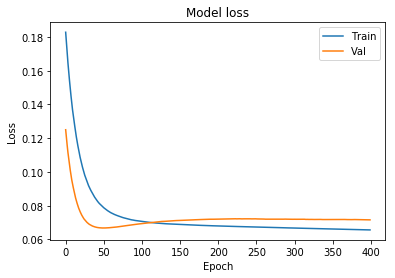

In [86]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [87]:
df_t3 = pd.read_excel(open('Cost_Sch-data.xlsx', 'rb'), sheet_name='Cost_T1')
df_t3.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Bohai Ming Zhu,8,5,2,2,1,4350,3,259,0.40,...,40000,1,2,1,30,1,1.0000,1,0.471042,0.25
1,Petrojarl Varg,5,1,1,1,1,2240,3,816,0.46,...,65833,2,2,1,84,1,0.8658,2,0.286765,0.24
2,Stybarrow Venture MV16,4,3,3,1,3,5922,3,702,0.60,...,87500,2,3,1,825,2,0.9143,4,-0.143875,0.27
3,Alima FPU,1,2,3,2,1,5720,3,994,1.13,...,100000,3,1,2,600,3,0.9000,4,-0.022133,0.35
4,Jangkrik,2,4,1,2,1,8824,3,1052,2.68,...,79400,2,2,2,120,2,0.0554,3,0.114068,0.17


In [88]:
dataset_t3 = df_t3.values
Xnew3 = dataset_t3[:,[1, 2, 4, 13, 14, 16, 18]]
Xnew3

array([[8, 5, 2, 2, 1, 1, 1],
       [5, 1, 1, 2, 1, 1, 2],
       [4, 3, 1, 3, 1, 2, 4],
       [1, 2, 2, 1, 2, 3, 4],
       [2, 4, 2, 2, 2, 2, 3],
       [4, 3, 2, 5, 6, 1, 5],
       [1, 3, 2, 2, 1, 4, 5],
       [1, 4, 2, 3, 1, 5, 2],
       [1, 4, 2, 3, 1, 1, 1],
       [1, 3, 2, 1, 1, 5, 2],
       [1, 4, 1, 1, 1, 3, 3],
       [1, 4, 1, 1, 1, 3, 3],
       [1, 3, 2, 3, 1, 2, 5],
       [1, 5, 2, 5, 1, 2, 1],
       [1, 1, 1, 1, 1, 3, 2],
       [1, 4, 1, 1, 1, 2, 5],
       [1, 2, 2, 2, 1, 2, 2],
       [1, 4, 2, 2, 1, 1, 3],
       [1, 4, 2, 3, 1, 1, 3],
       [1, 5, 2, 2, 1, 3, 2],
       [1, 4, 2, 2, 1, 2, 2],
       [1, 3, 2, 2, 1, 3, 2],
       [4, 4, 2, 5, 1, 2, 5],
       [4, 3, 2, 4, 1, 4, 5],
       [4, 3, 2, 2, 1, 2, 4],
       [7, 4, 2, 1, 1, 4, 1],
       [7, 5, 2, 1, 1, 4, 1],
       [7, 5, 2, 1, 1, 2, 1],
       [7, 3, 2, 2, 1, 1, 5],
       [7, 5, 1, 1, 1, 4, 1],
       [7, 5, 1, 1, 1, 5, 1],
       [7, 5, 2, 1, 1, 2, 2],
       [7, 5, 1, 5, 1, 1, 3],
       [7,

In [89]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew3)

In [90]:
ynew5 = model6.predict(Xnew_scale2)

In [91]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew5[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [8 5 2 2 1 4350 3 259 0.4 1 40000 1 2 1 30 1 1.0 1], ynew[0] = [0.4202738] 
Xnew[1] = [5 1 1 1 1 2240 3 816 0.46 1 65833 2 2 1 84 1 0.8658 2], ynew[1] = [0.2802063] 
Xnew[2] = [4 3 3 1 3 5922 3 702 0.6 1 87500 2 3 1 825 2 0.9143 4], ynew[2] = [0.14225066] 
Xnew[3] = [1 2 3 2 1 5720 3 994 1.13 1 100000 3 1 2 600 3 0.9 4], ynew[3] = [0.1133112] 
Xnew[4] = [2 4 1 2 1 8824 3 1052 2.68 1 79400 2 2 2 120 2 0.0554 3], ynew[4] = [0.22604889] 
Xnew[5] = [4 3 3 2 1 7814 3 2229 11.16 1 148333 6 5 6 250 1 0.236 5], ynew[5] = [0.42526907] 
Xnew[6] = [1 3 3 2 1 7534 3 1383 1.8 1 198333 4 2 1 1290 4 0.8067 5], ynew[6] = [0.06720033] 
Xnew[7] = [1 4 3 2 1 4872 3 1306 3.4 1 287000 6 3 1 1360 5 0.8362 2], ynew[7] = [0.07585773] 
Xnew[8] = [1 4 3 2 1 3103 3 823 2.5 1 246667 5 3 1 1350 1 0.8108 1], ynew[8] = [0.3508312] 
Xnew[9] = [1 3 3 2 1 4756 3 1071 0.76 1 316667 6 1 1 1250 5 0.7895 2], ynew[9] = [0.07621706] 
Xnew[10] = [1 4 3 1 1 5866 3 797 0.75 2 

In [92]:
print(ynew5)

# create excel writer
# write dataframe to excel sheet named 'marks'
writer = pd.ExcelWriter('predict_cost.xlsx')
ynew5_df = pd.DataFrame (ynew5)
ynew5_df.to_excel(writer, '7')
# save the excel file
writer.save()

[[0.4202738 ]
 [0.2802063 ]
 [0.14225066]
 [0.1133112 ]
 [0.22604889]
 [0.42526907]
 [0.06720033]
 [0.07585773]
 [0.3508312 ]
 [0.07621706]
 [0.10712981]
 [0.10712981]
 [0.1309635 ]
 [0.24806336]
 [0.10669953]
 [0.10555968]
 [0.22392902]
 [0.25505427]
 [0.25584298]
 [0.15219736]
 [0.21794373]
 [0.15694264]
 [0.17238143]
 [0.07990712]
 [0.18804798]
 [0.19071862]
 [0.18967322]
 [0.3362434 ]
 [0.2645365 ]
 [0.12163171]
 [0.07944873]
 [0.30364728]
 [0.2792176 ]
 [0.13844967]
 [0.13492566]
 [0.336168  ]
 [0.27169514]
 [0.19778094]
 [0.3458392 ]
 [0.37719387]
 [0.31150734]
 [0.13345987]
 [0.15535116]
 [0.3010286 ]
 [0.2781061 ]
 [0.23925677]
 [0.17339095]
 [0.15163285]
 [0.16716975]
 [0.19272605]
 [0.35736376]
 [0.43143067]
 [0.31675375]
 [0.47487903]
 [0.23841515]
 [0.54439026]
 [0.08625492]
 [0.49263918]
 [0.09837377]
 [0.2945356 ]
 [0.2245574 ]
 [0.20383114]
 [0.29905298]
 [0.19376633]
 [0.08883184]
 [0.44734514]
 [0.06915638]
 [0.39353284]
 [0.09488946]
 [0.09413728]
 [0.39307082]
 [0.47